In [4]:

import pandas as pd
import os
import json
import matplotlib.pyplot as plt
from matplotlib import colors
import itertools

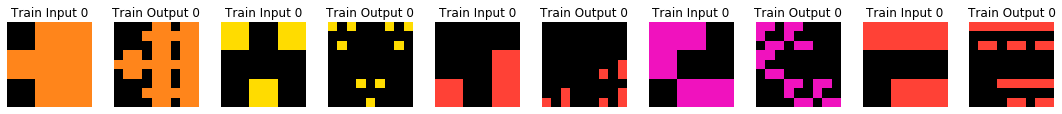

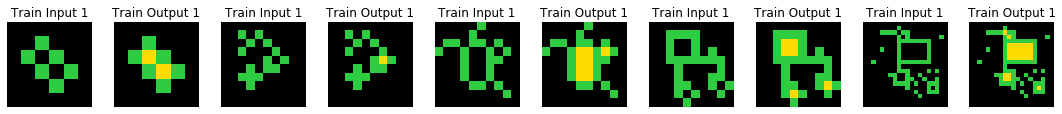

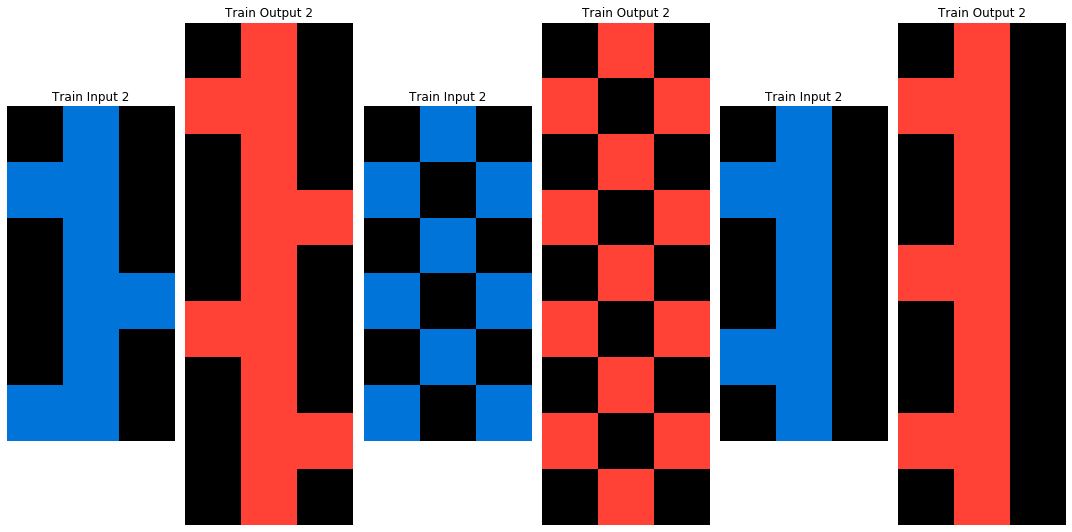

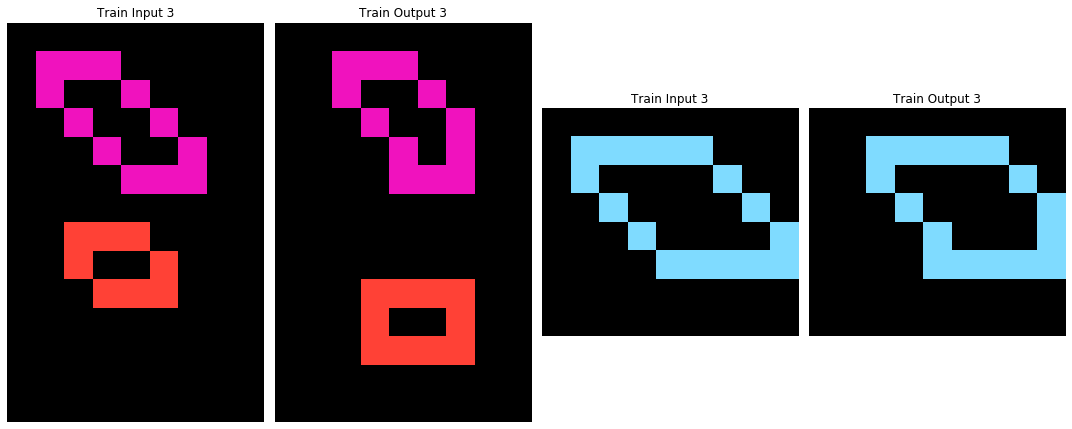

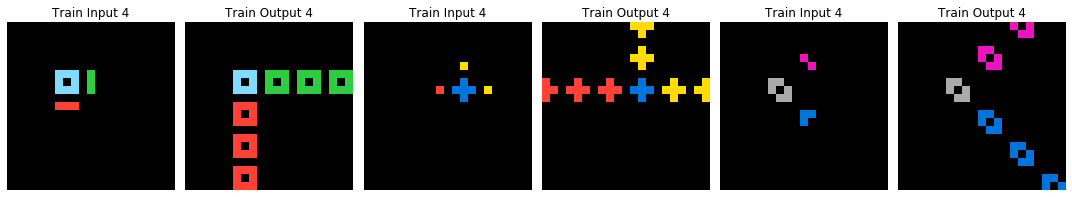

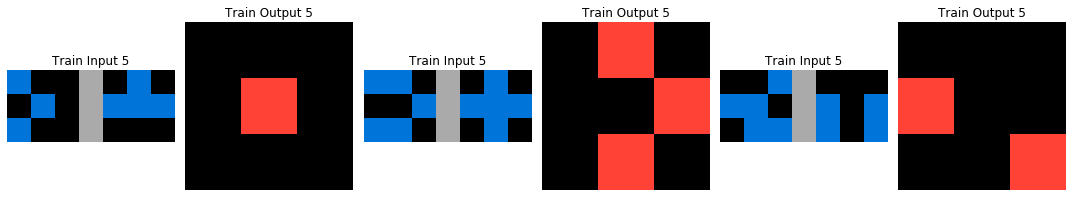

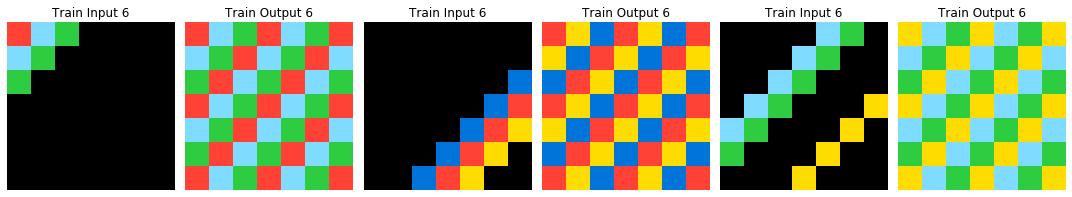

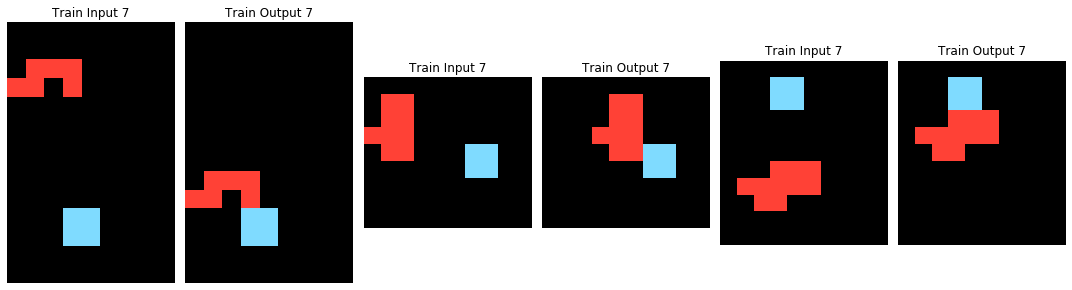

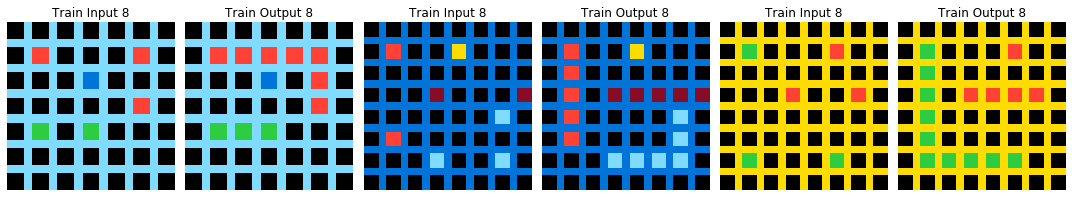

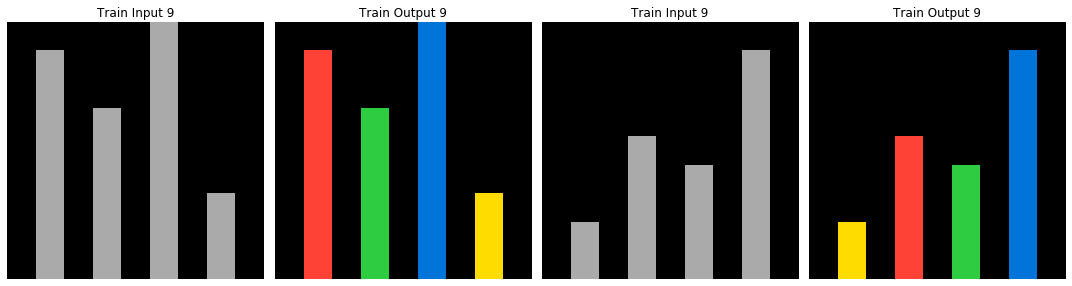

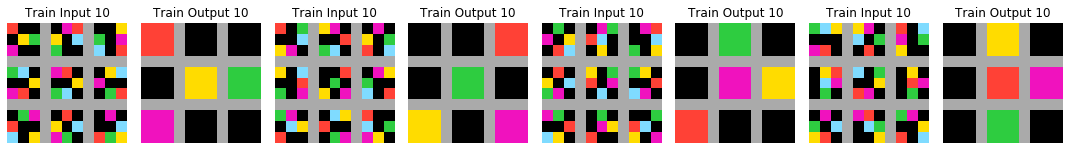

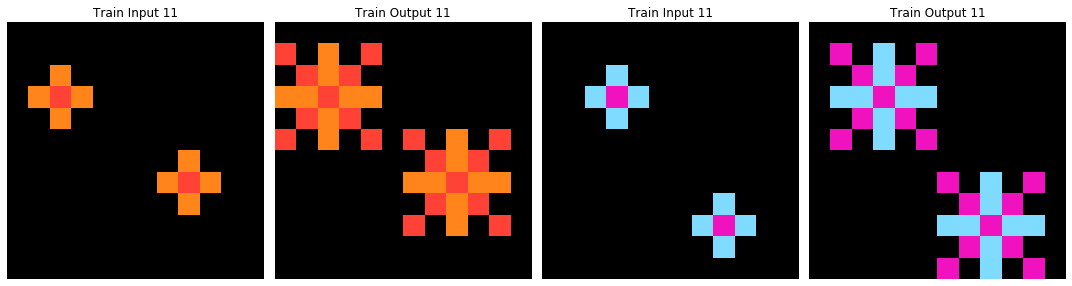

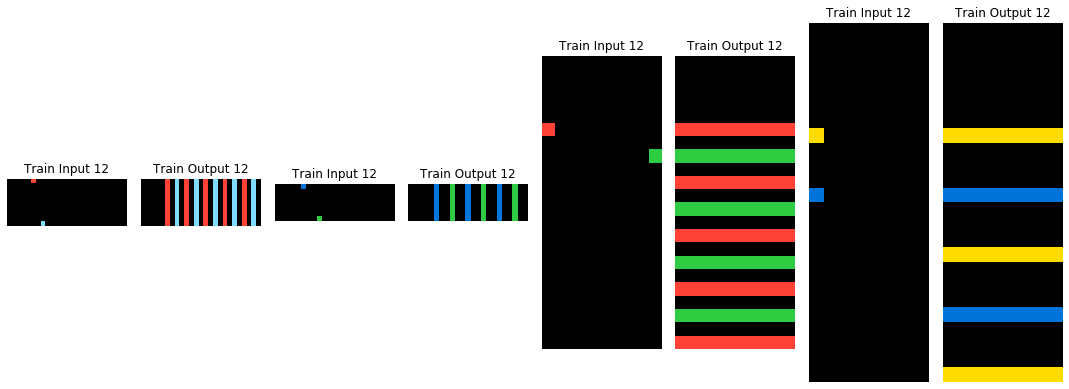

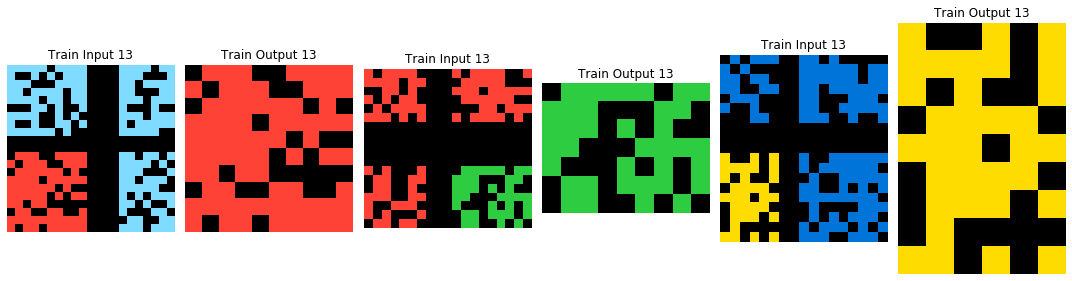

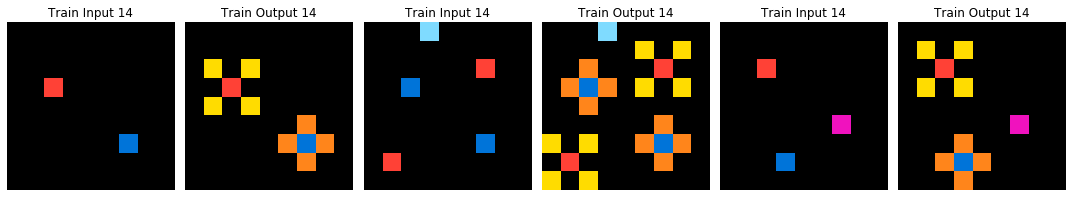

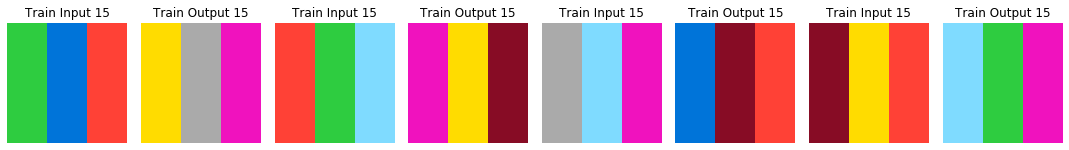

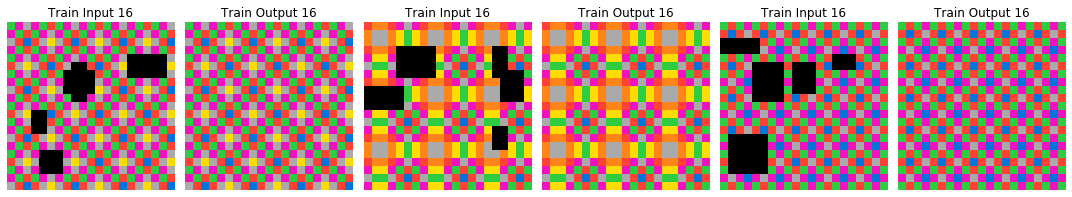

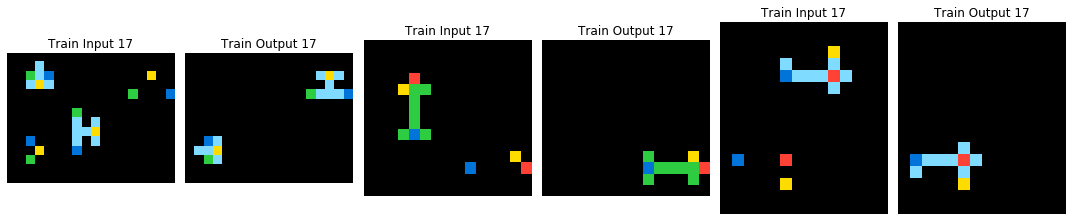

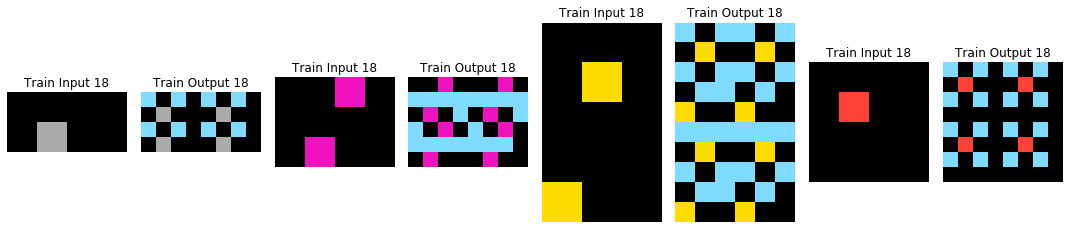

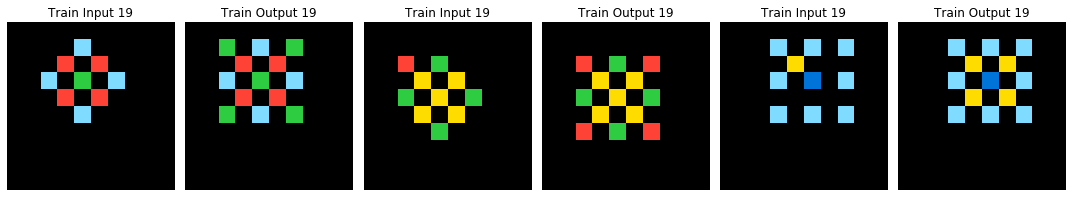

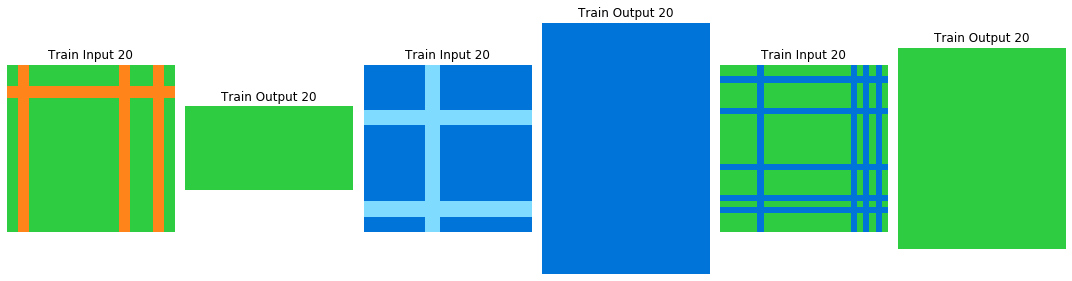

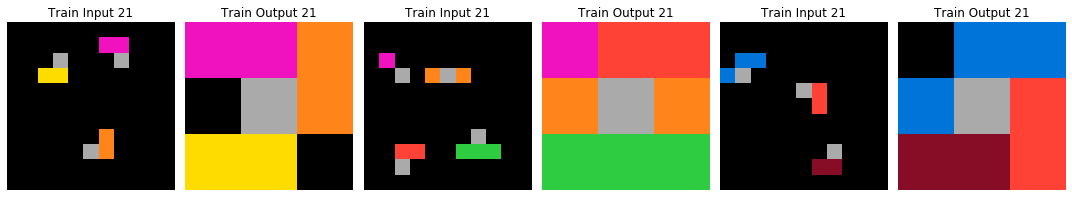

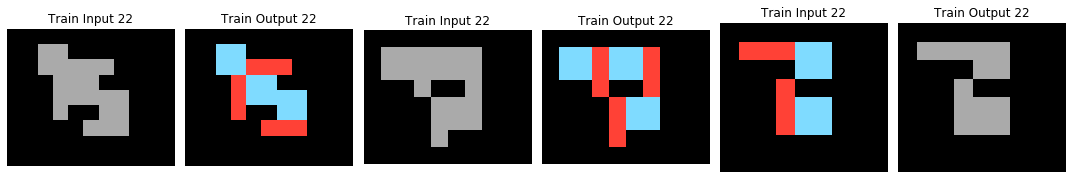

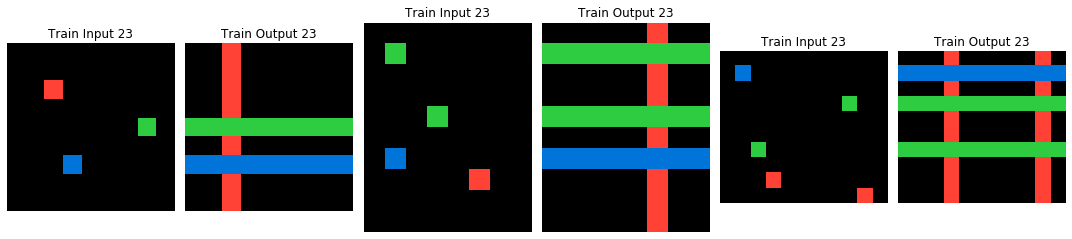

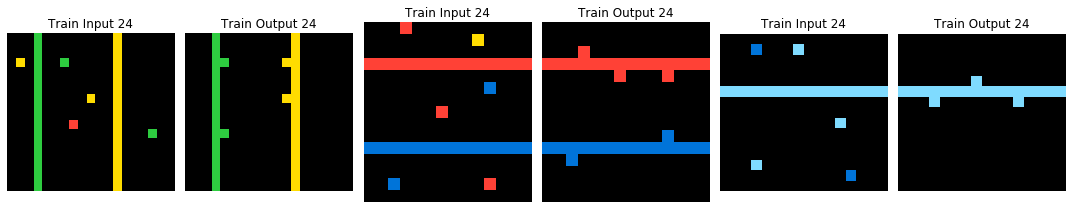

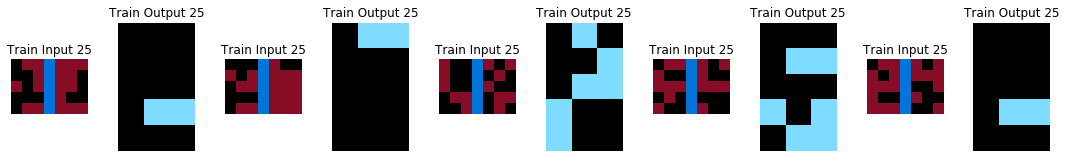

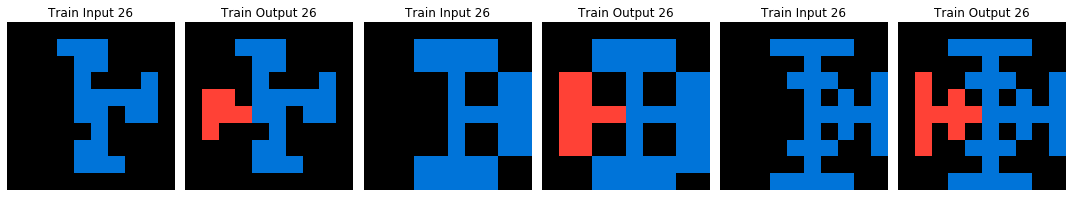

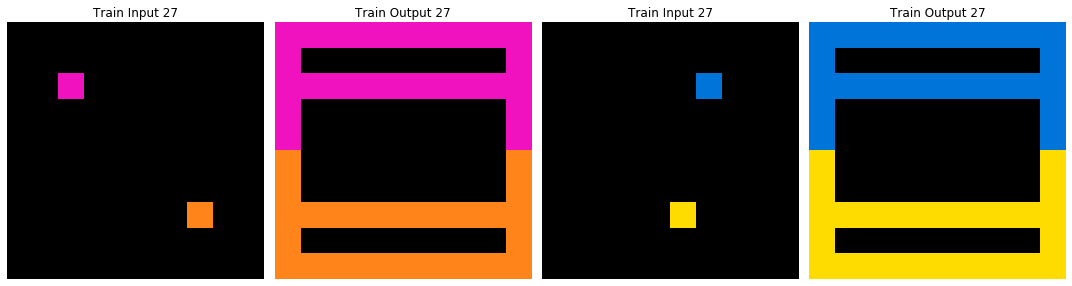

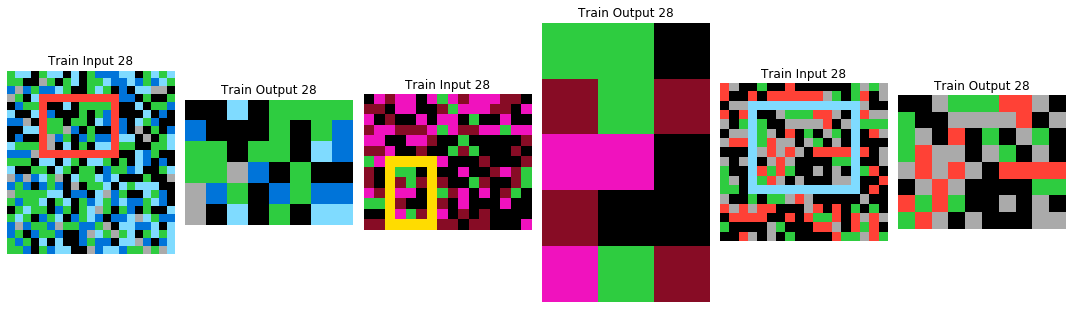

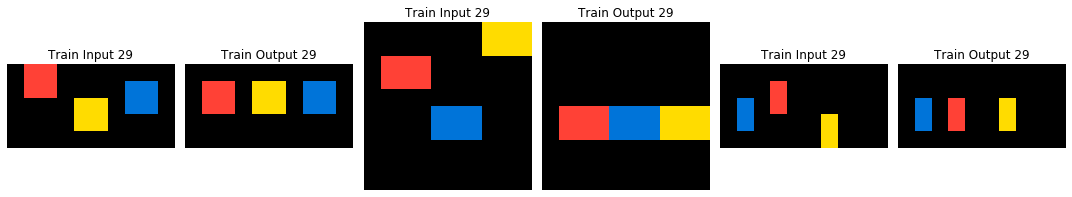

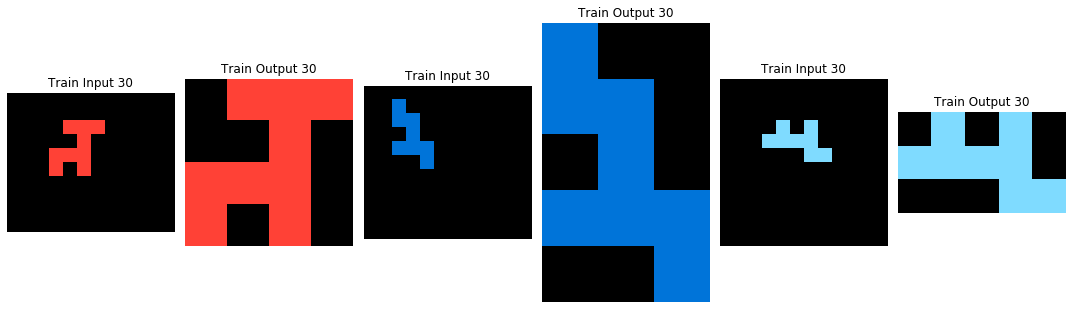

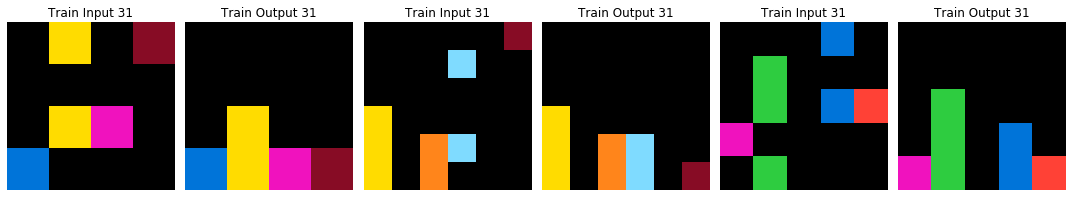

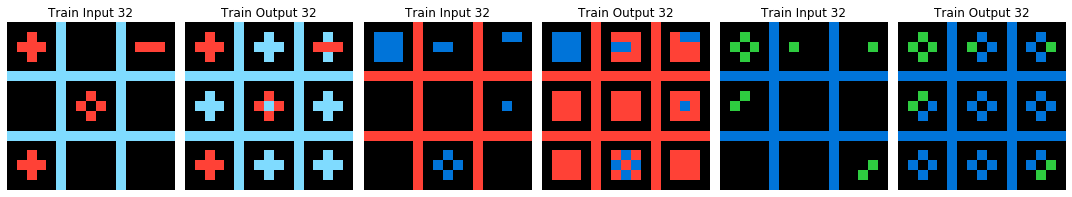

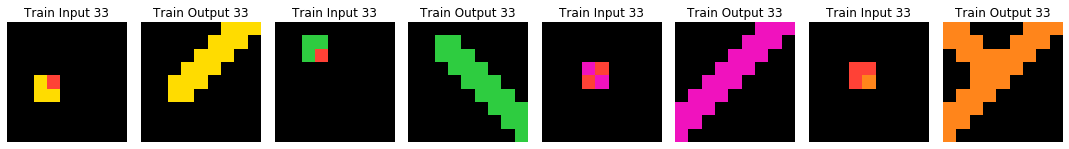

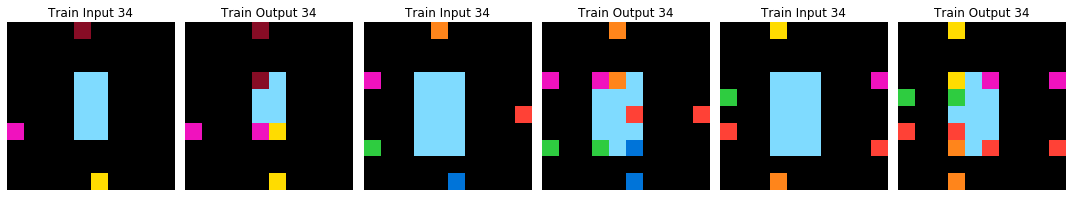

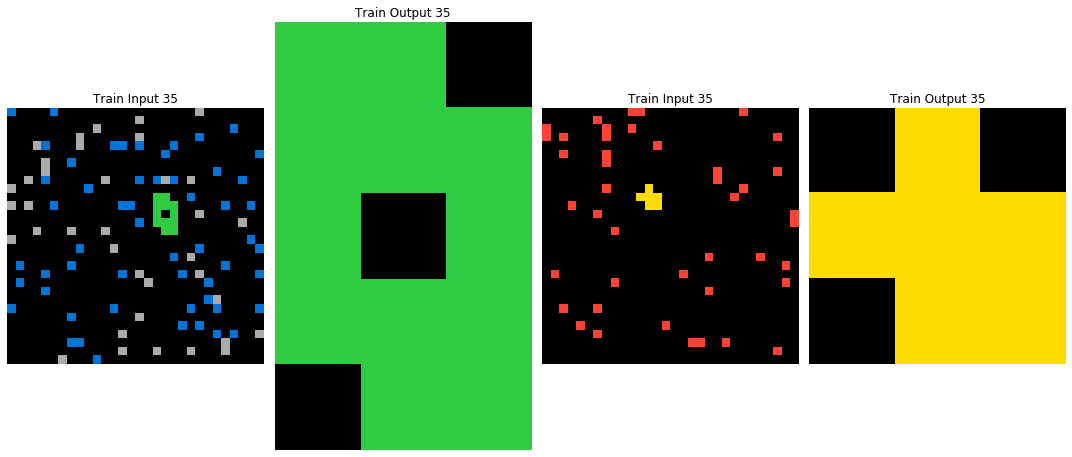

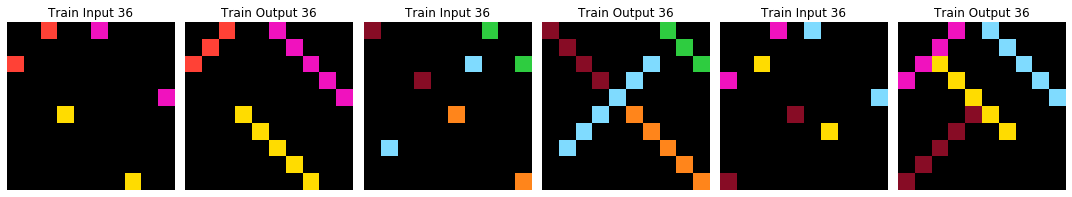

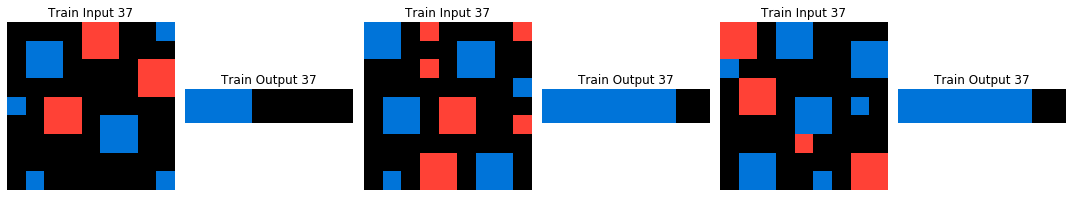

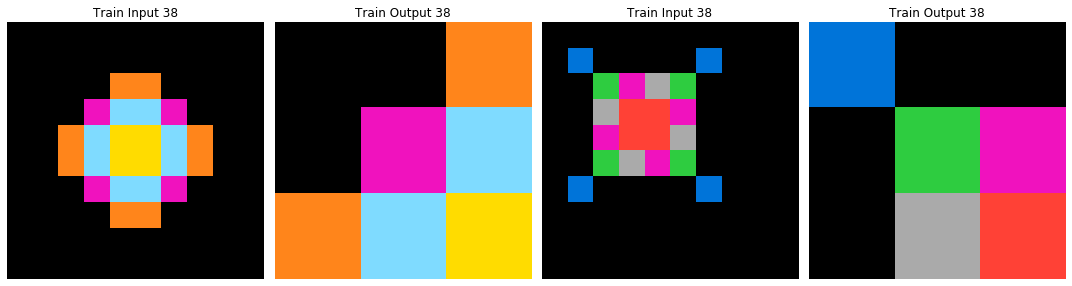

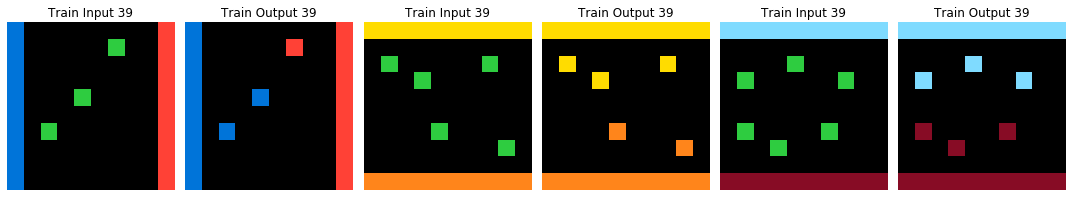

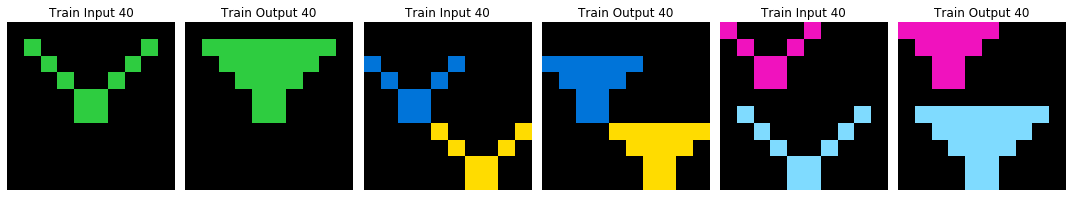

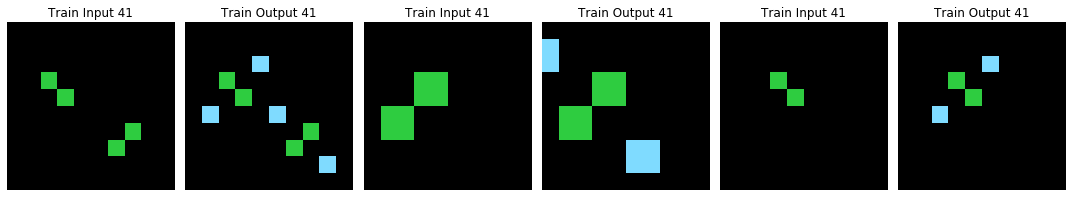

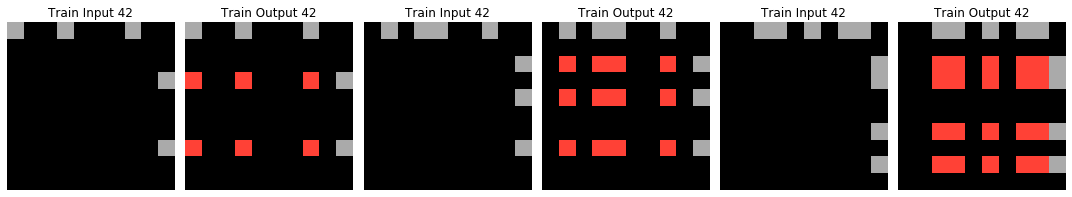

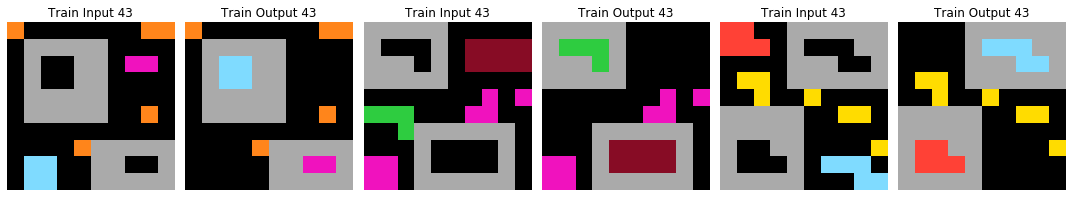

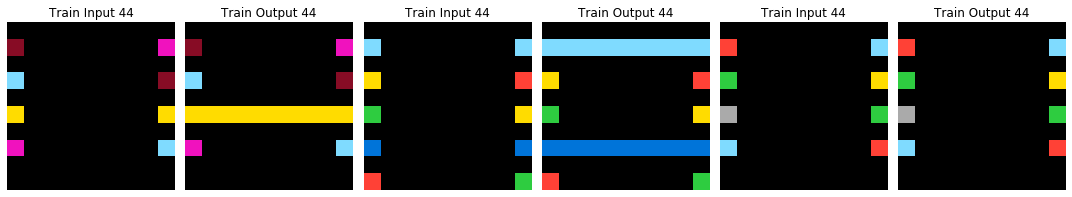

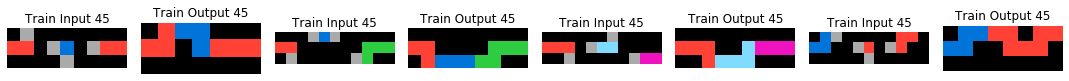

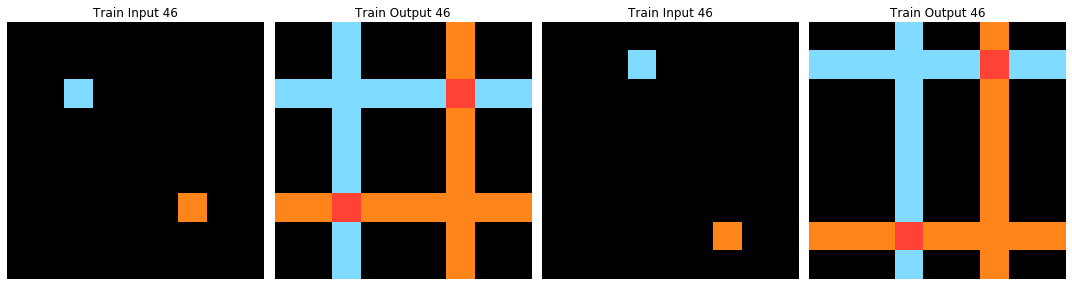

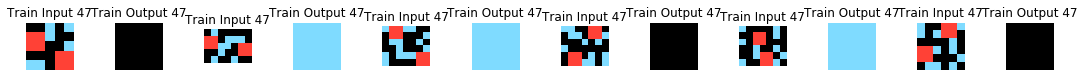

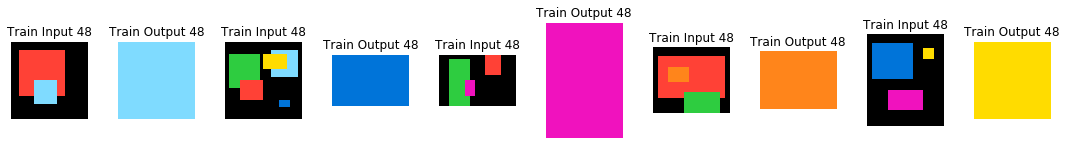

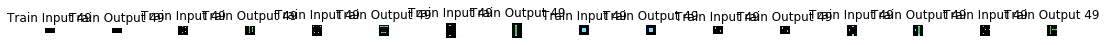

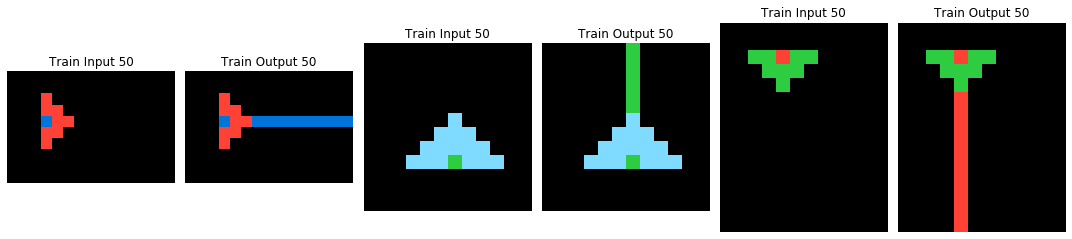

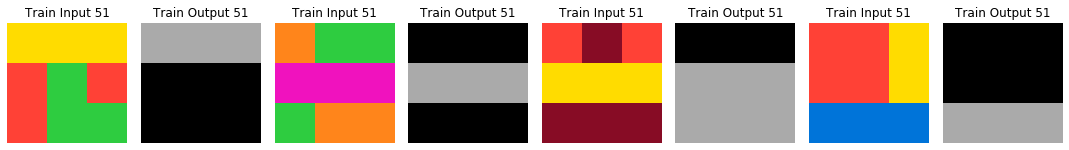

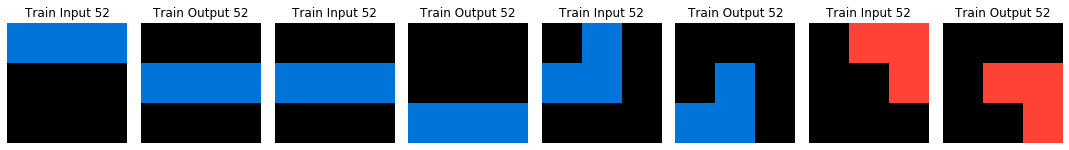

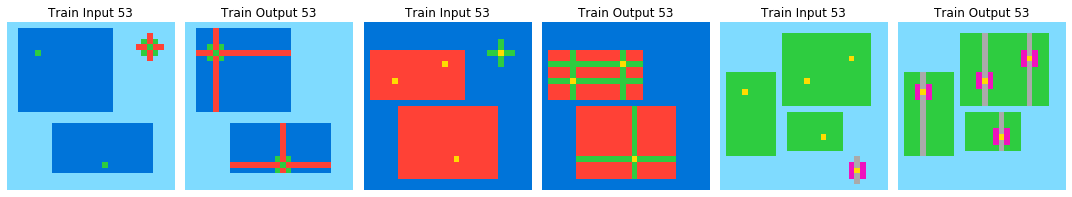

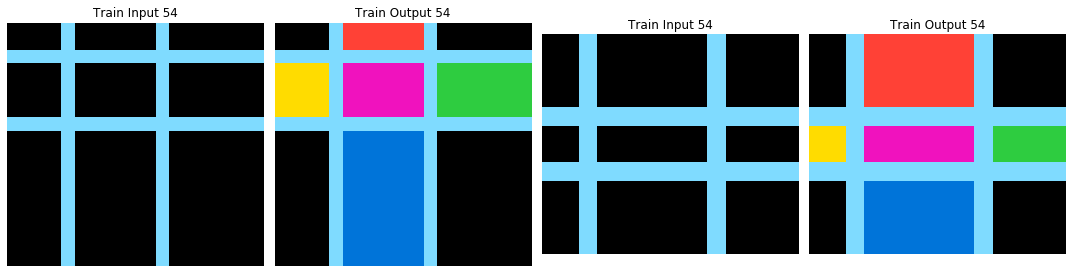

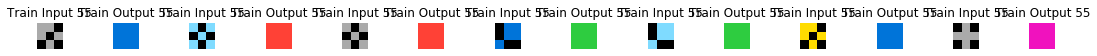

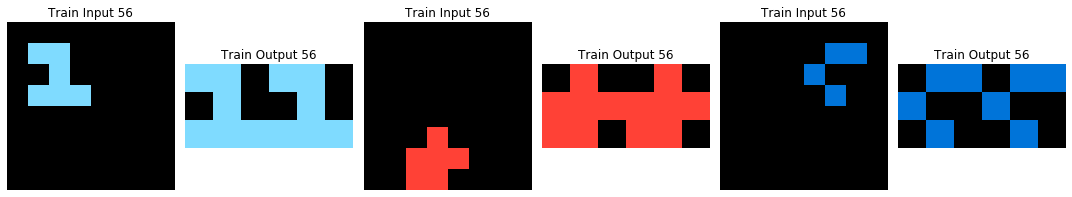

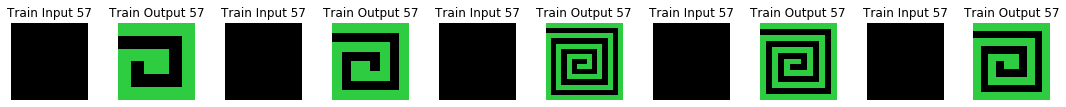

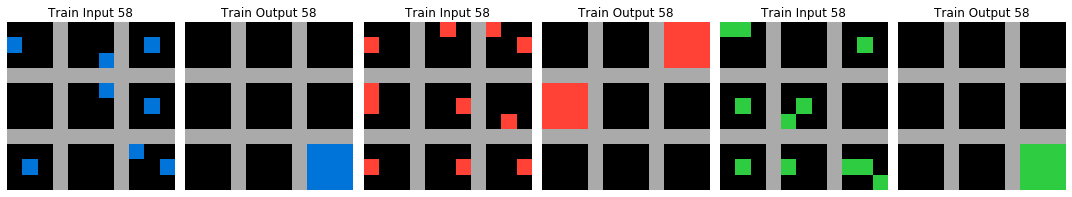

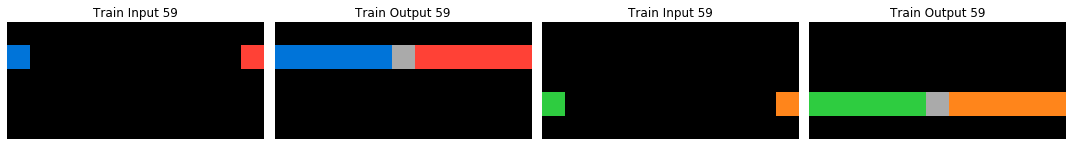

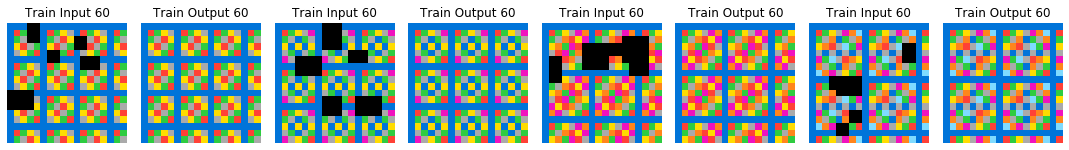

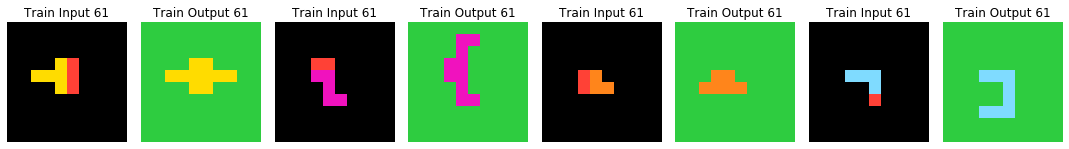

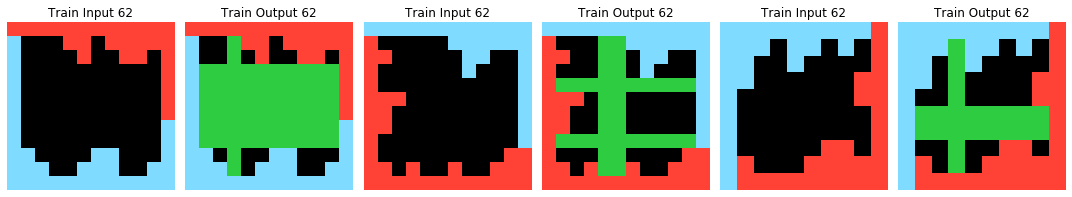

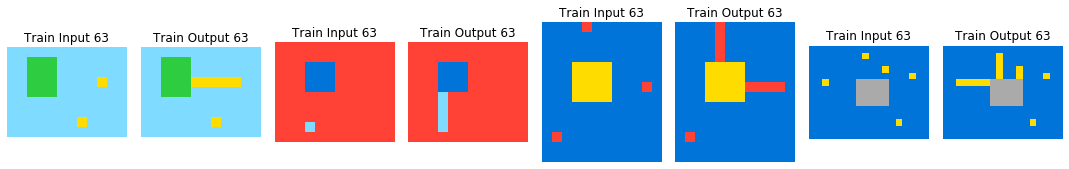

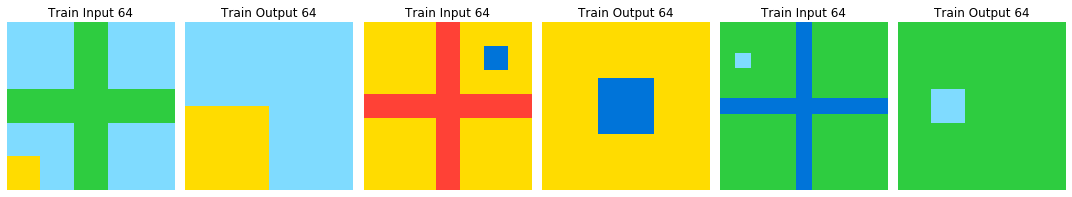

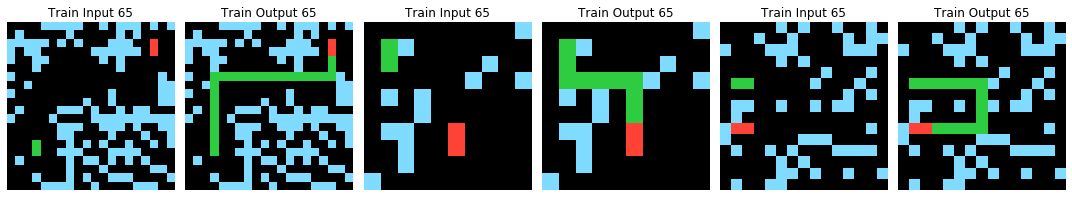

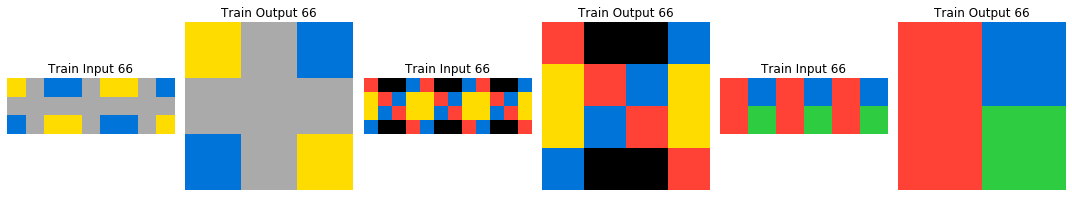

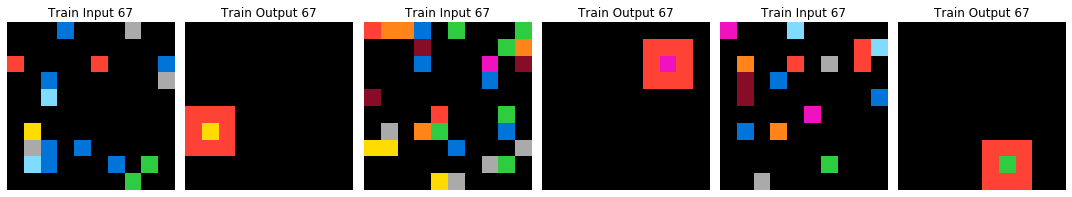

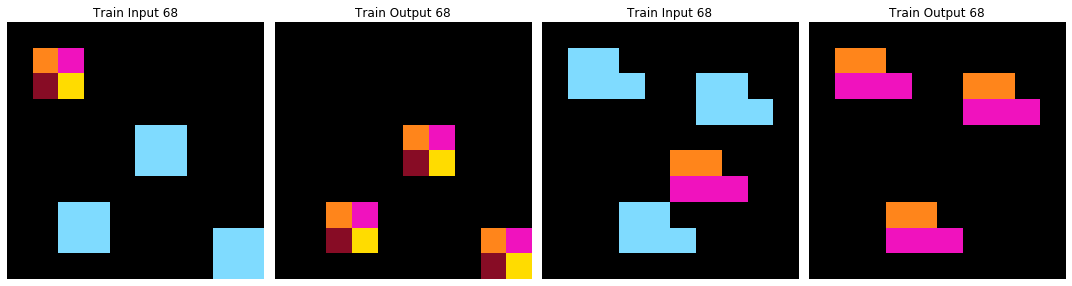

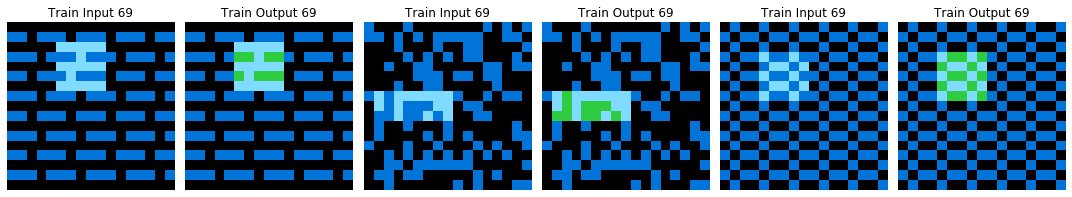

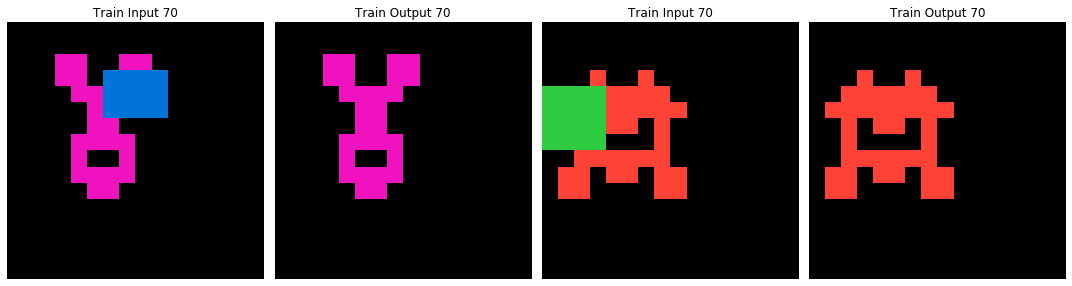

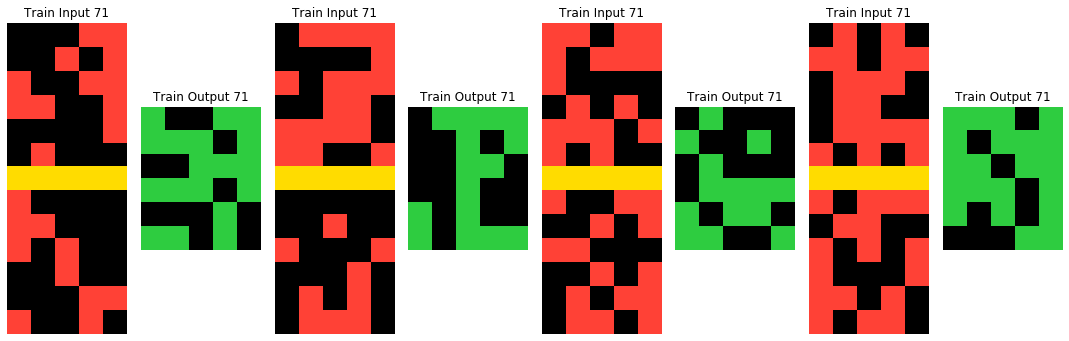

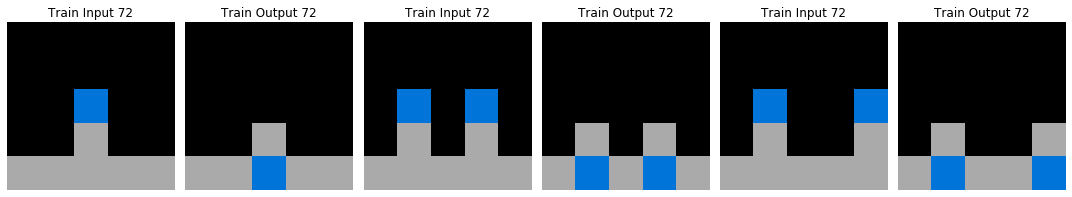

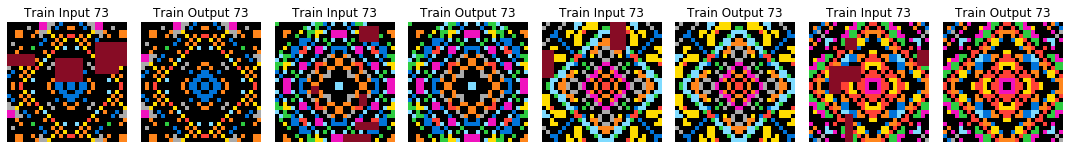

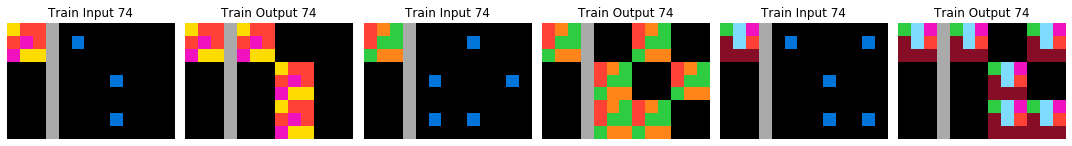

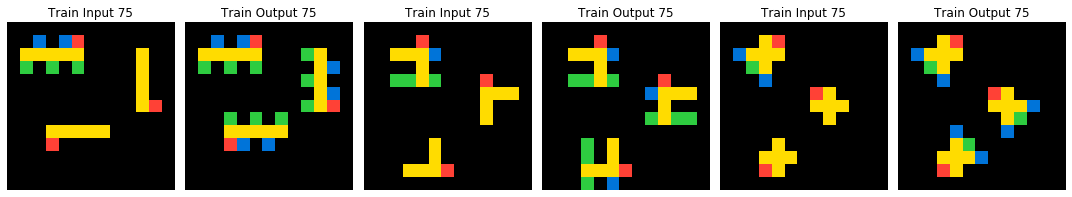

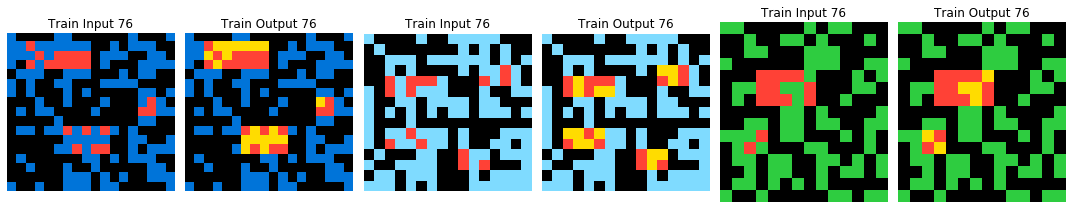

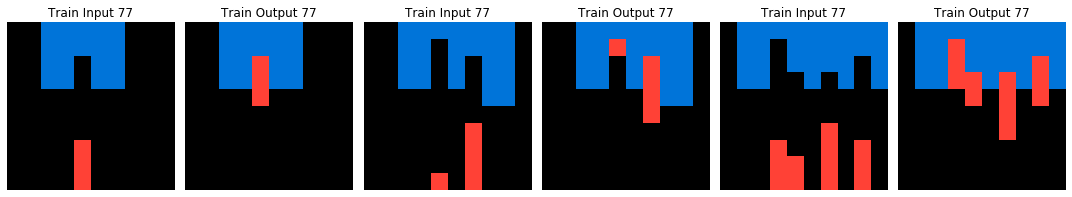

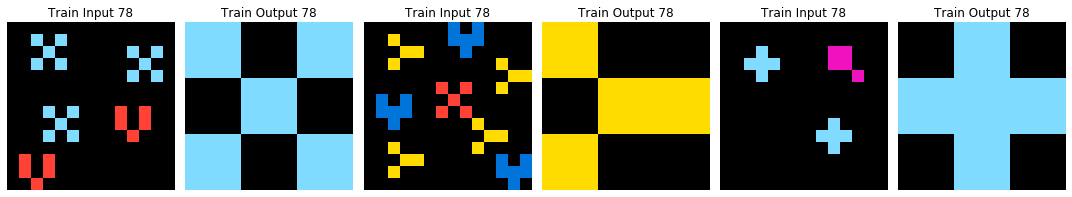

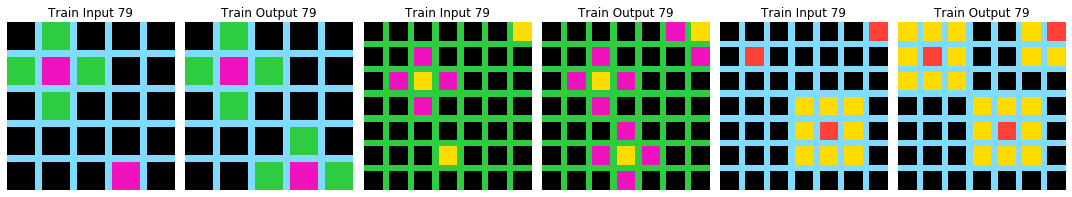

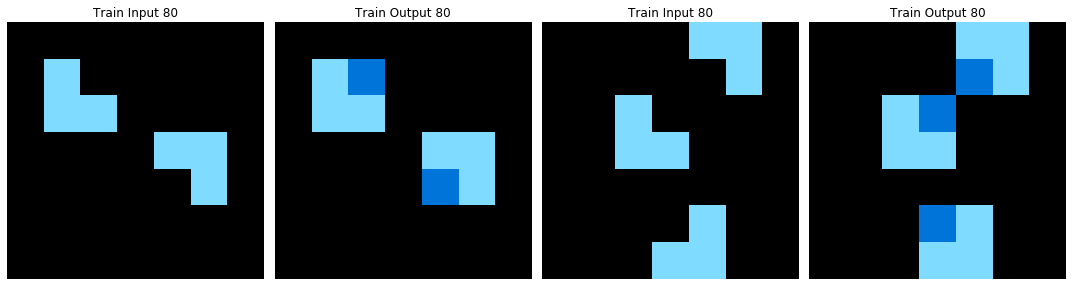

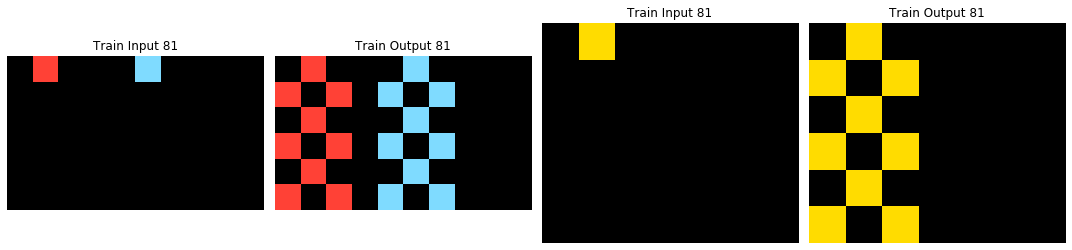

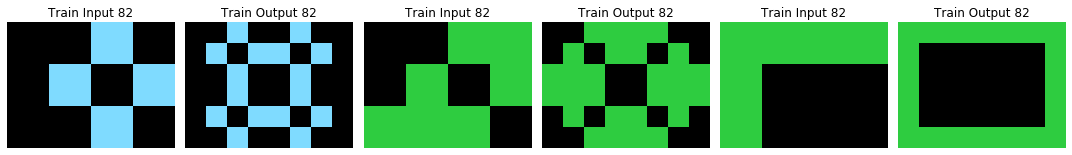

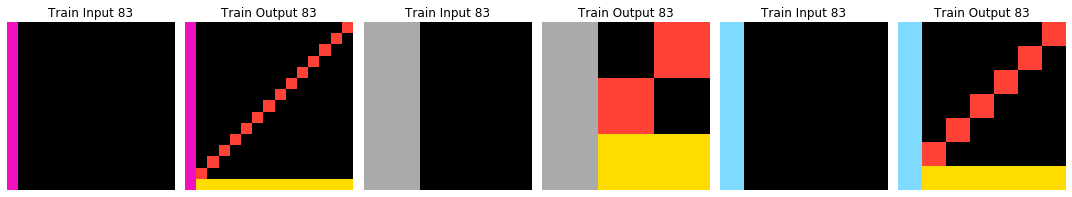

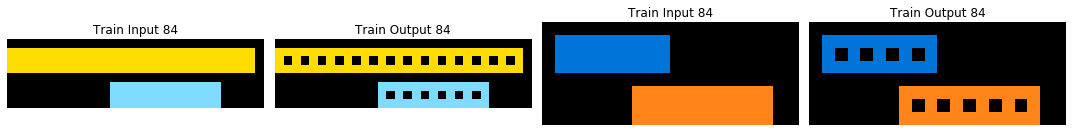

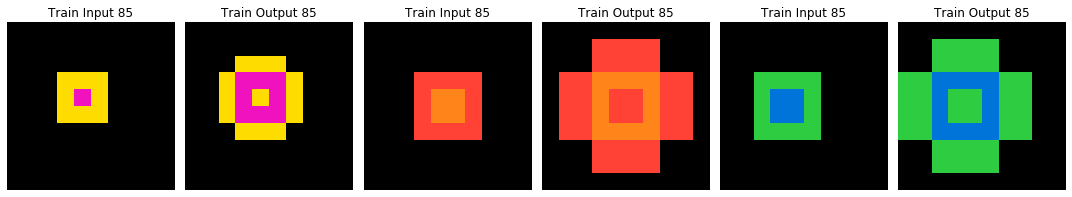

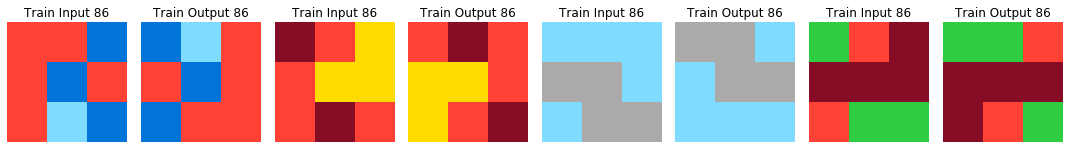

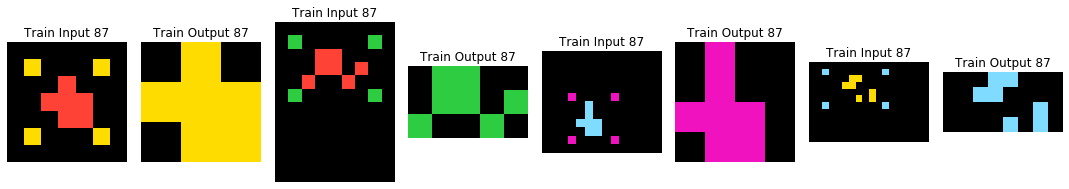

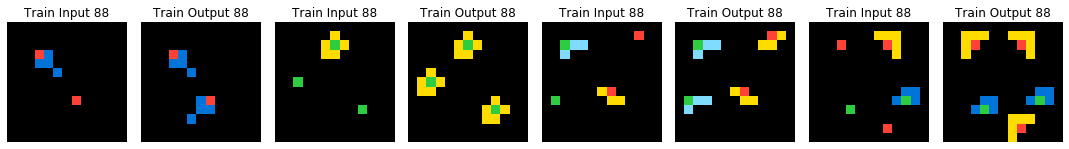

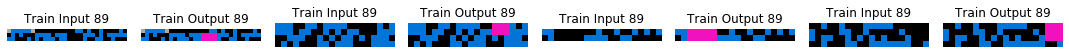

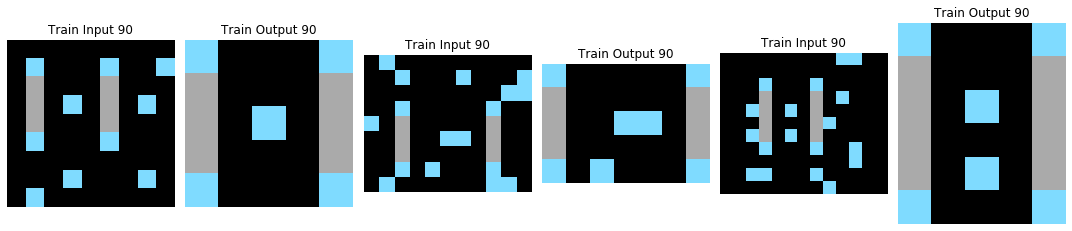

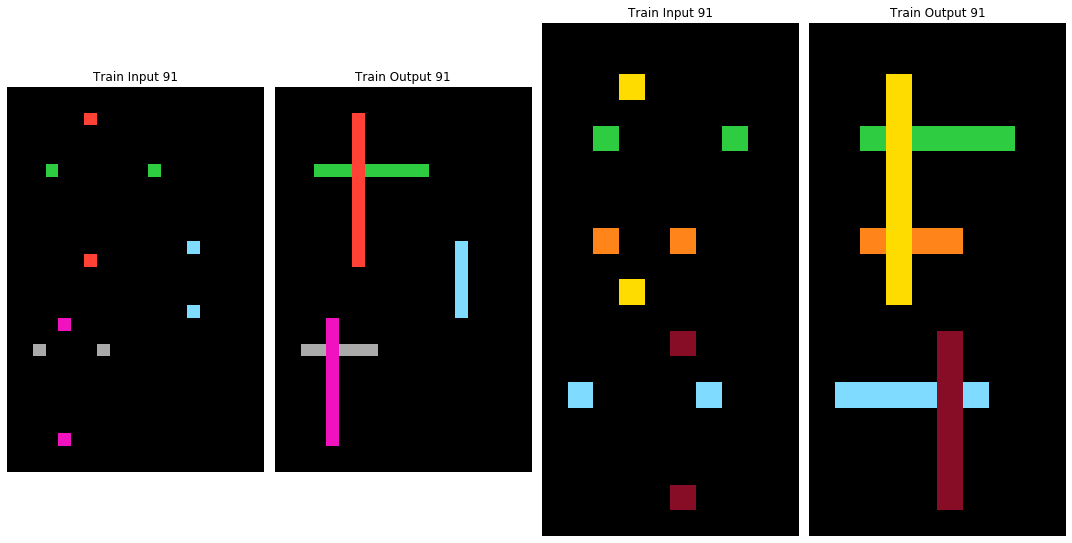

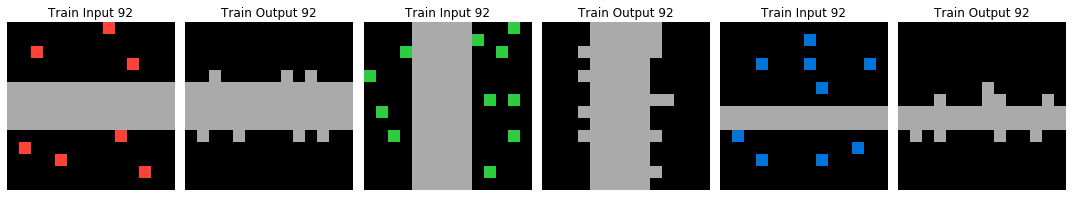

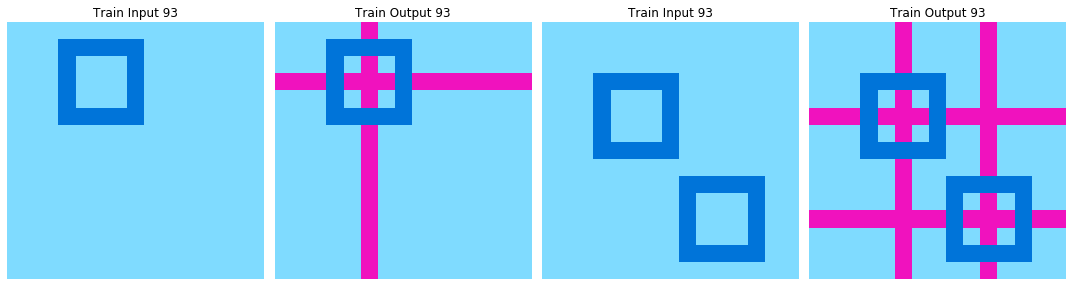

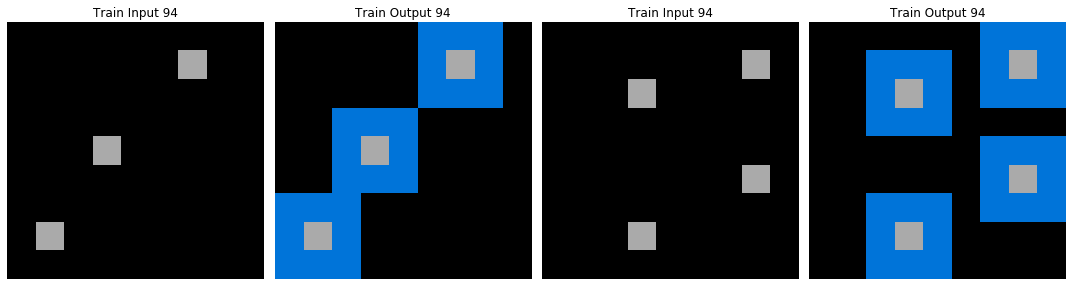

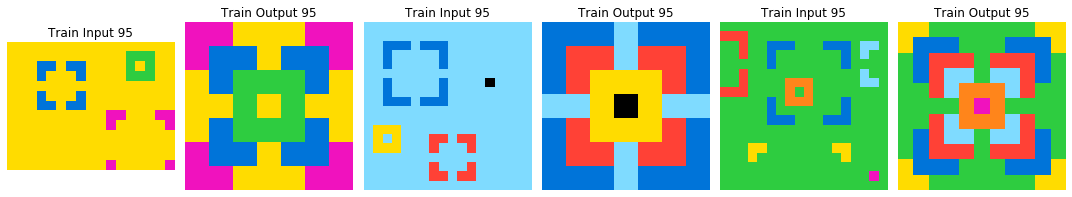

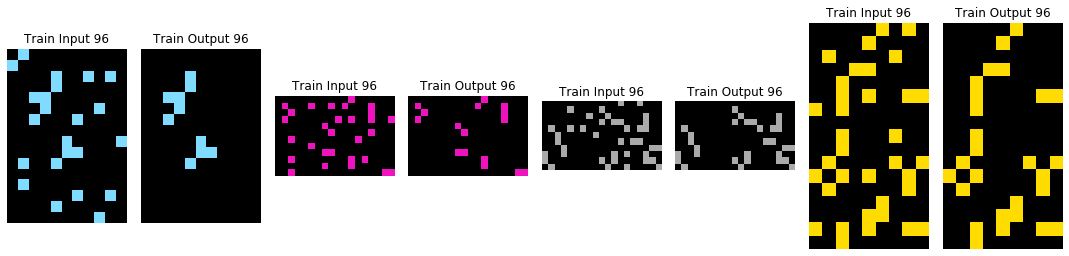

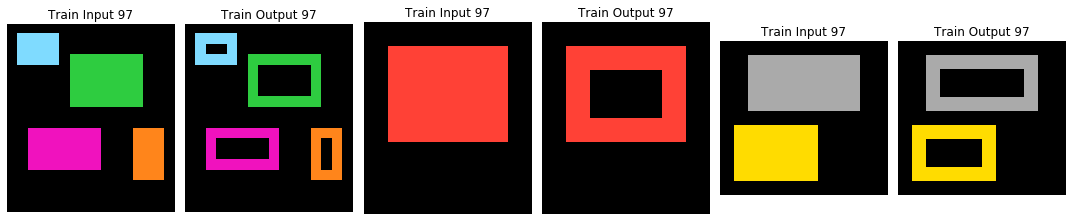

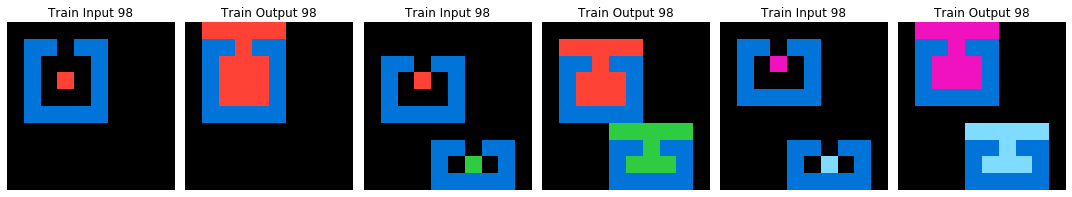

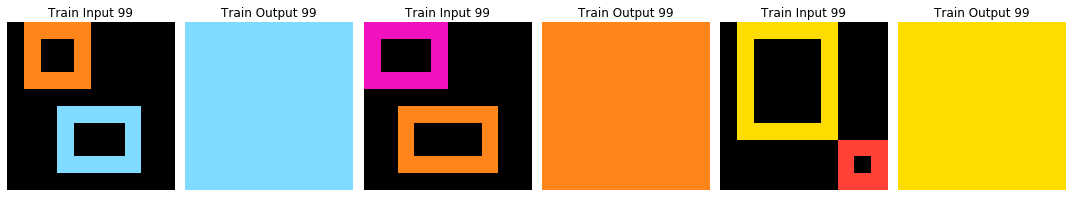

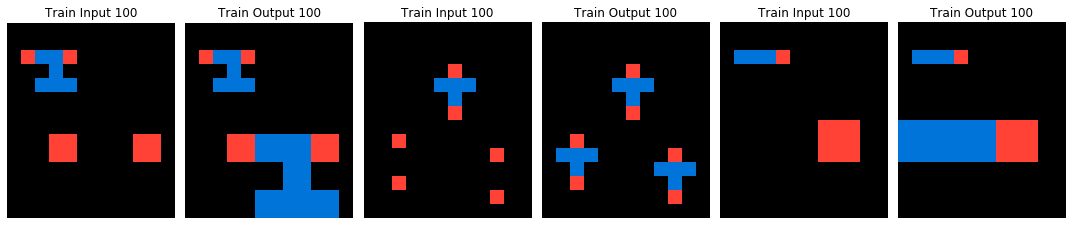

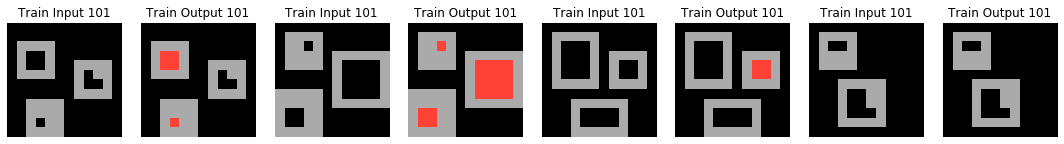

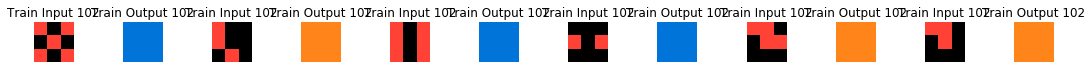

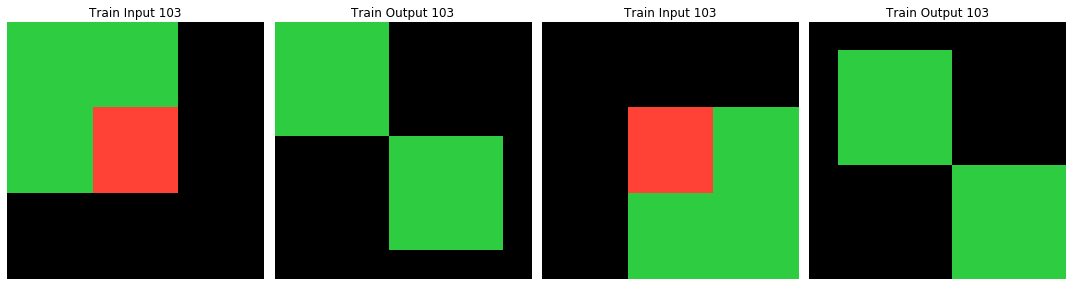

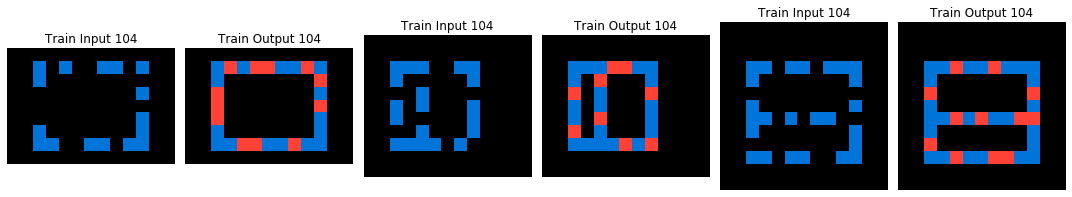

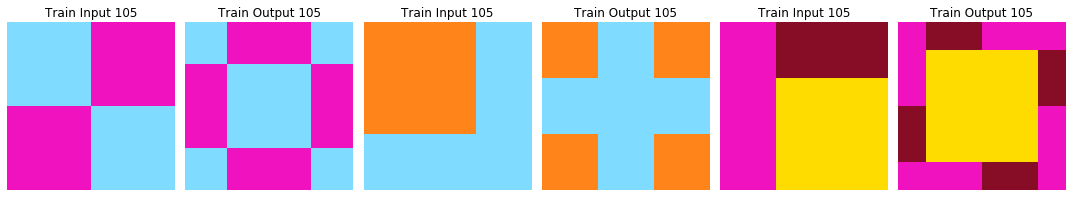

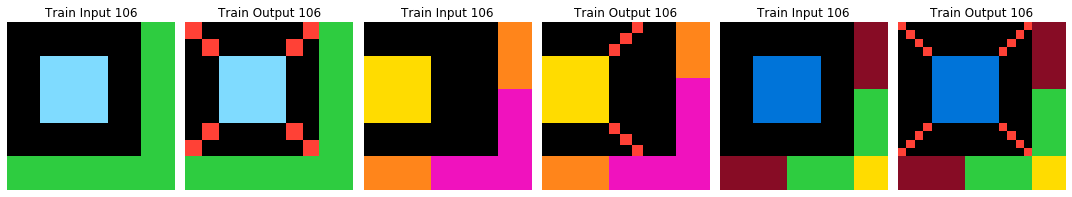

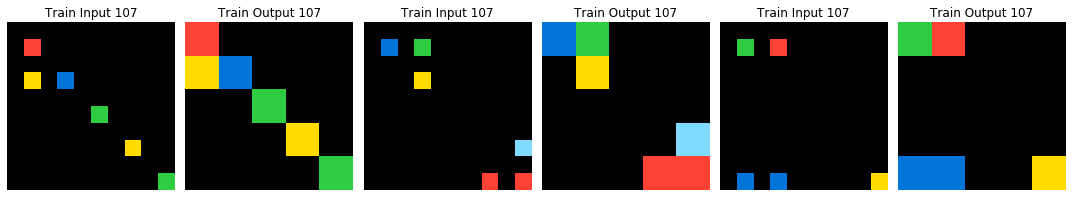

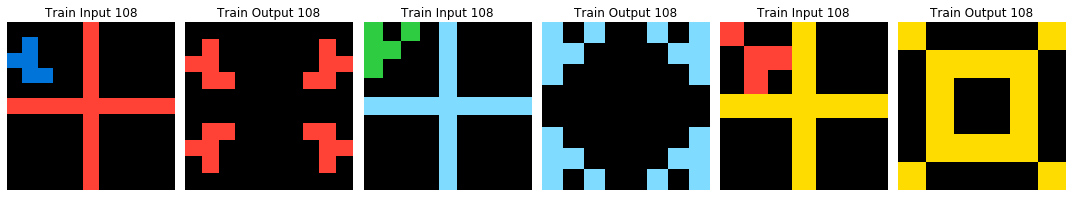

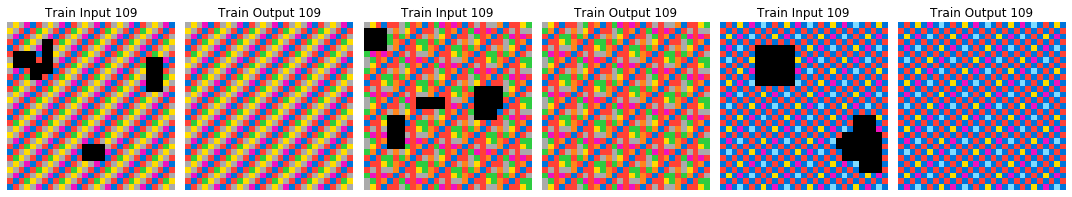

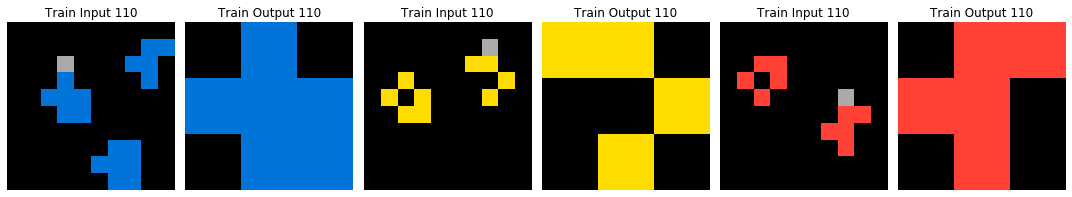

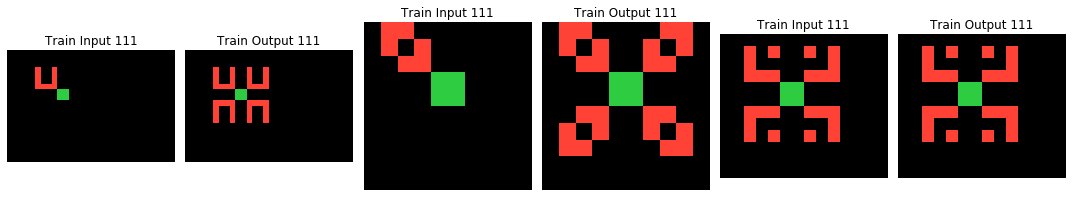

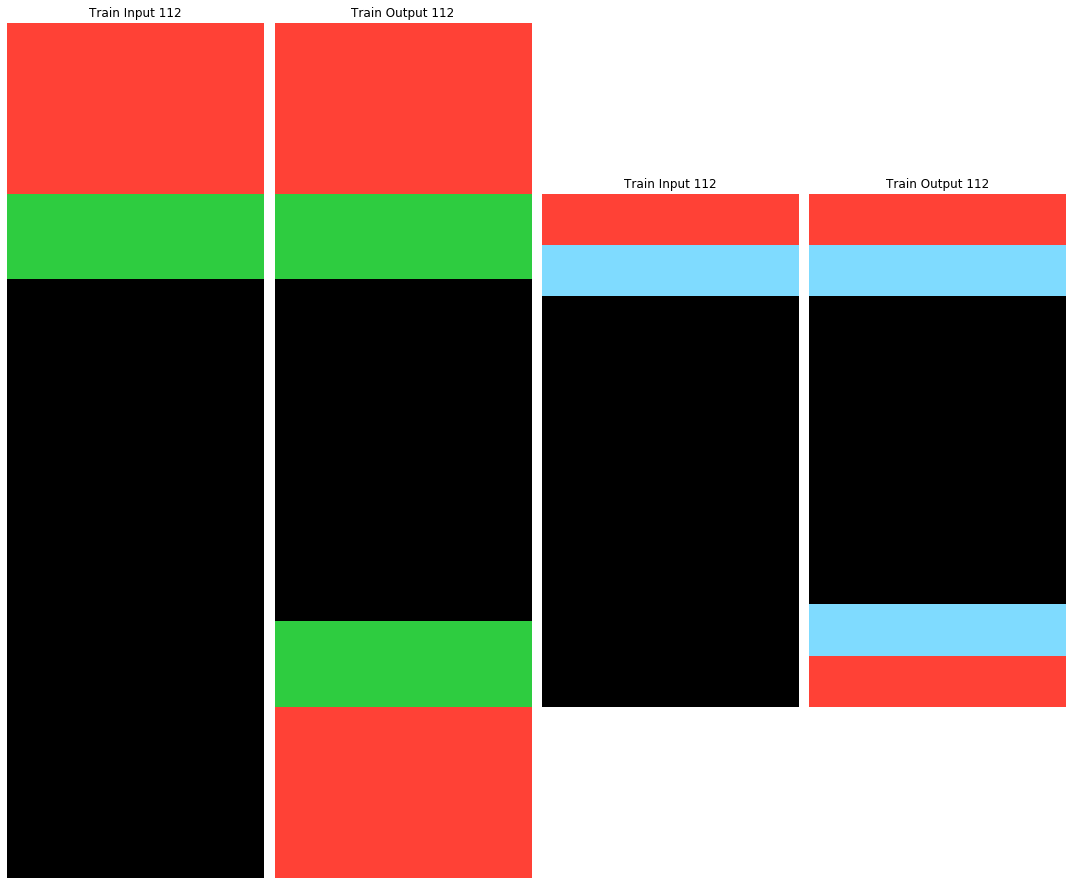

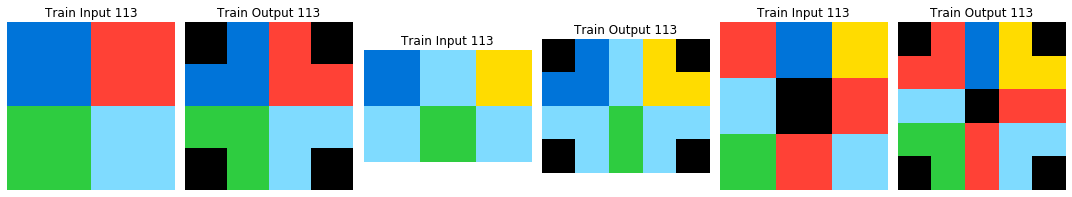

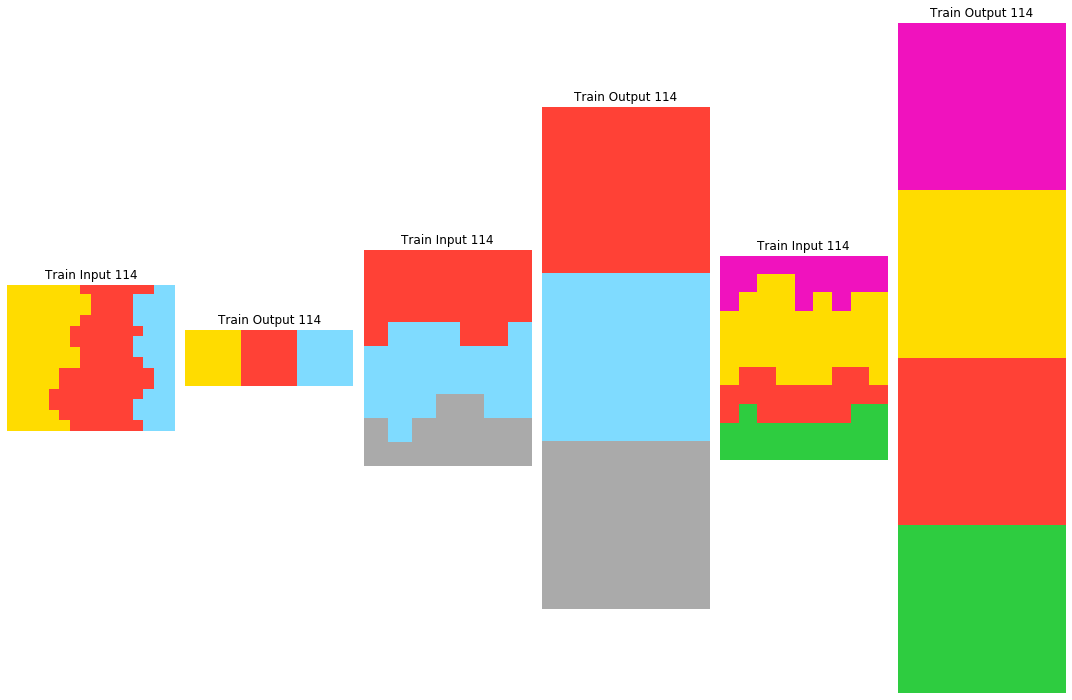

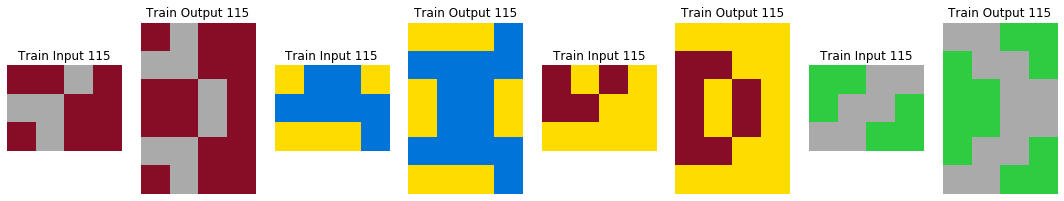

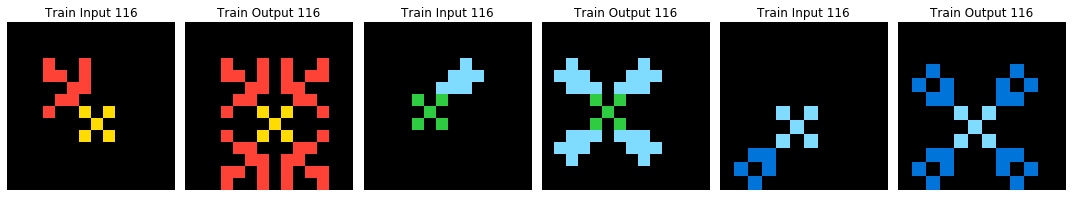

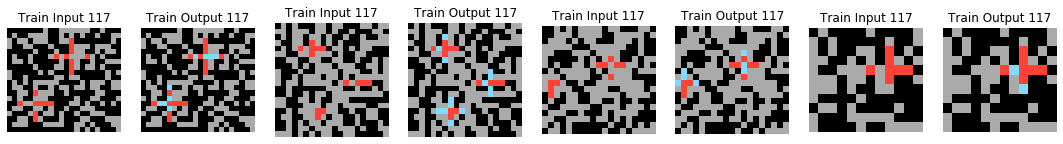

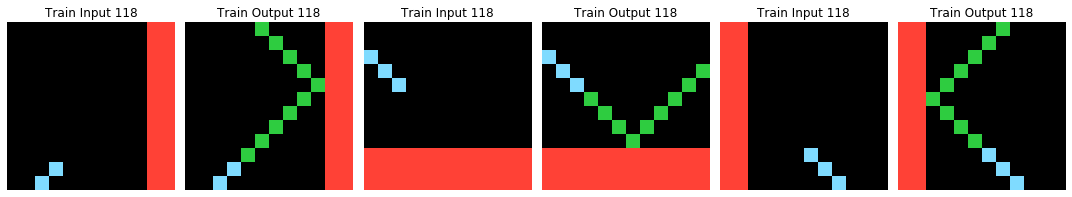

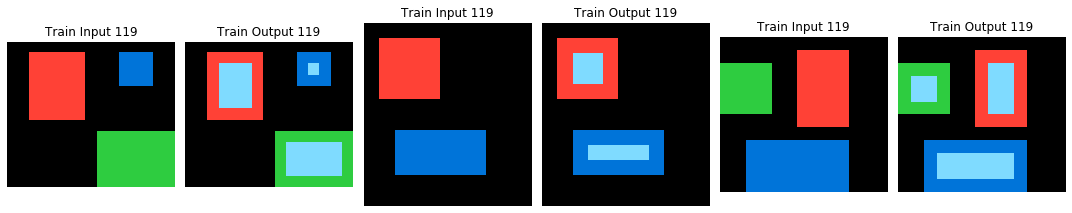

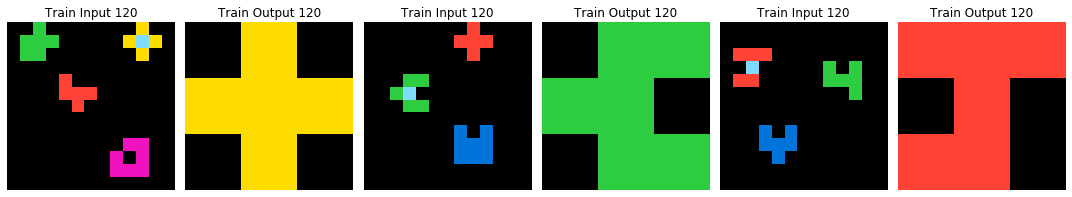

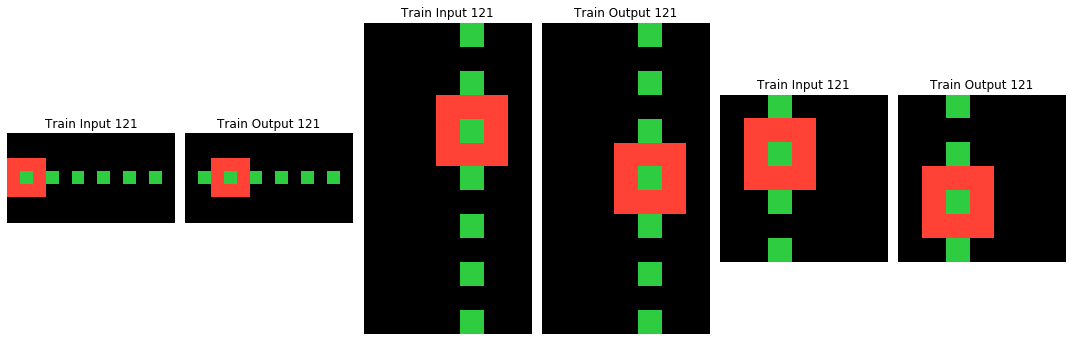

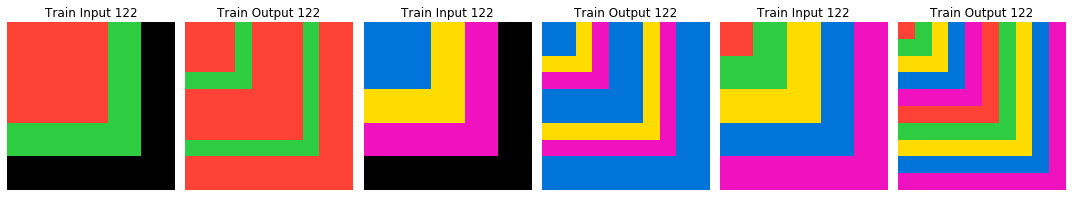

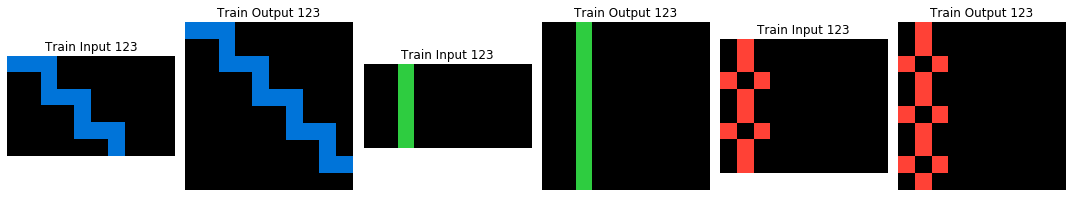

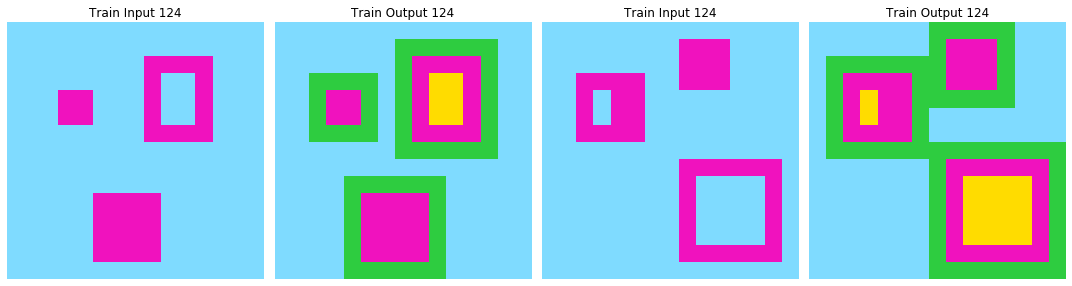

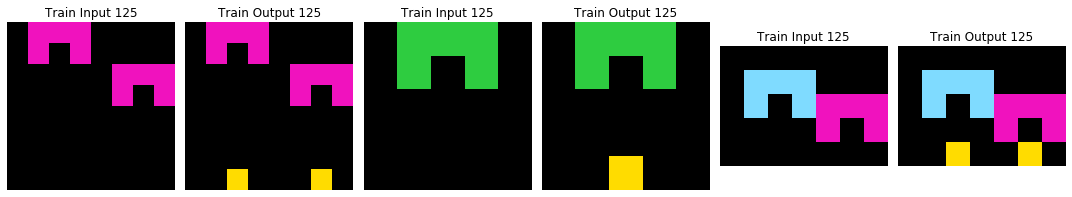

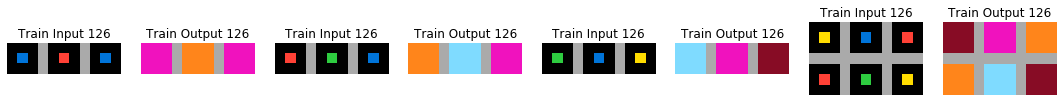

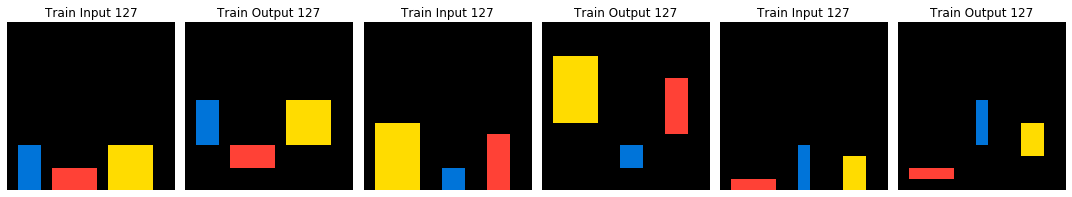

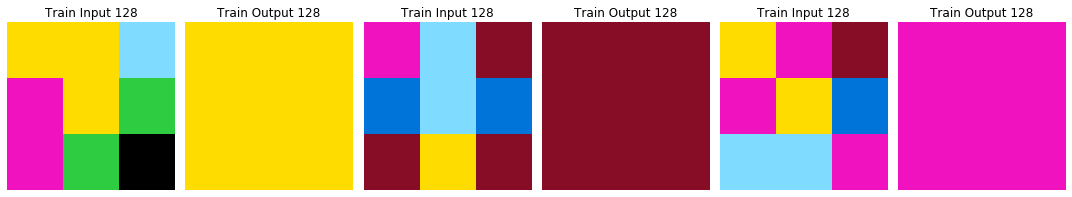

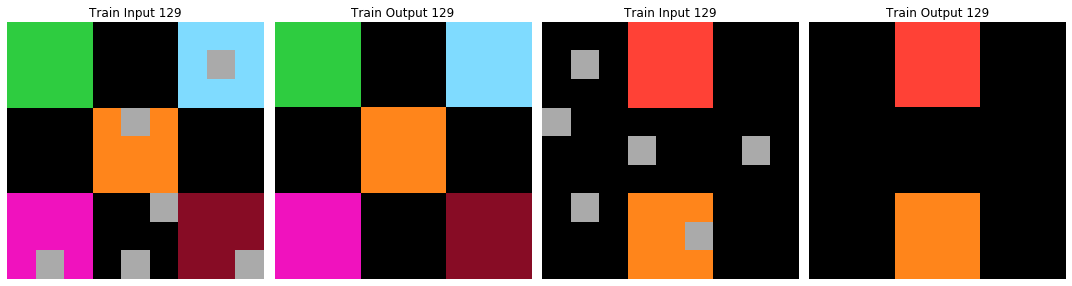

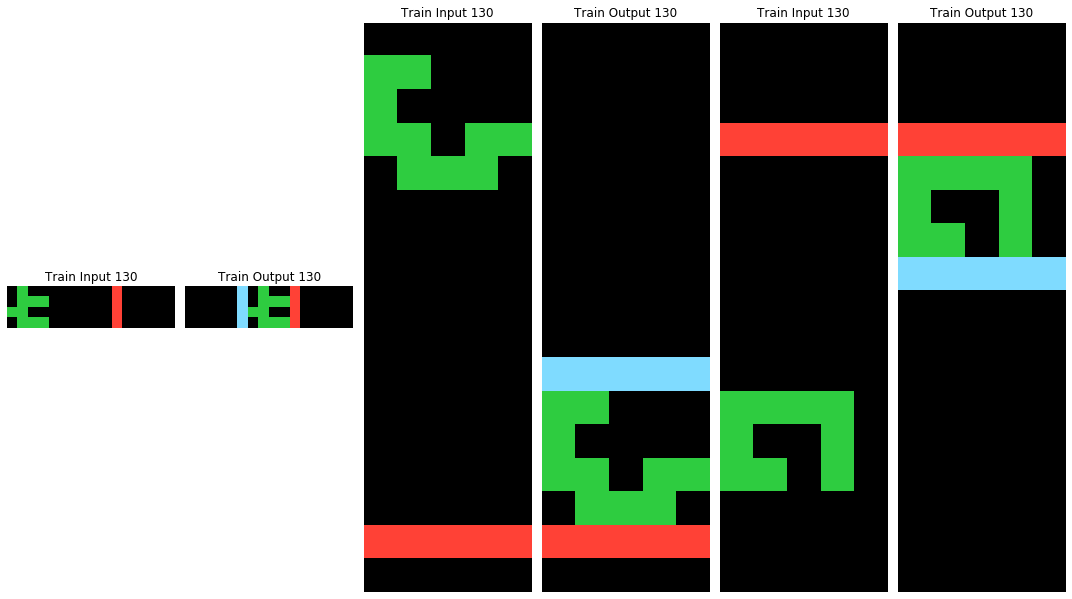

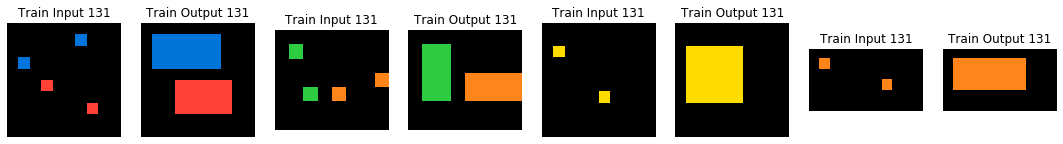

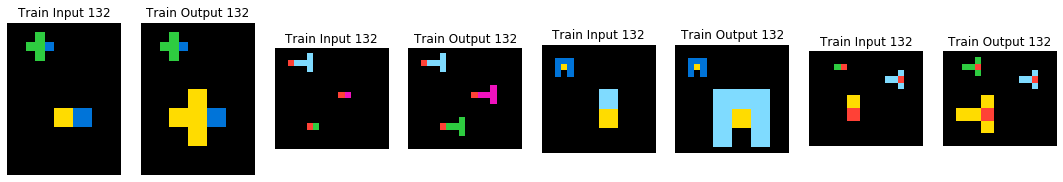

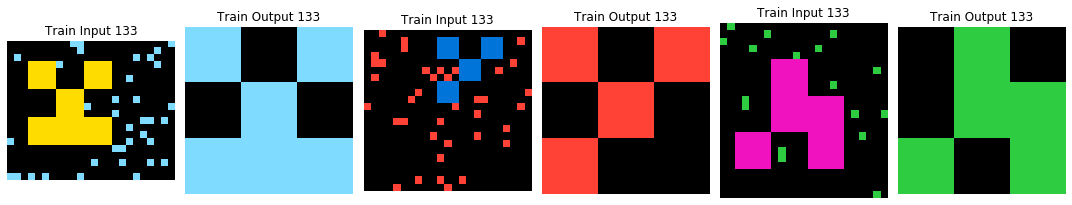

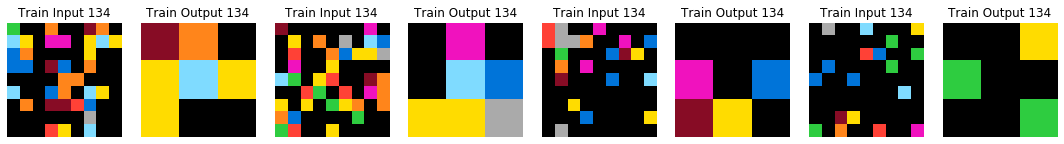

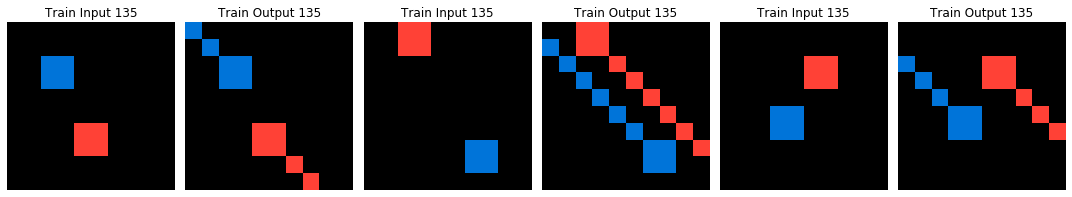

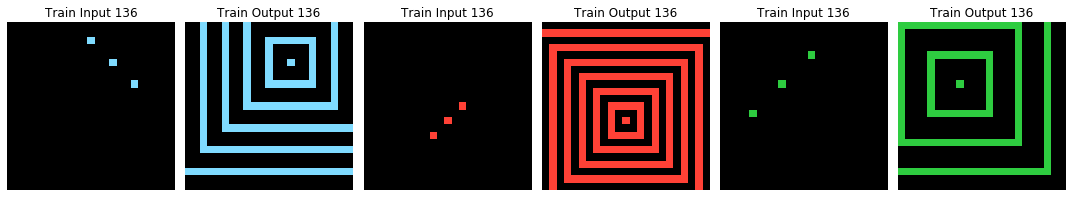

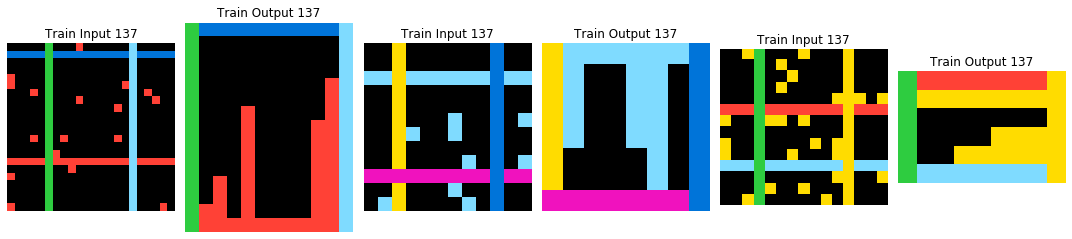

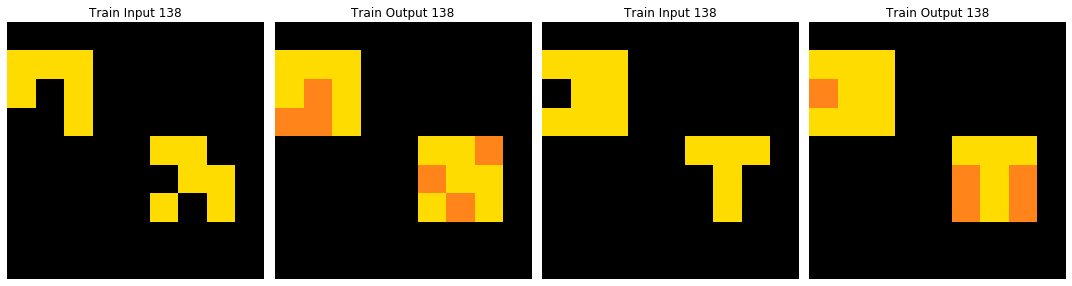

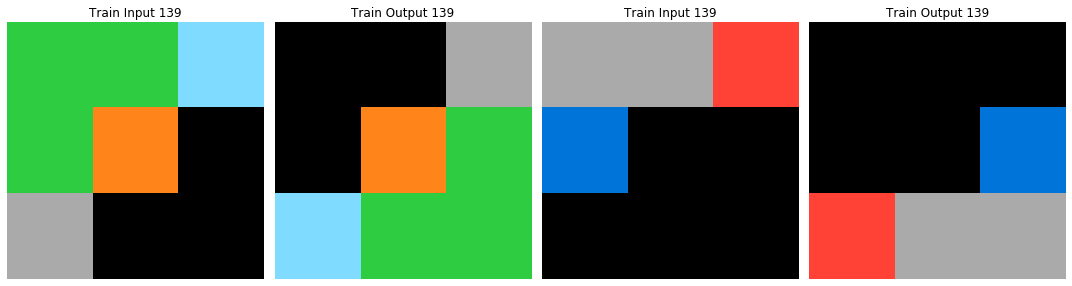

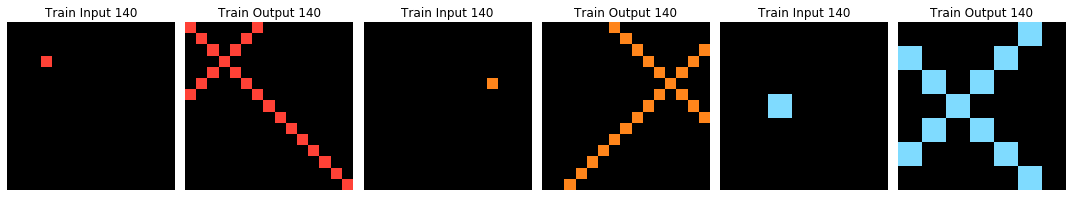

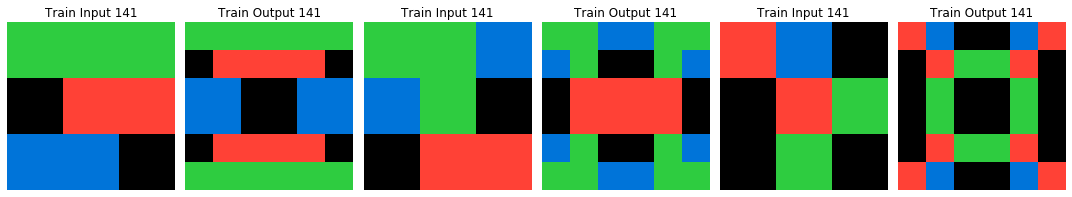

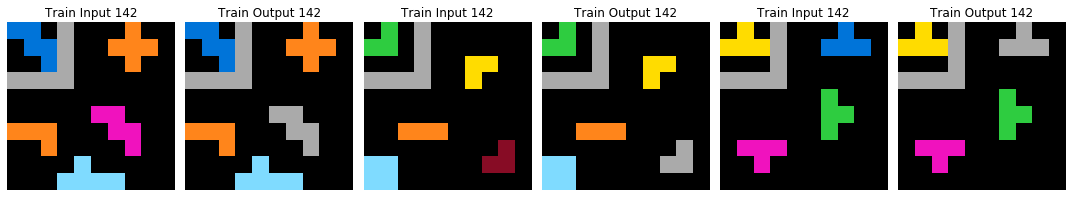

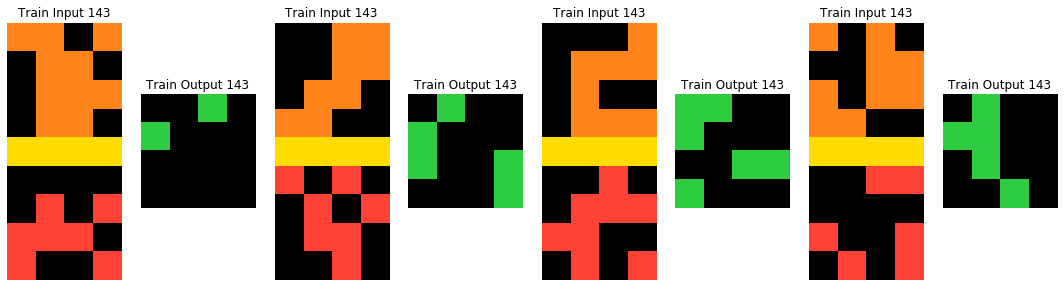

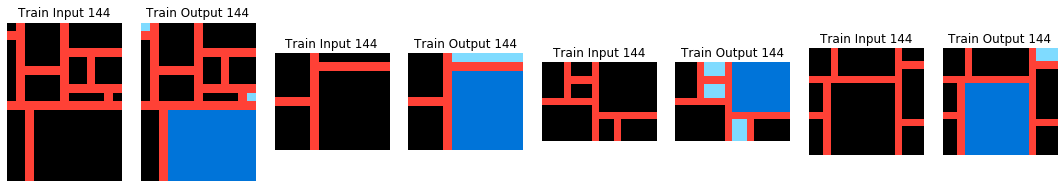

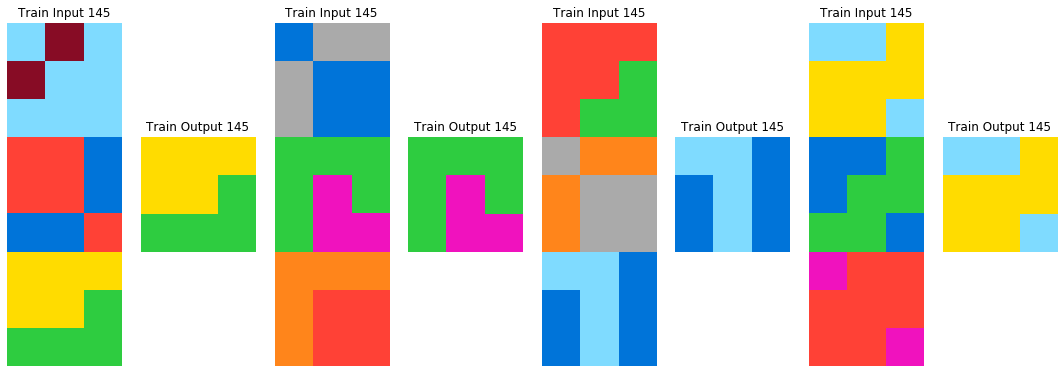

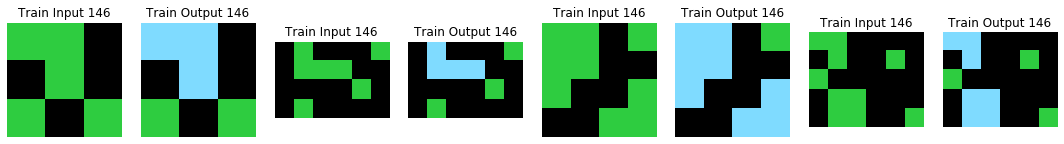

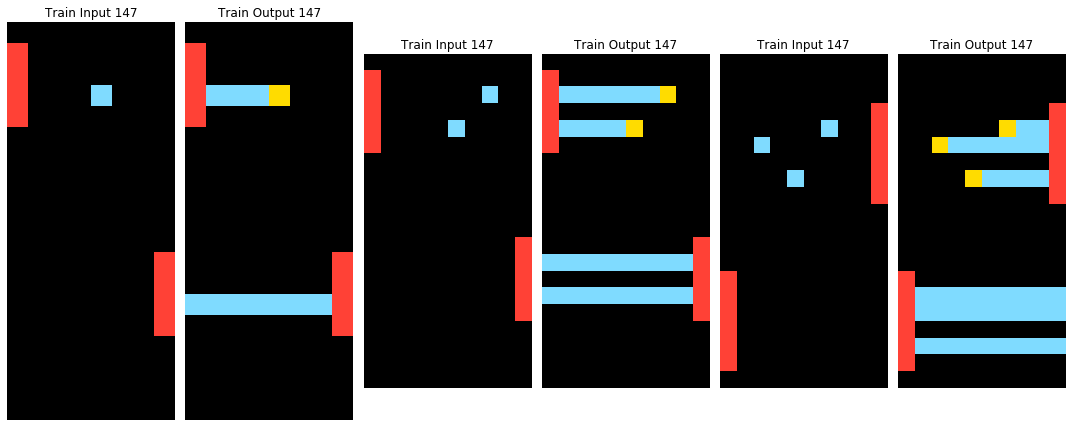

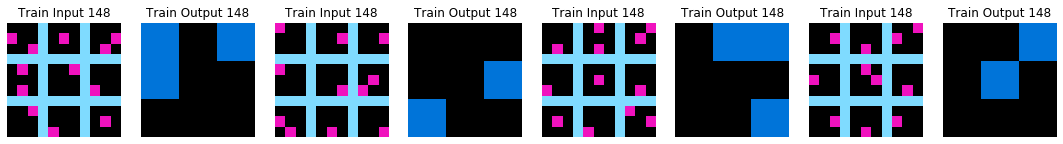

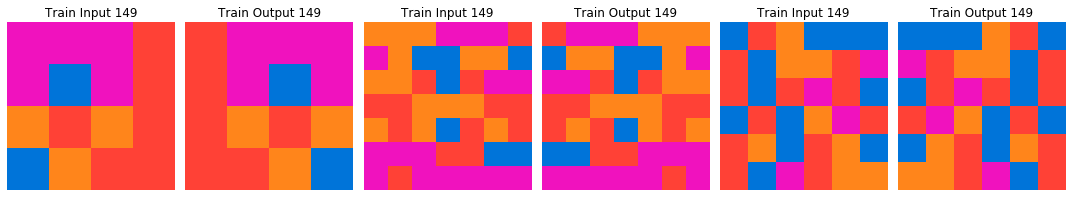

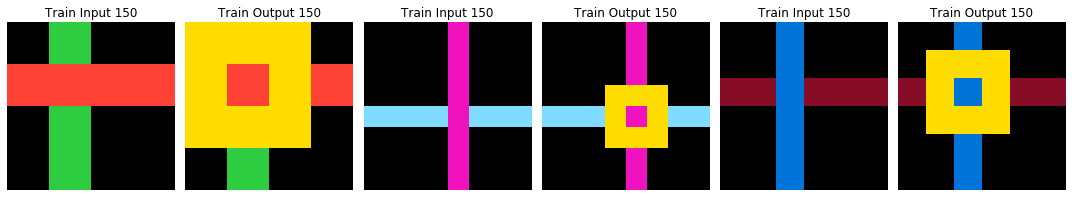

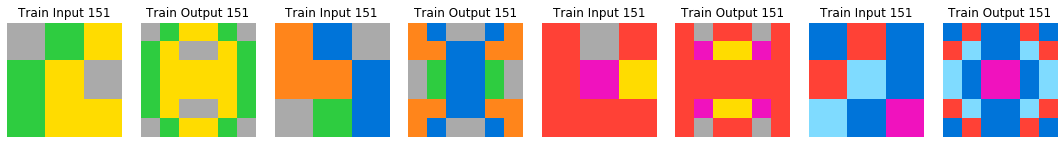

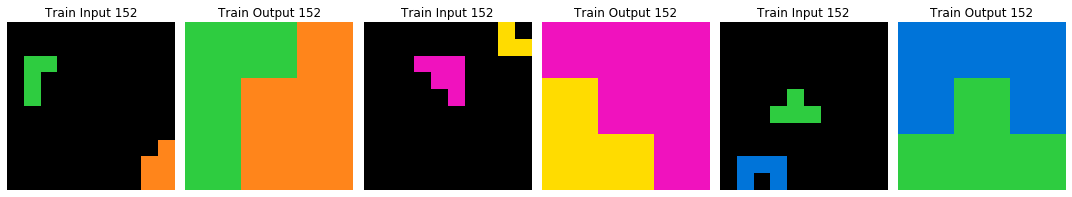

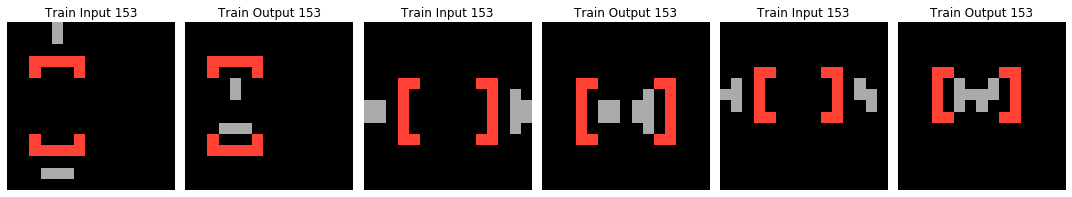

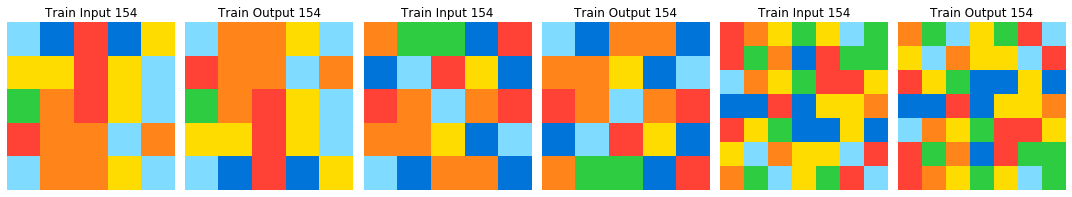

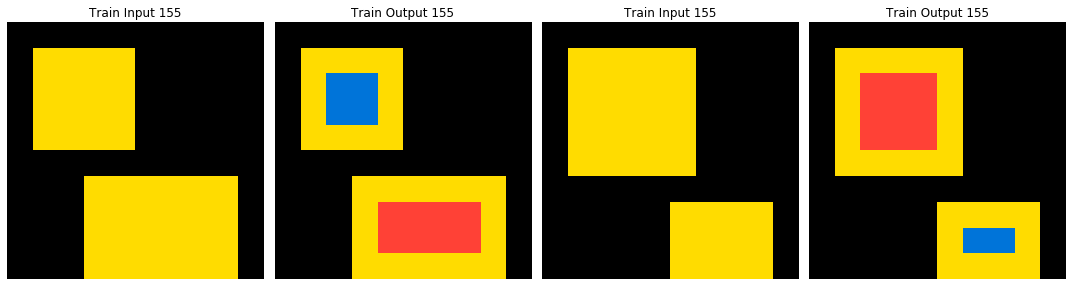

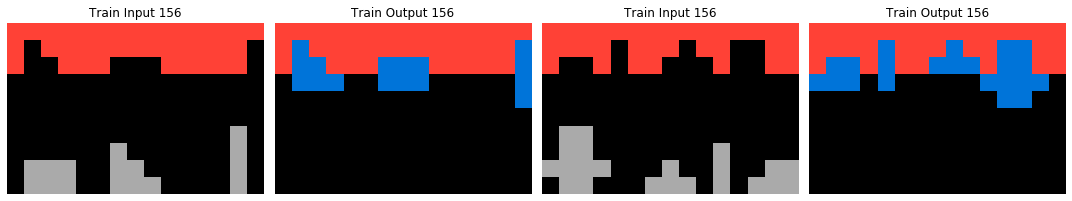

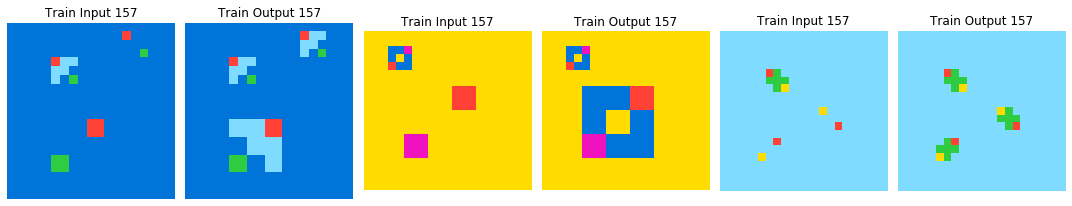

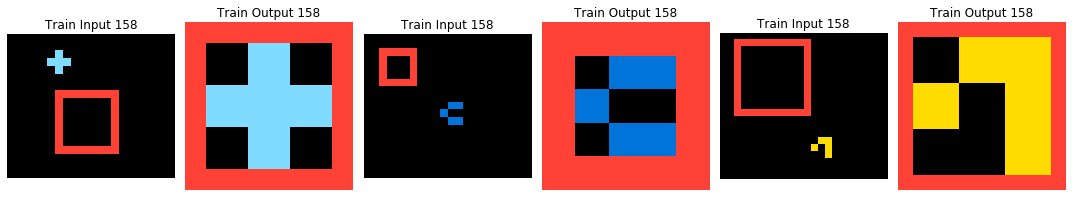

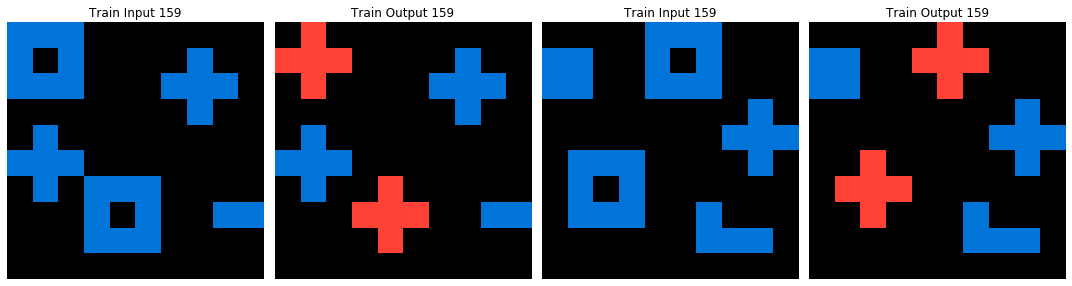

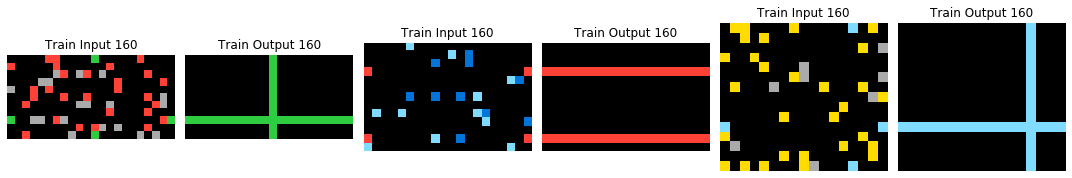

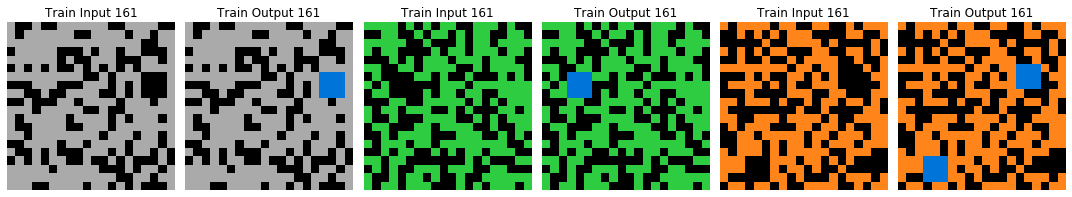

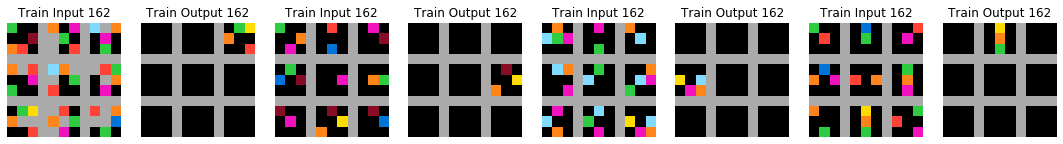

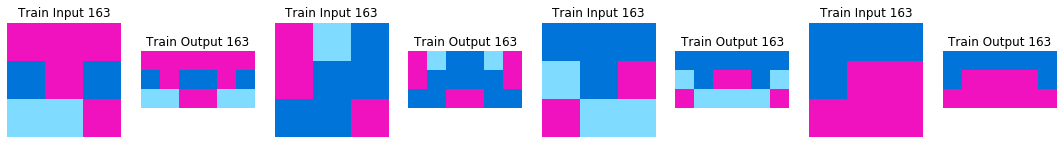

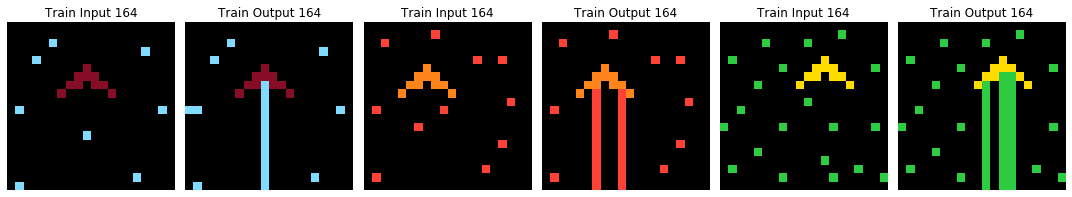

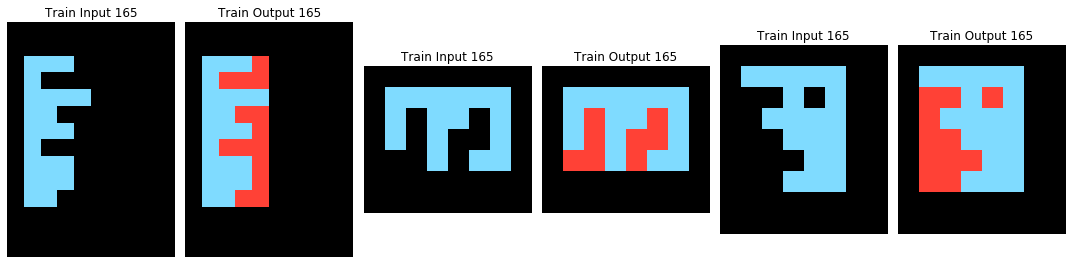

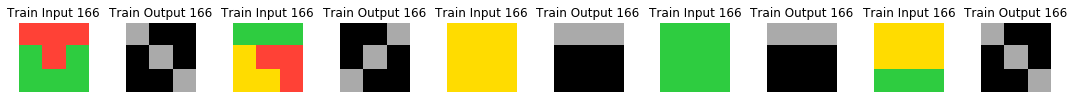

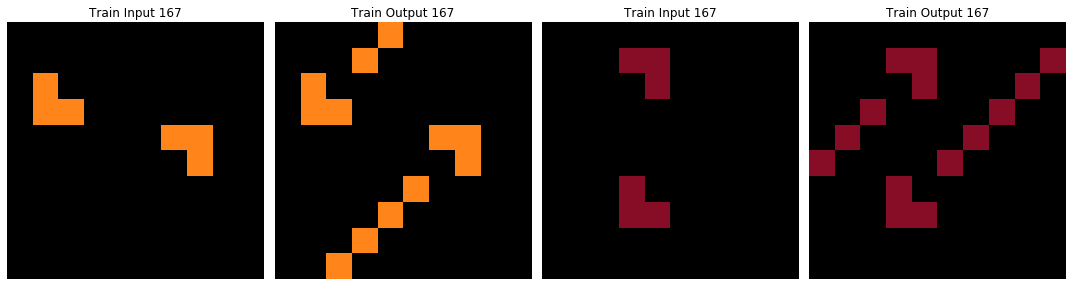

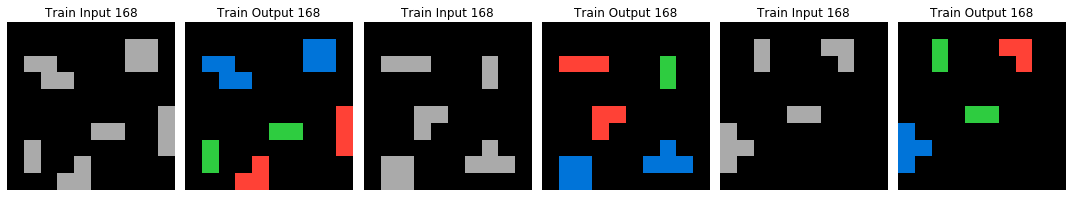

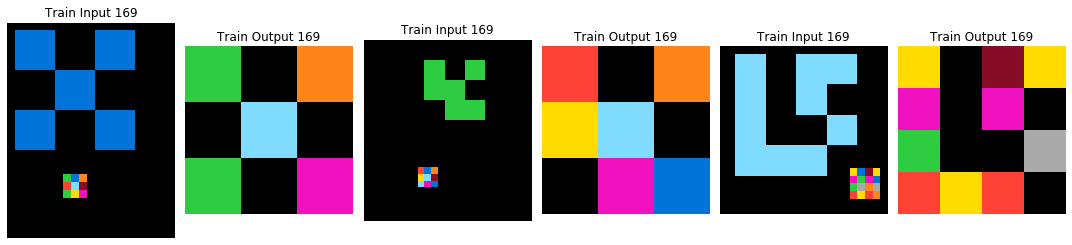

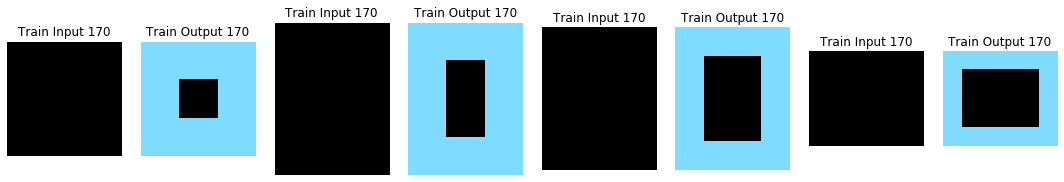

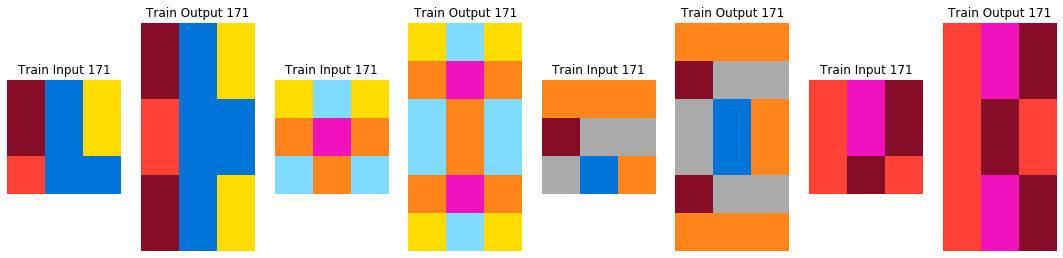

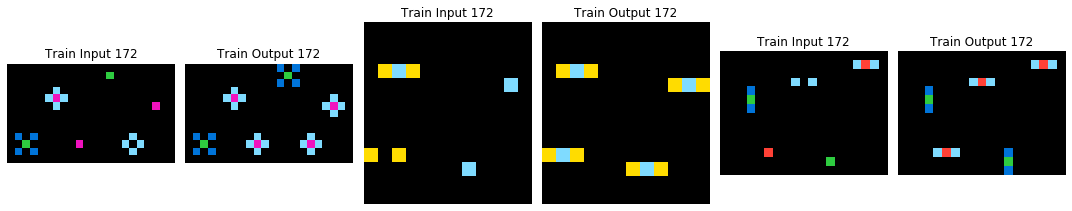

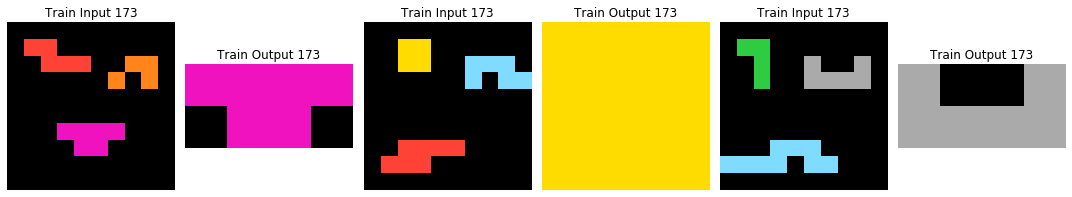

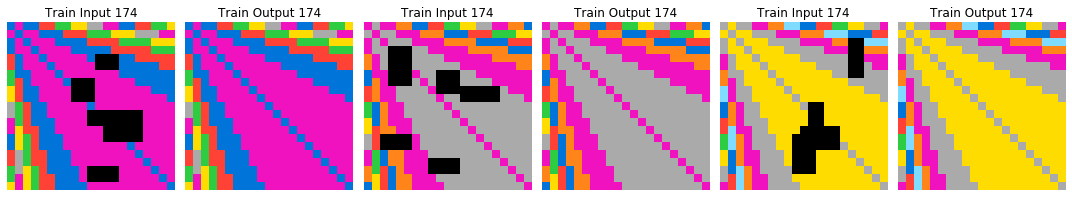

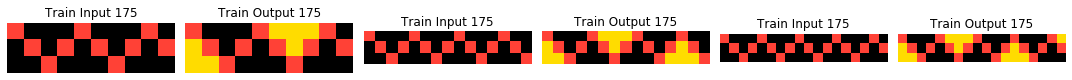

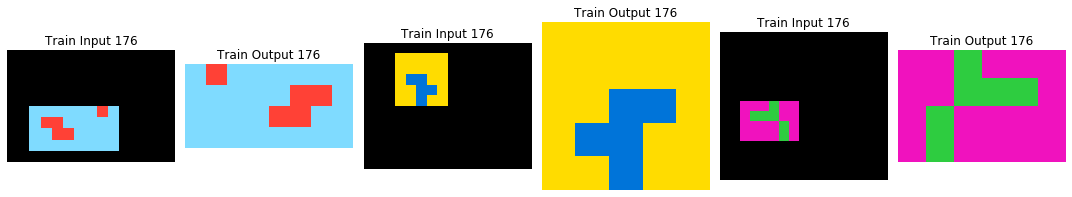

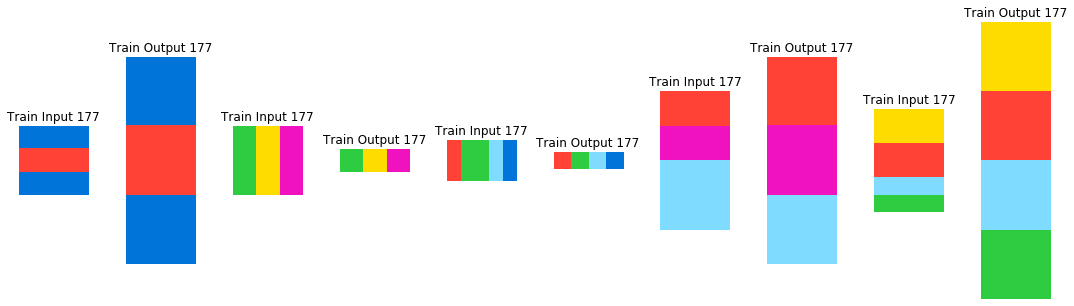

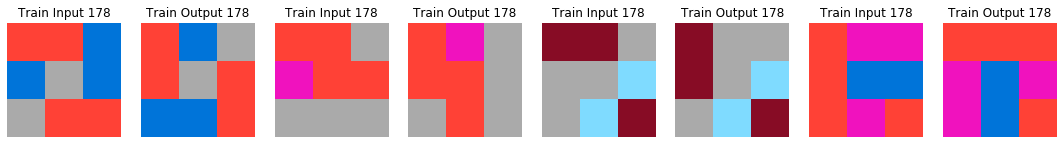

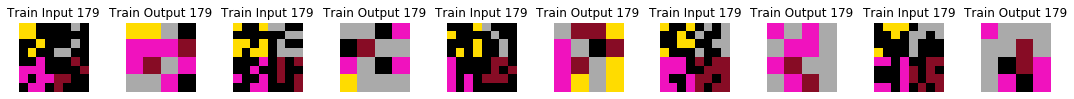

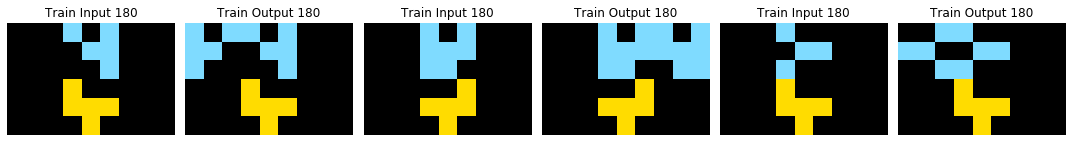

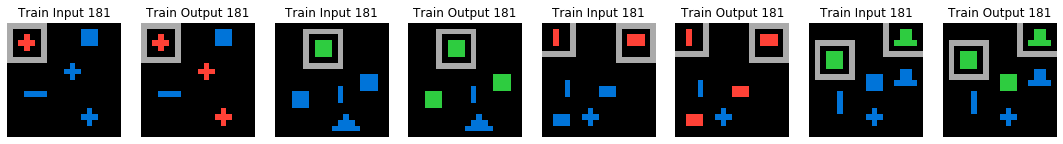

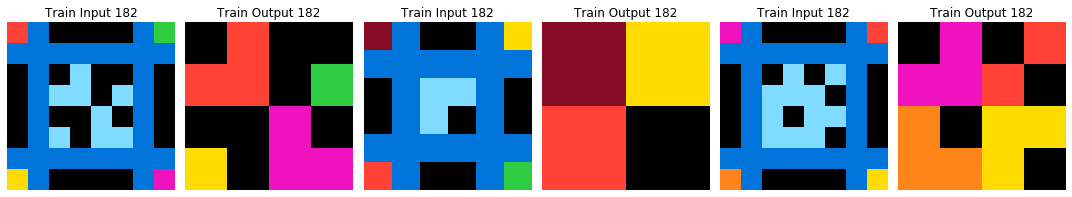

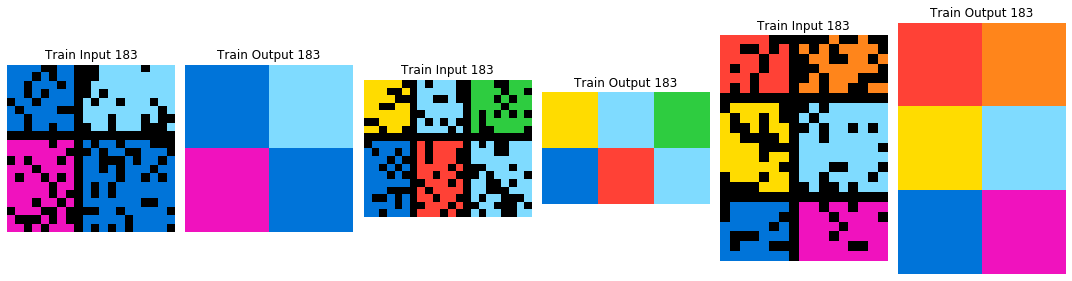

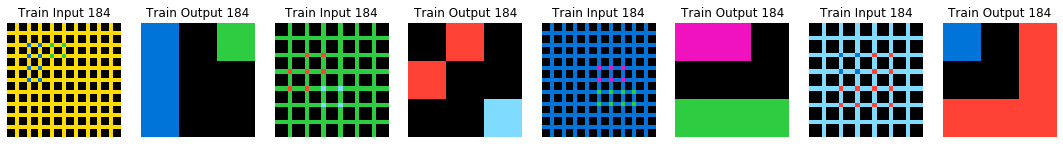

C:\Users\Work\Anaconda3\envs\Conda_test\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


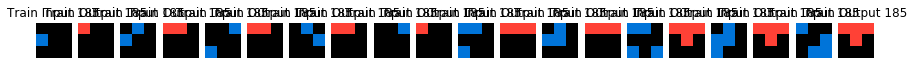

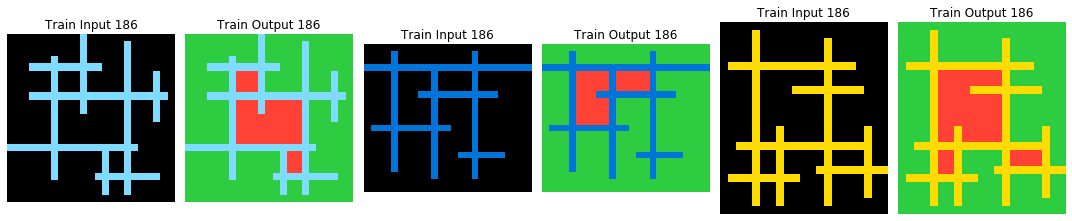

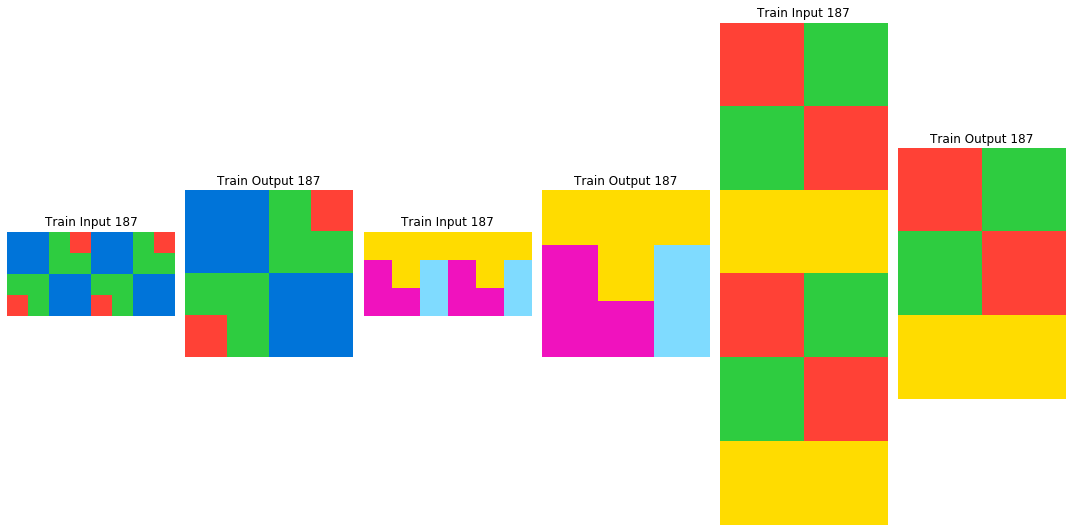

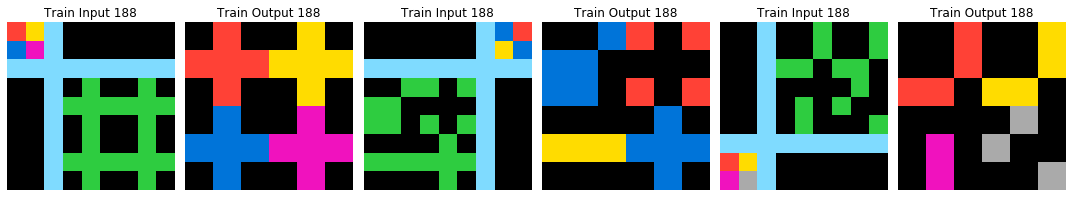

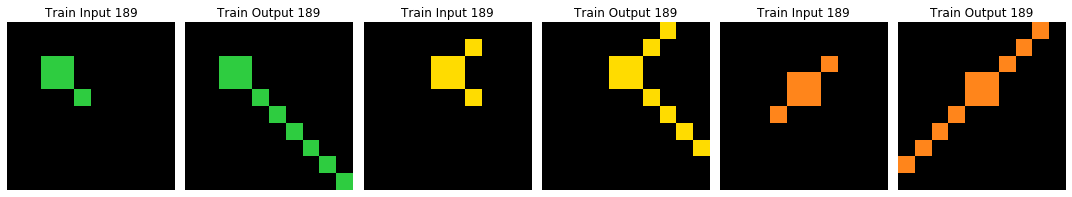

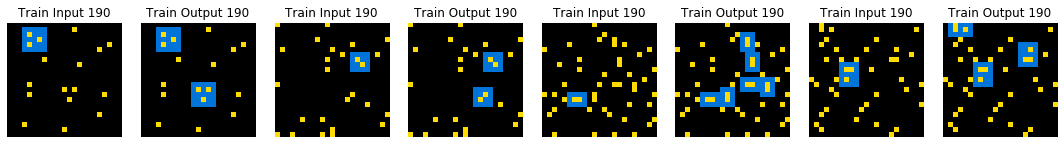

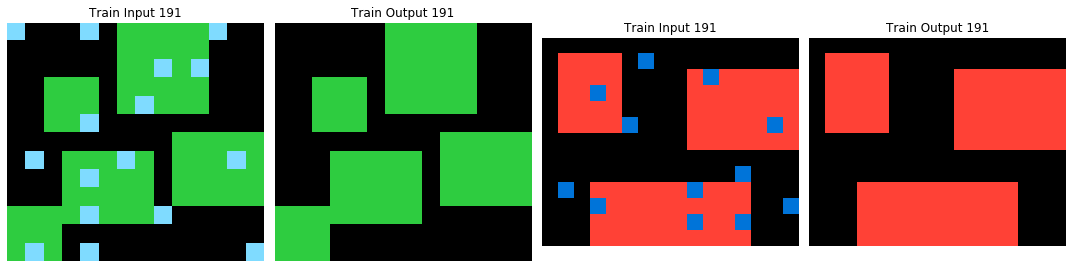

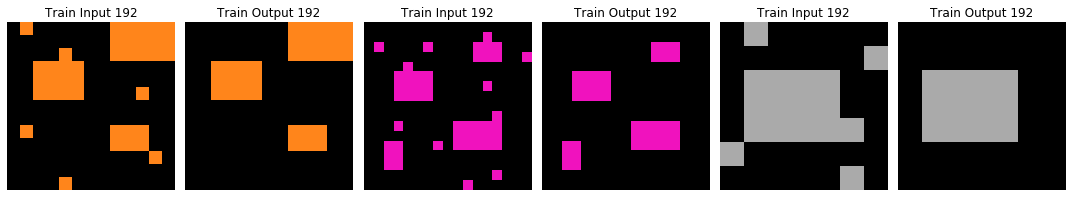

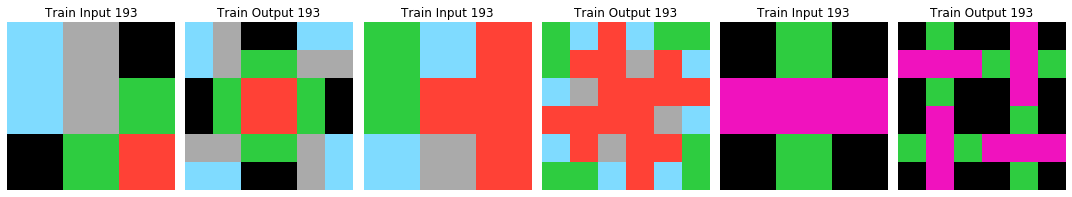

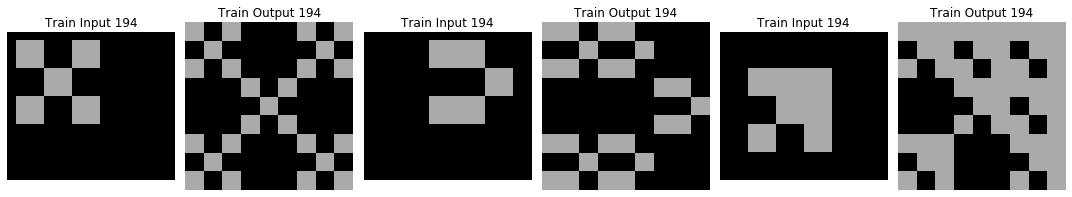

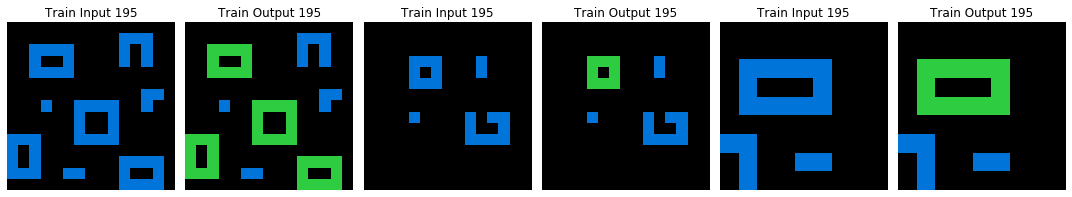

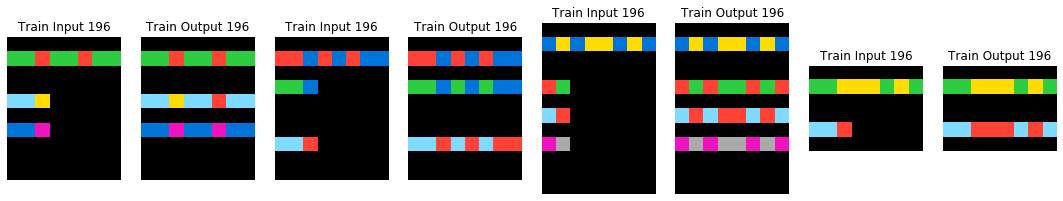

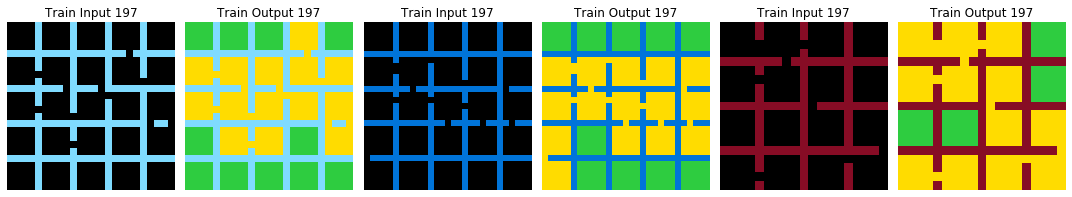

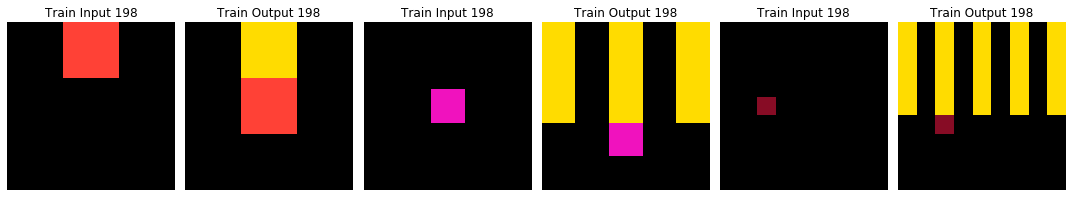

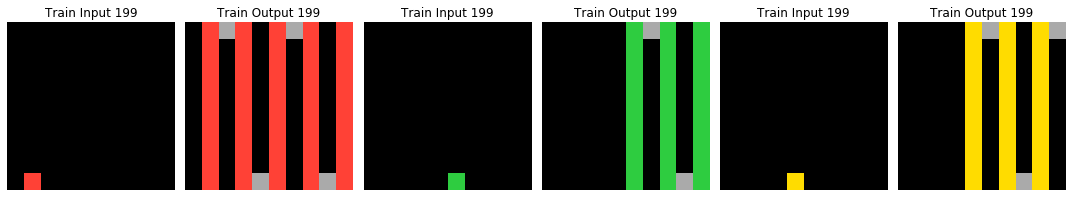

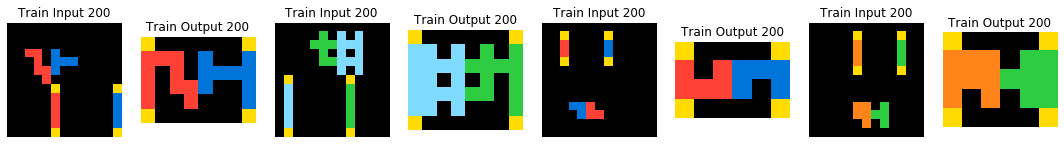

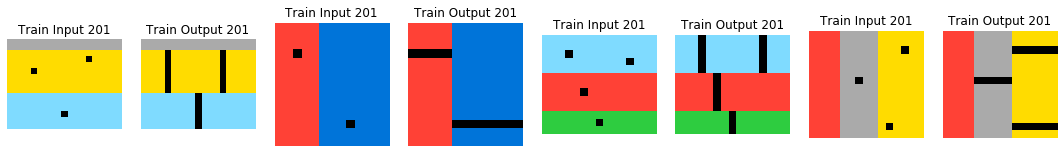

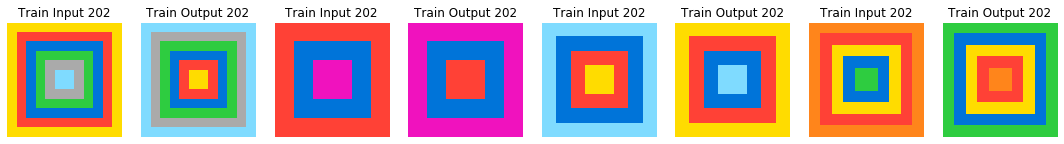

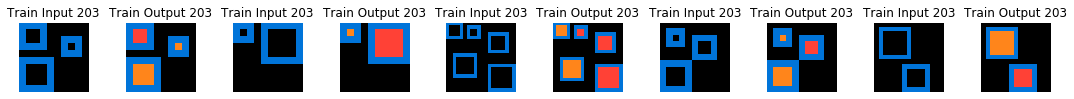

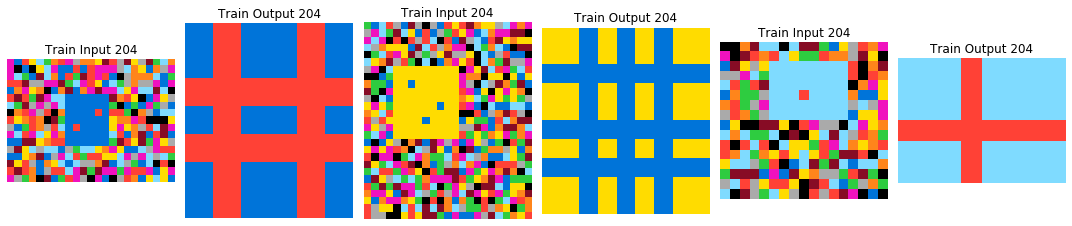

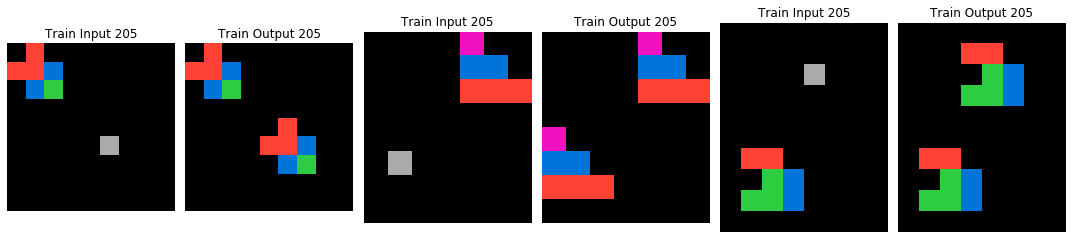

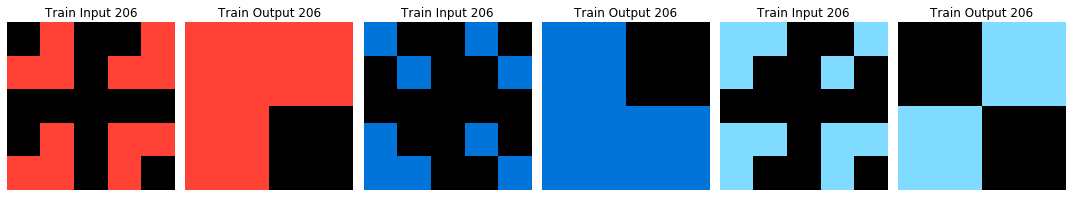

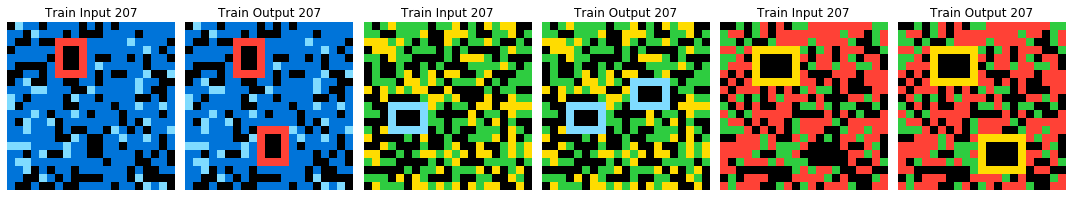

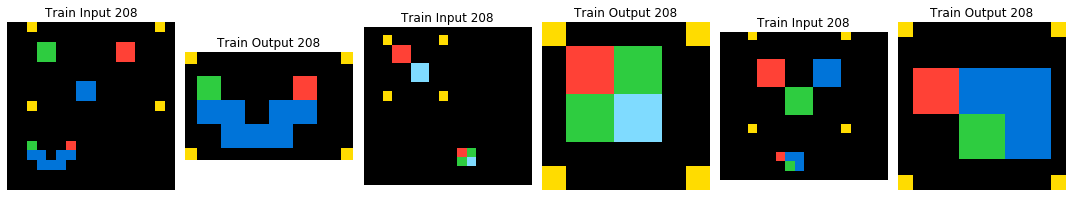

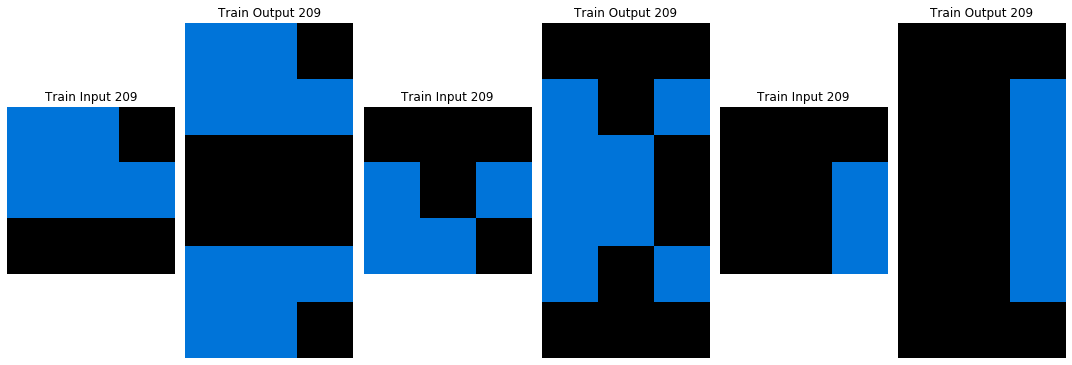

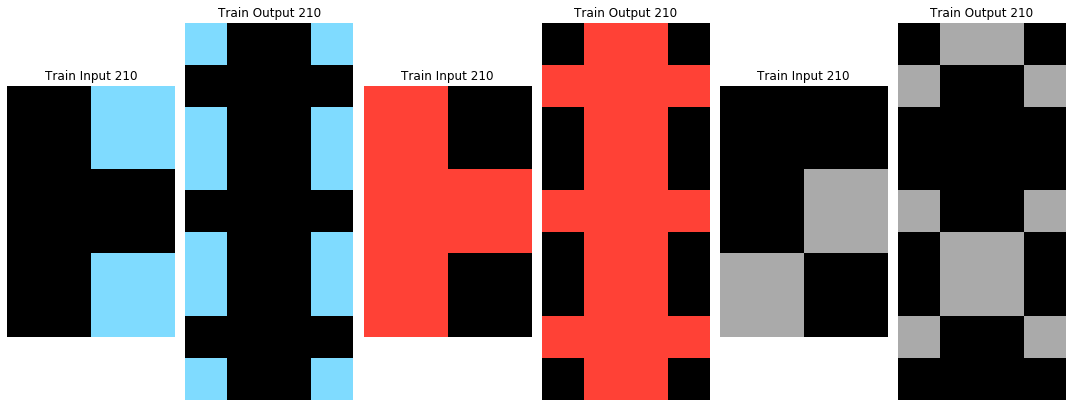

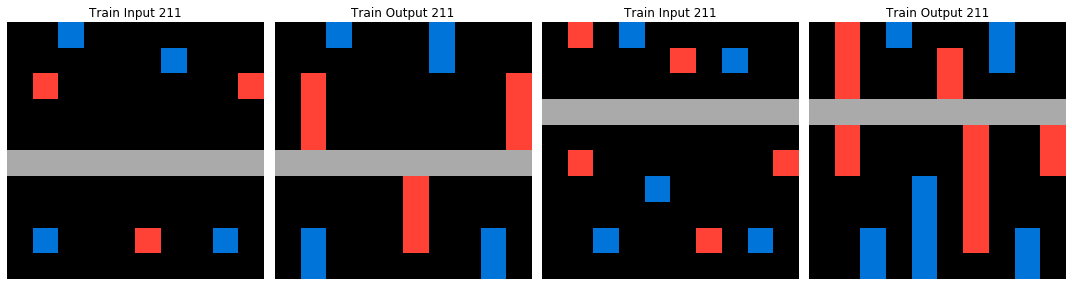

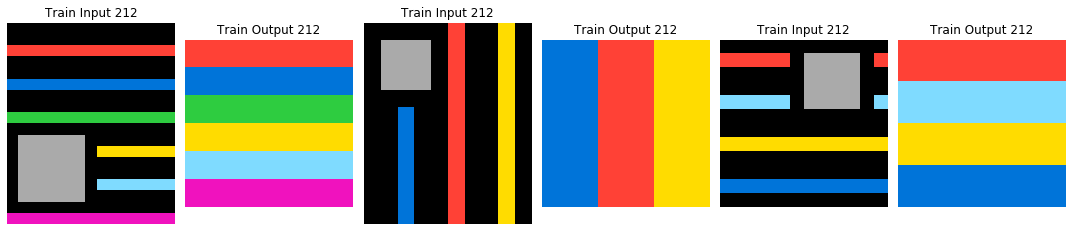

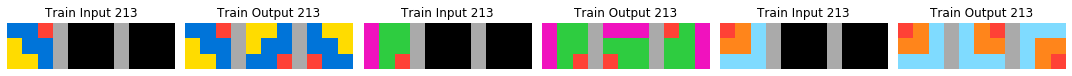

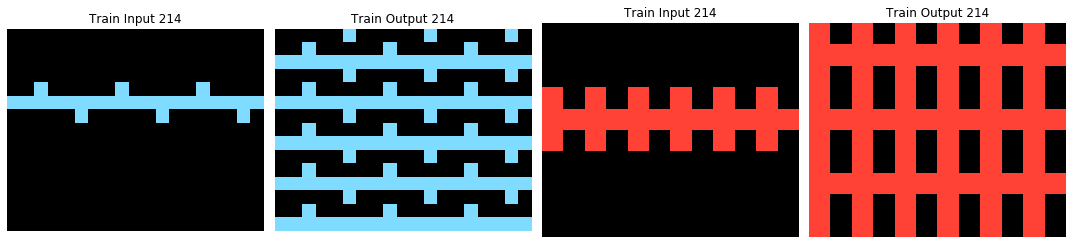

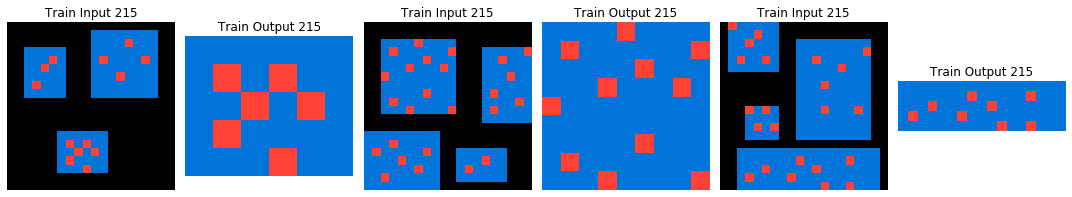

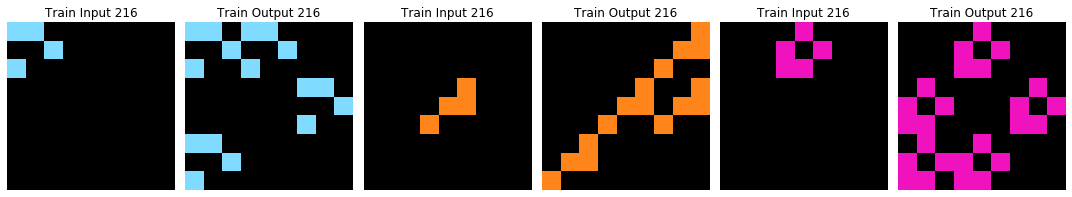

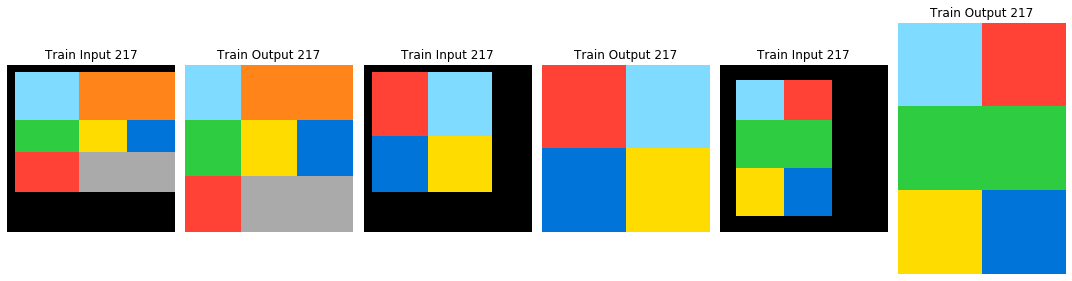

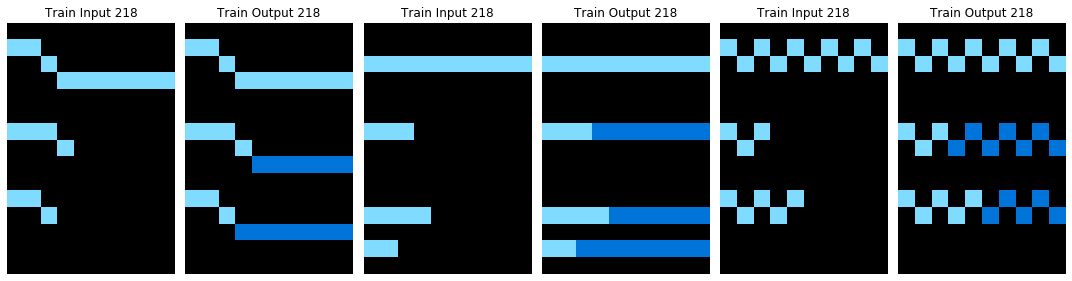

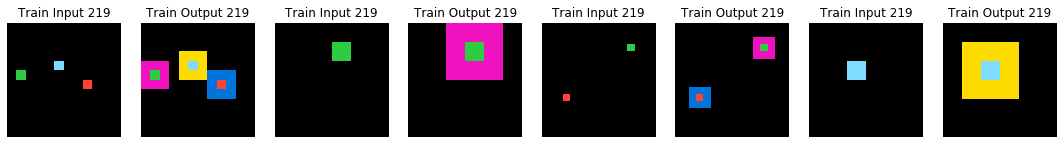

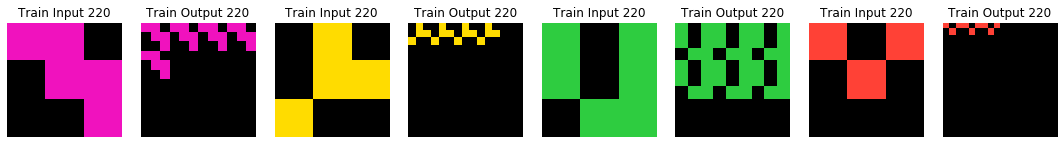

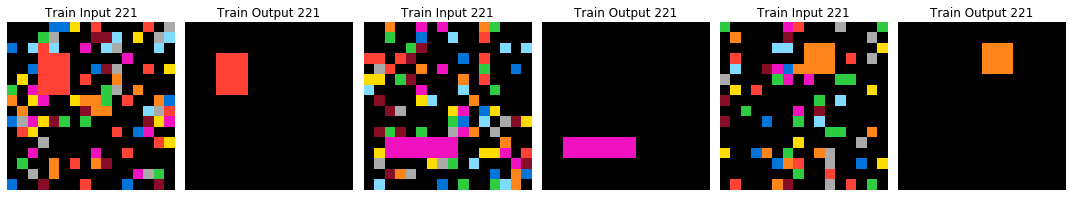

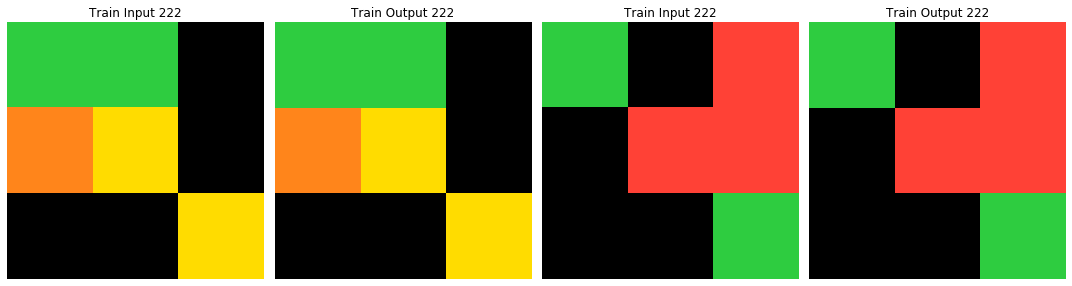

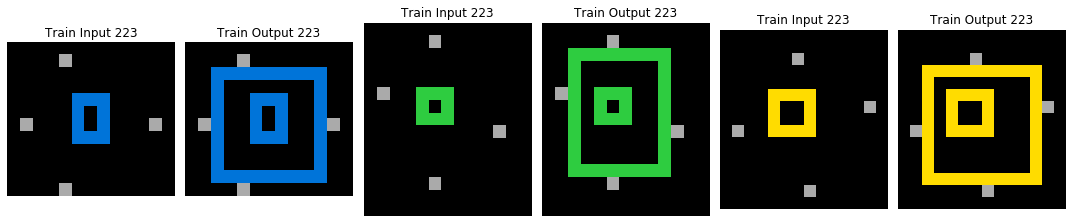

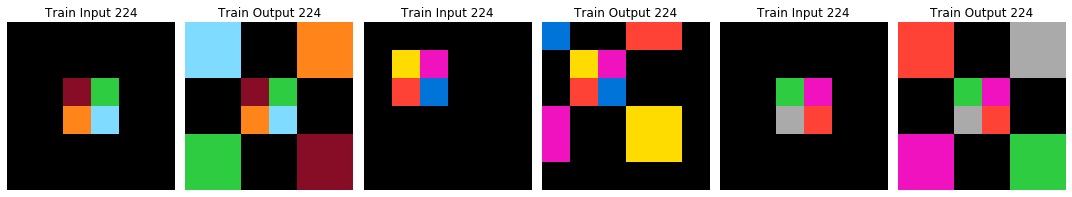

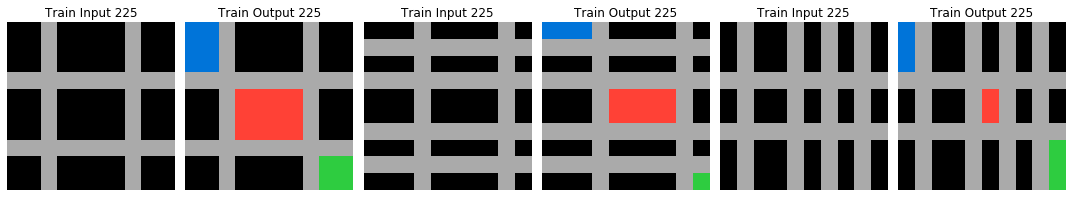

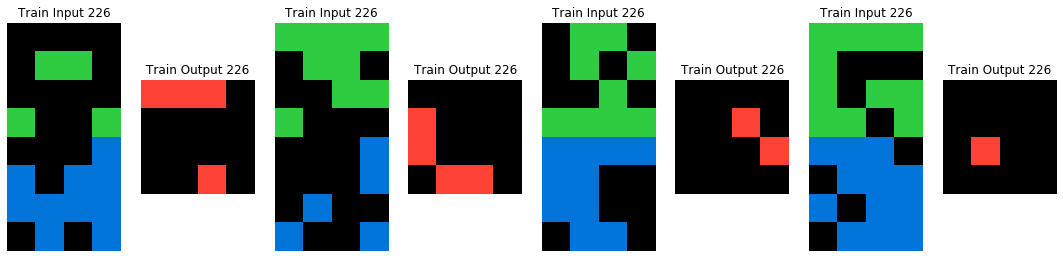

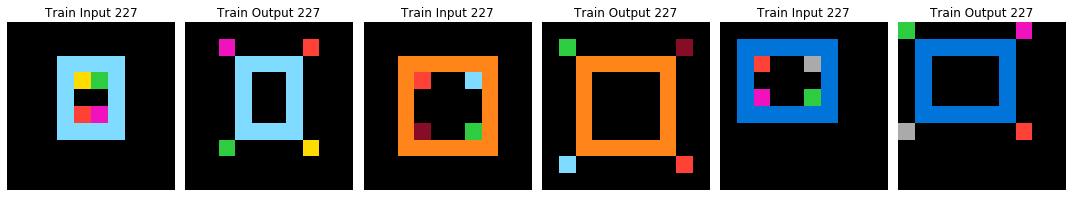

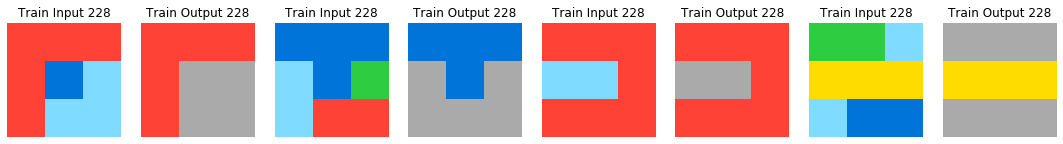

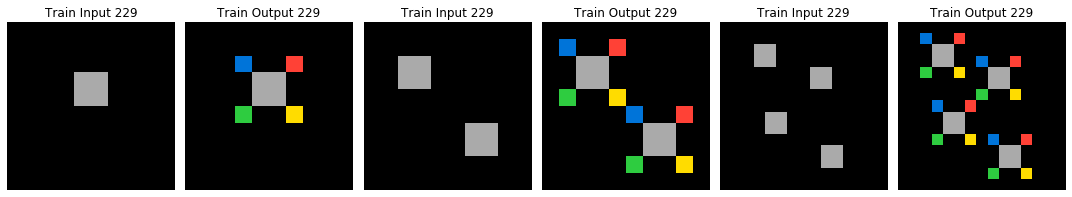

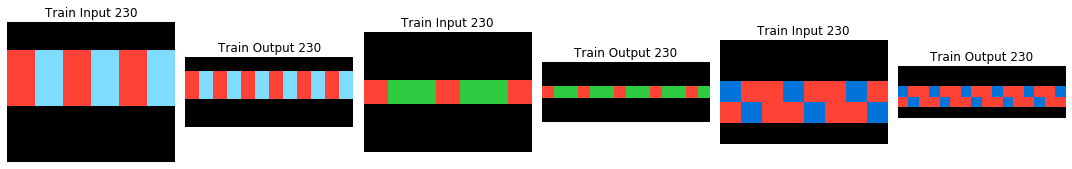

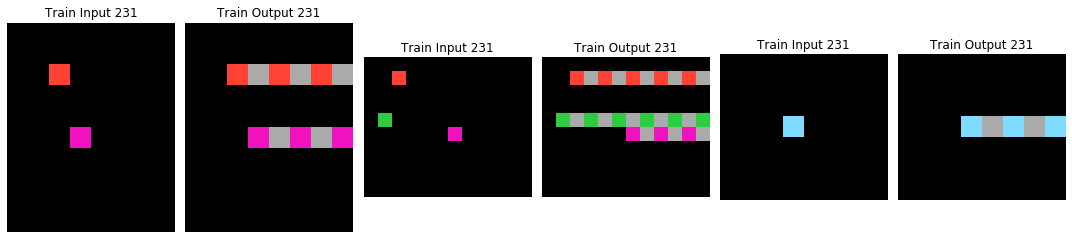

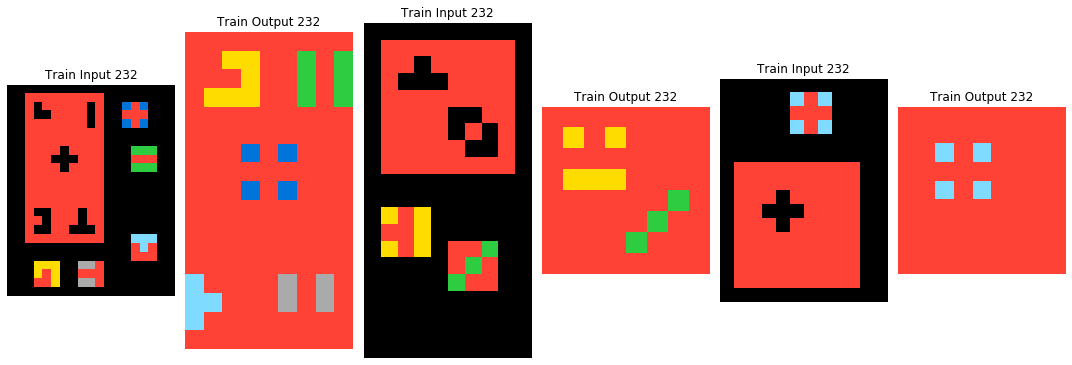

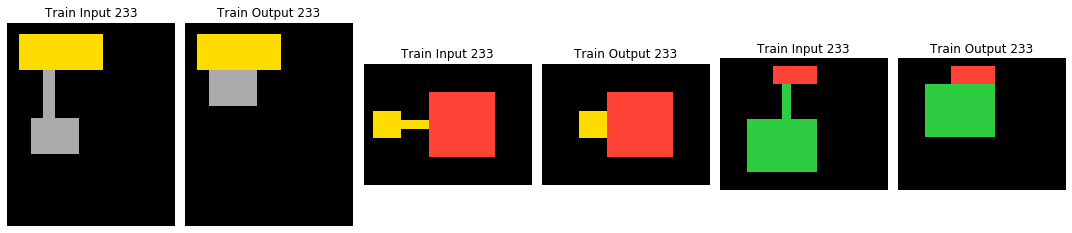

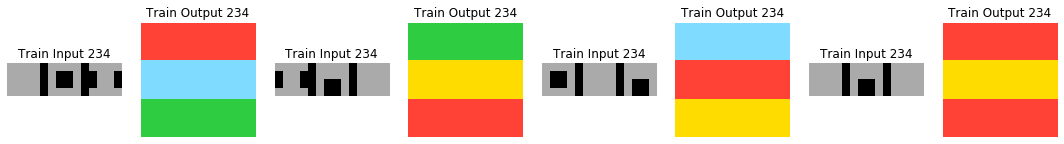

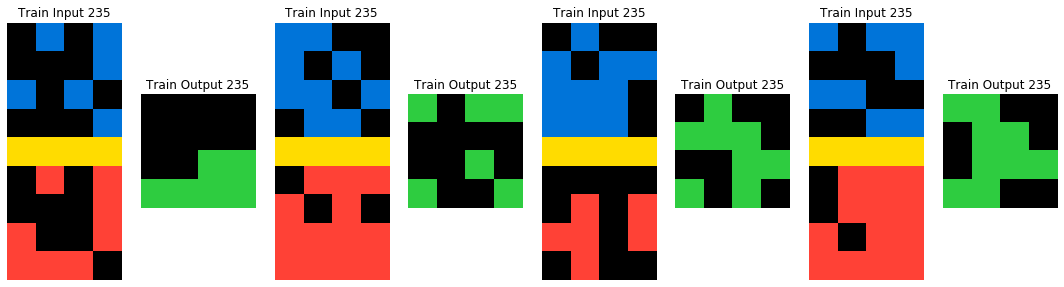

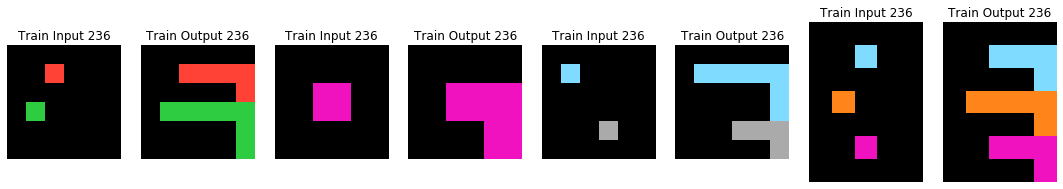

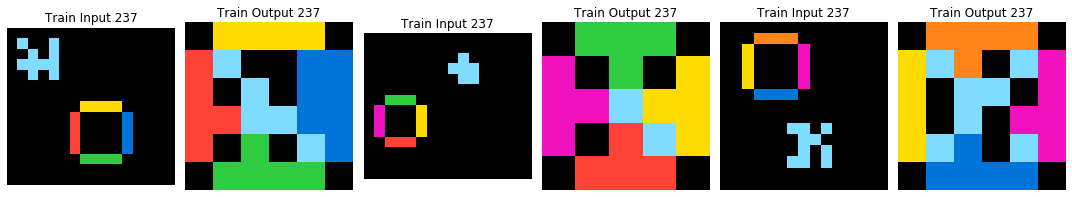

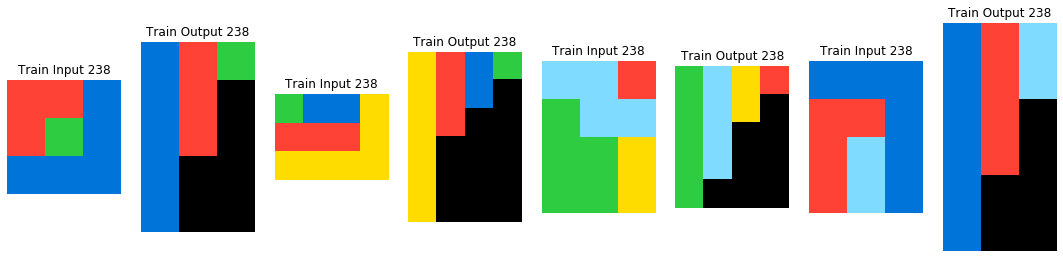

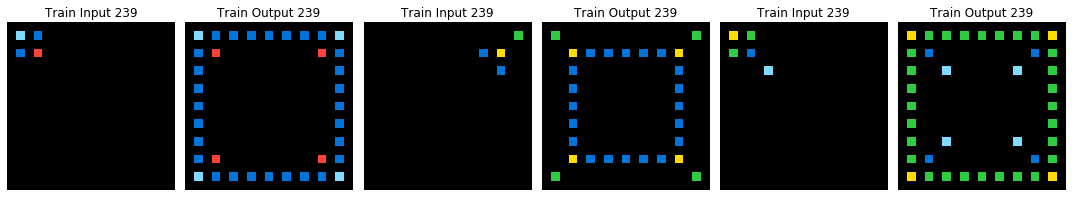

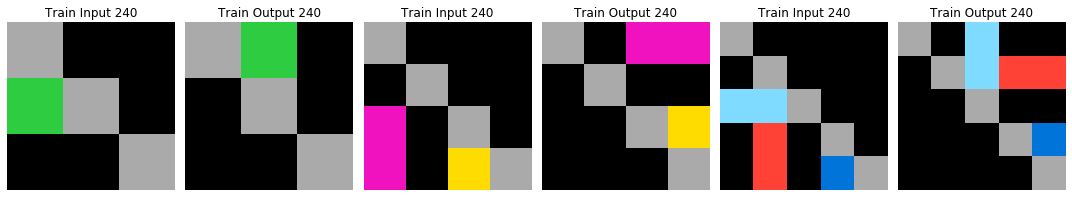

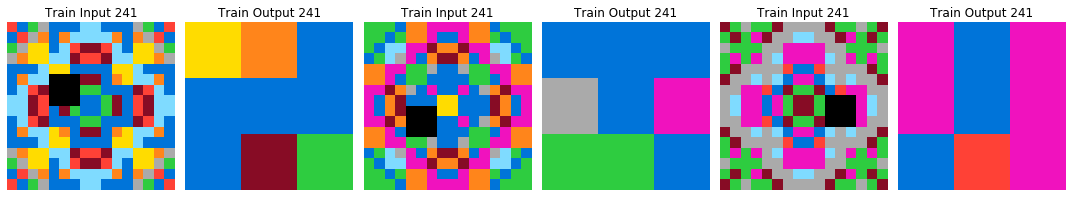

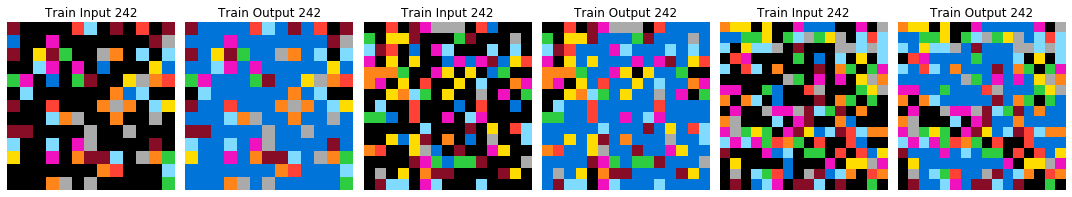

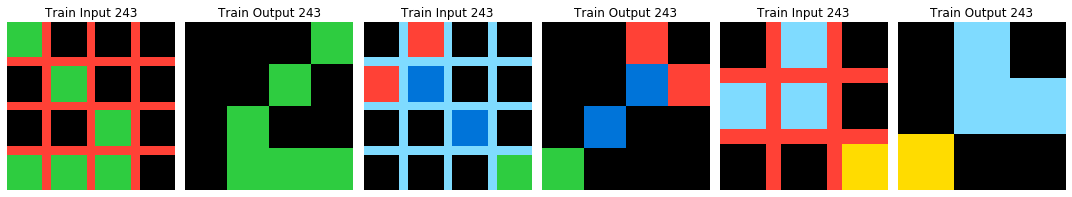

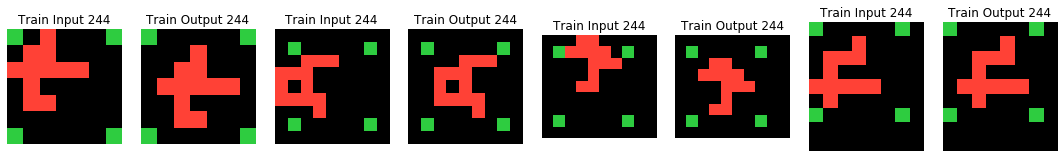

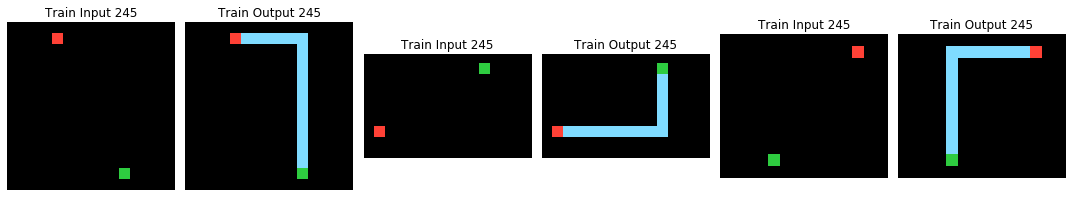

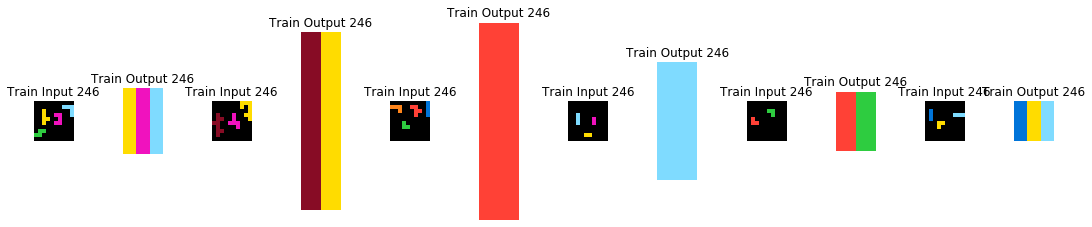

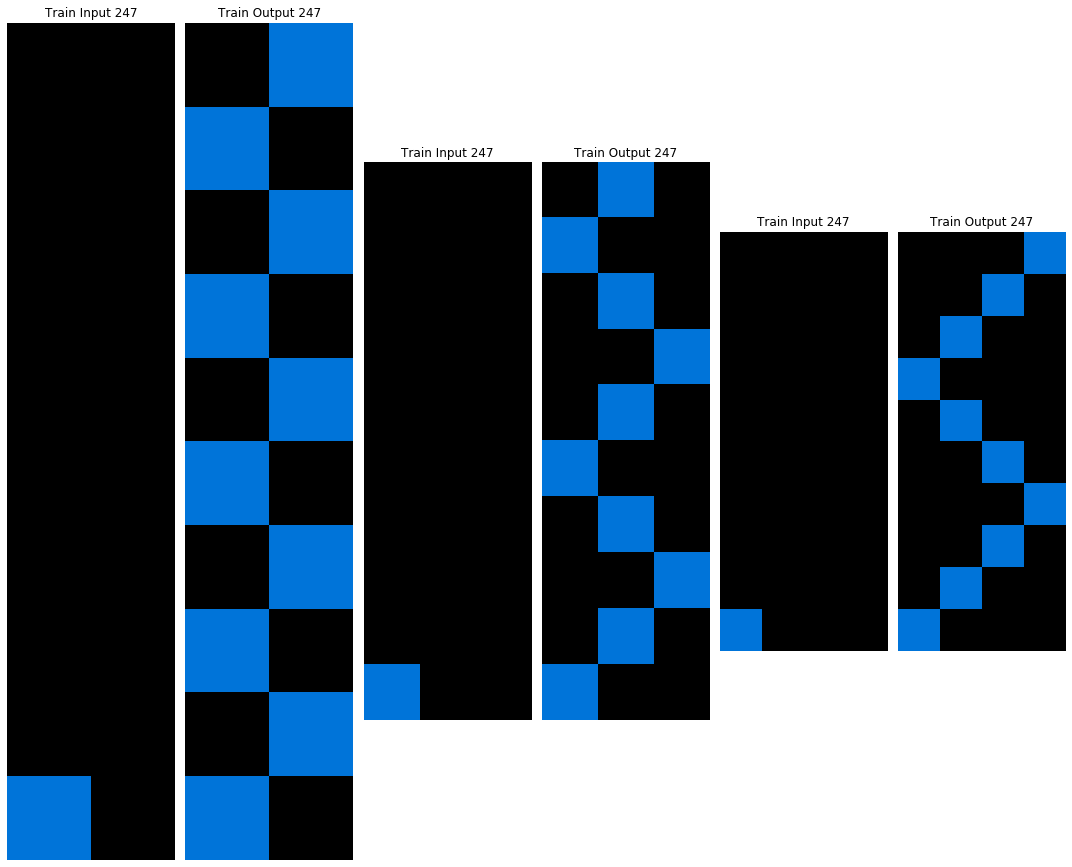

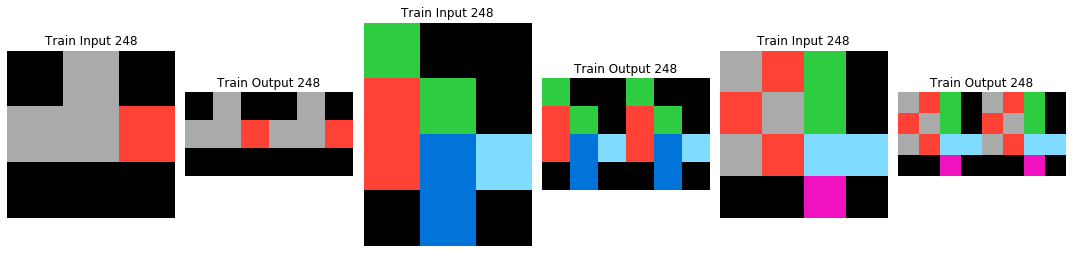

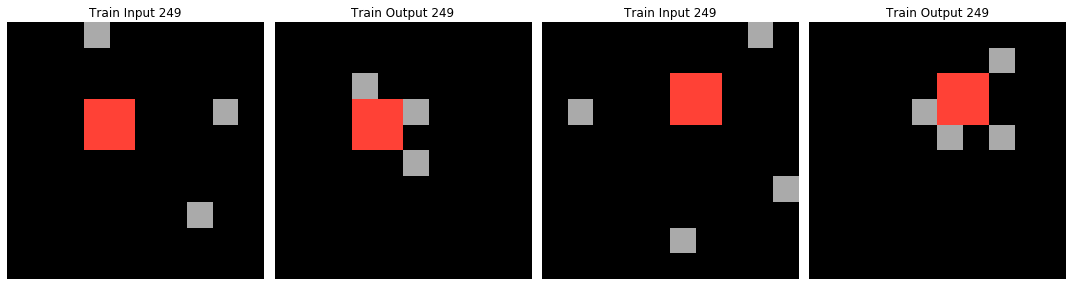

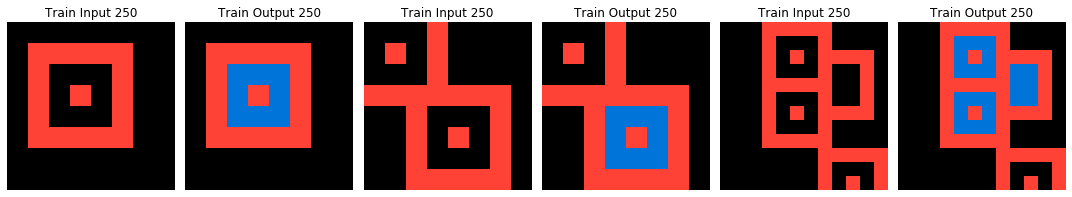

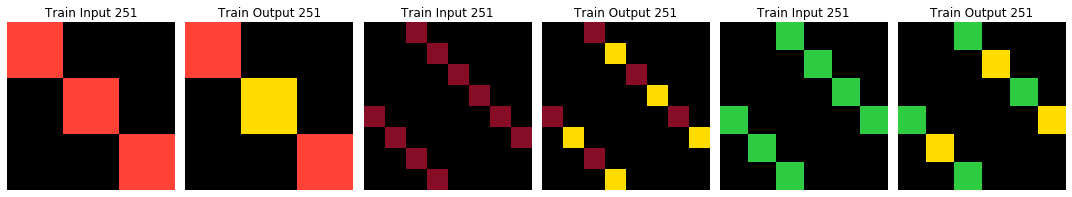

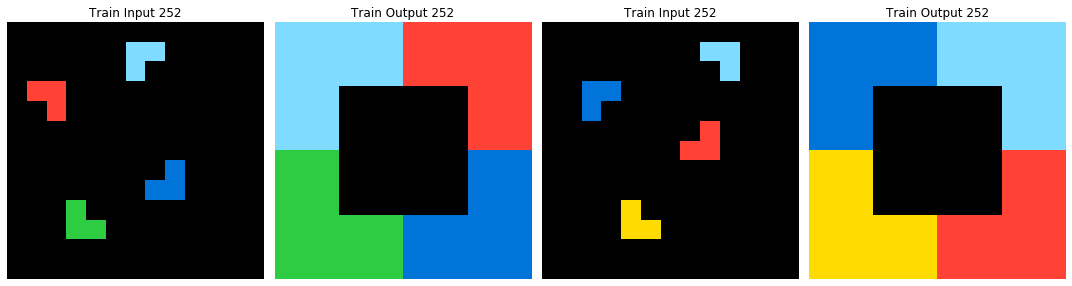

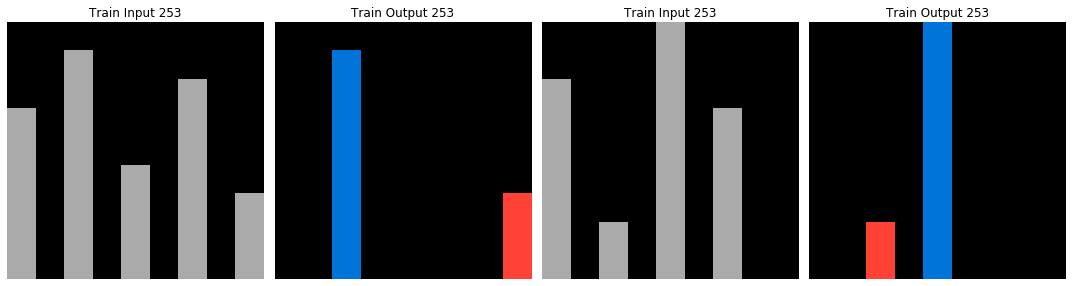

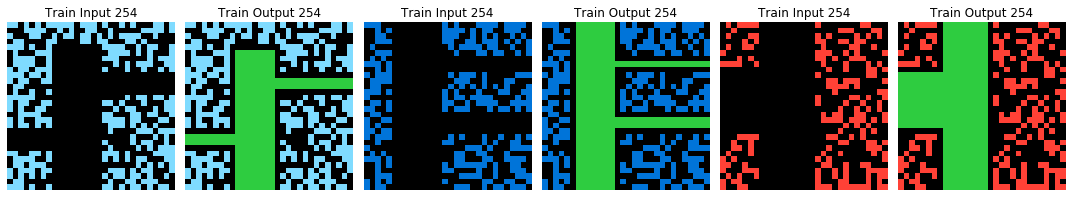

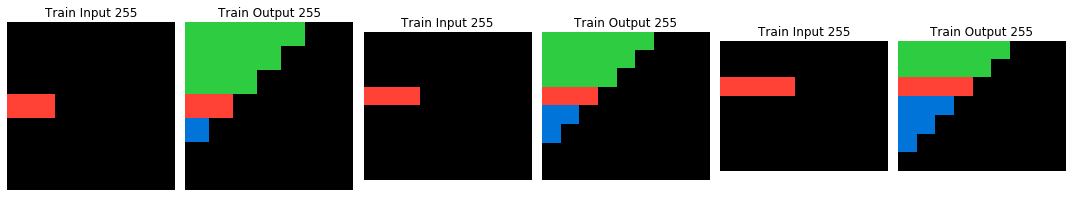

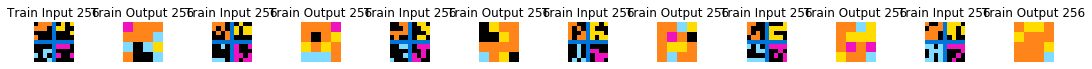

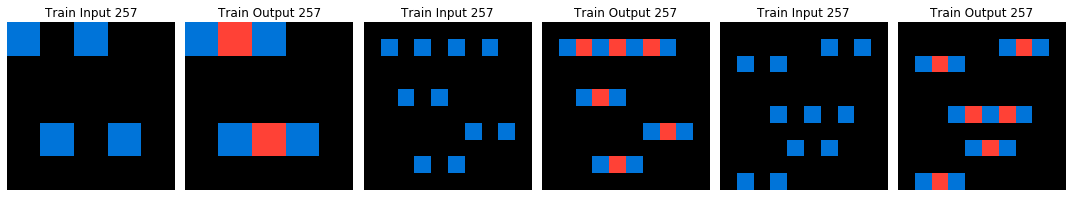

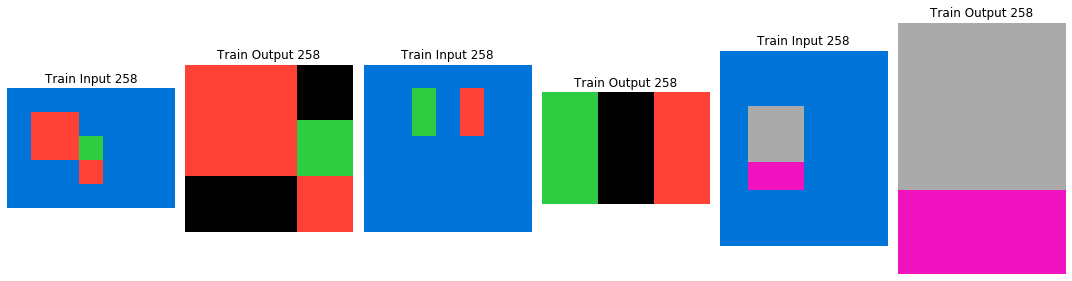

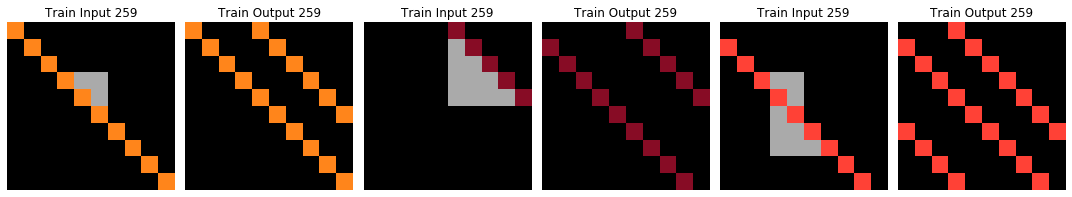

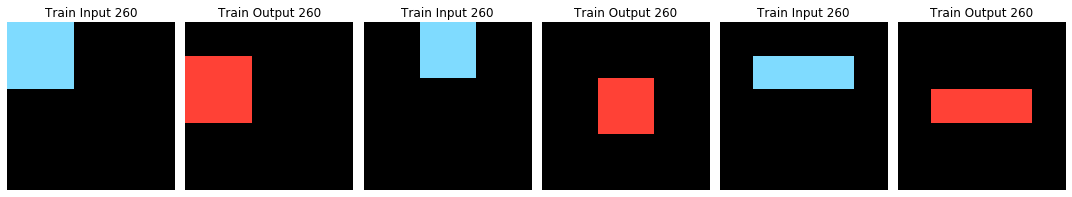

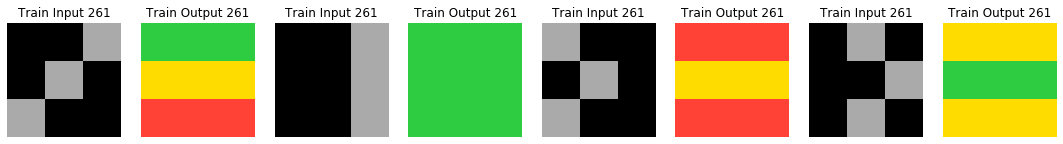

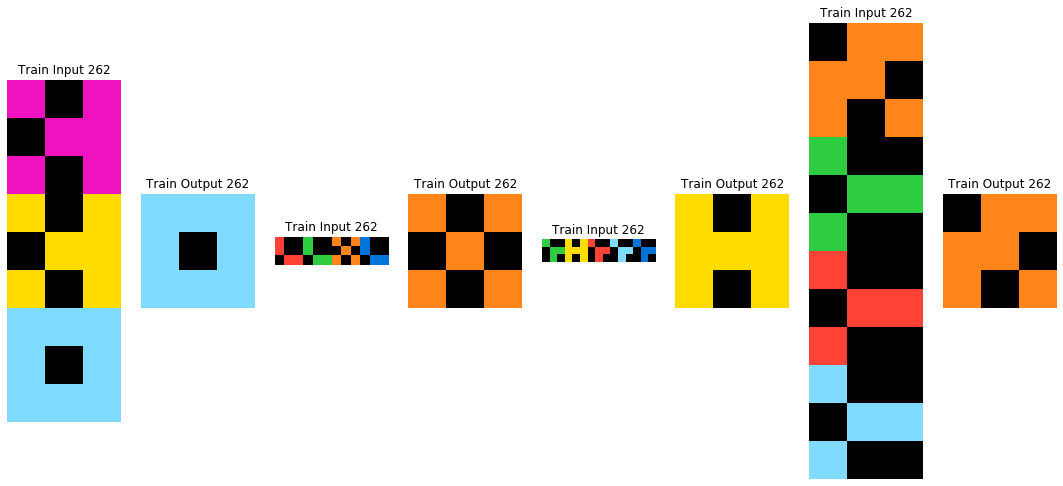

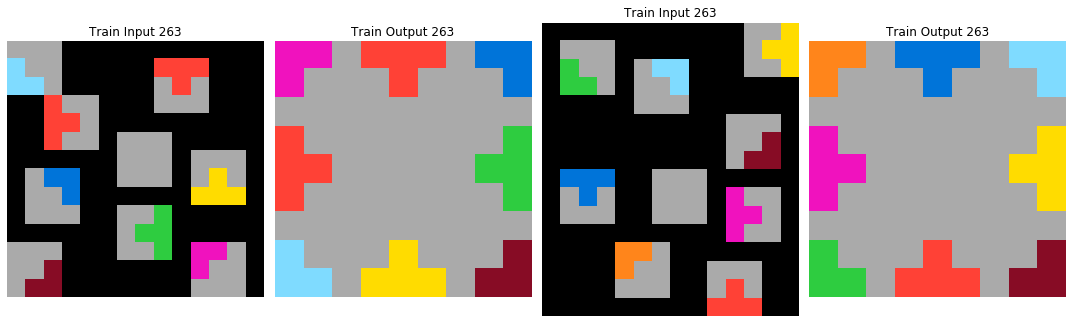

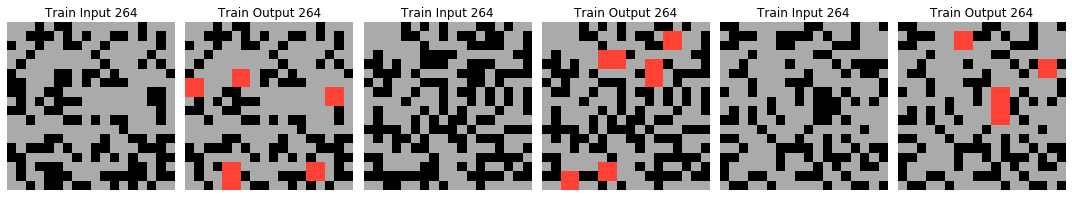

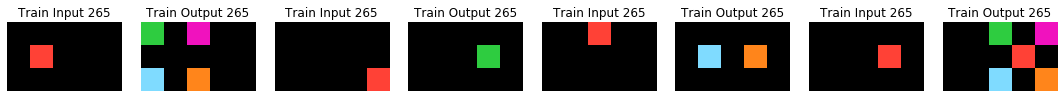

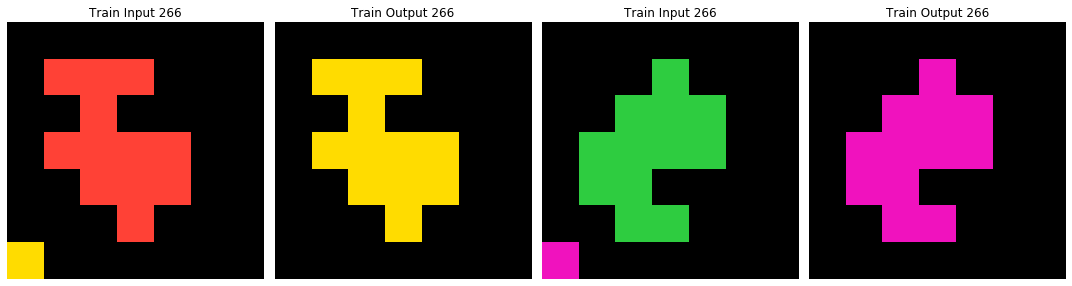

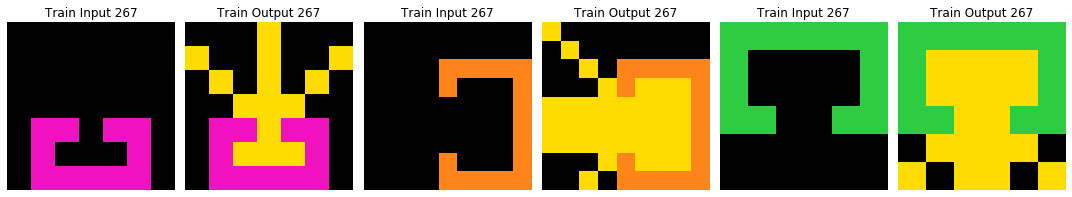

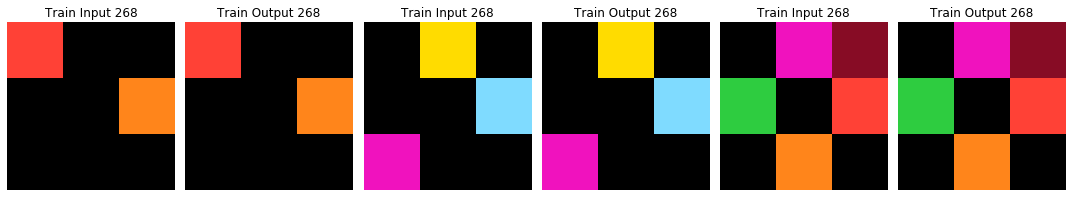

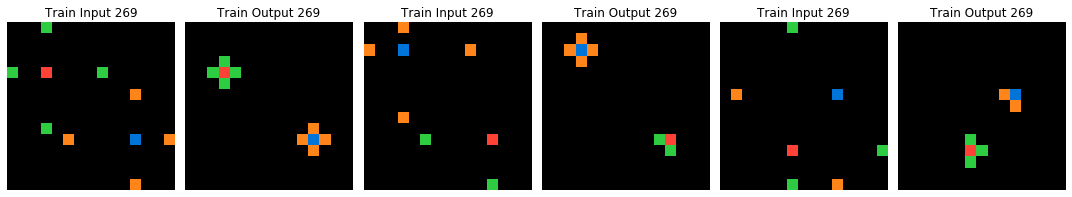

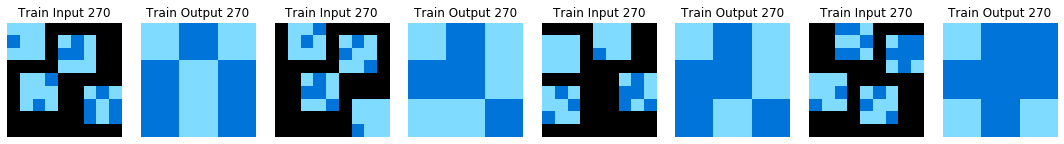

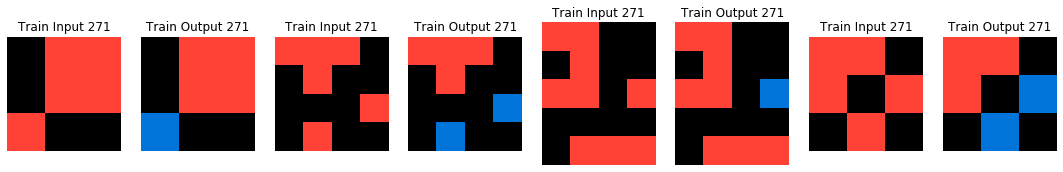

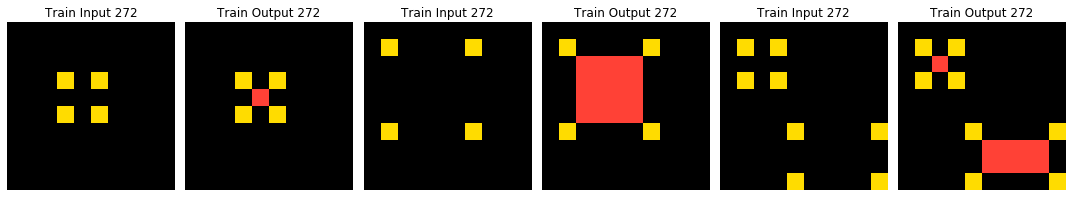

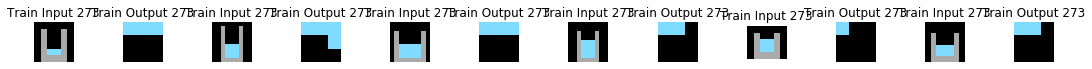

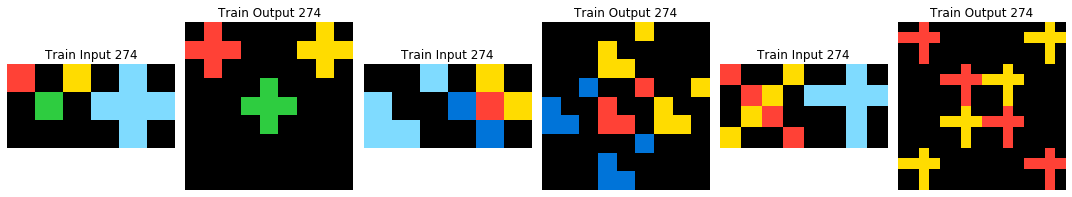

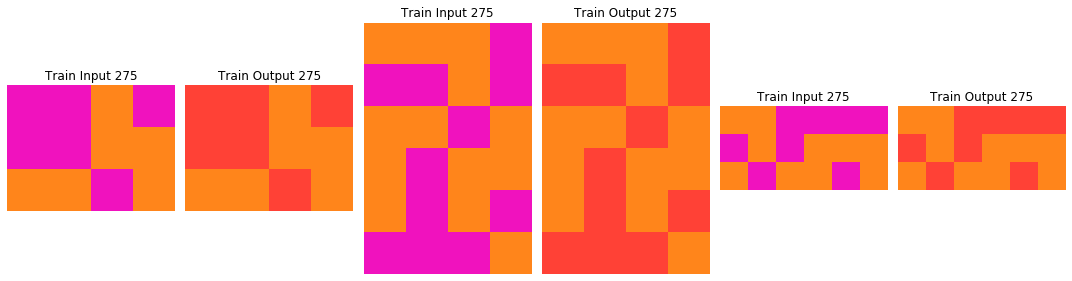

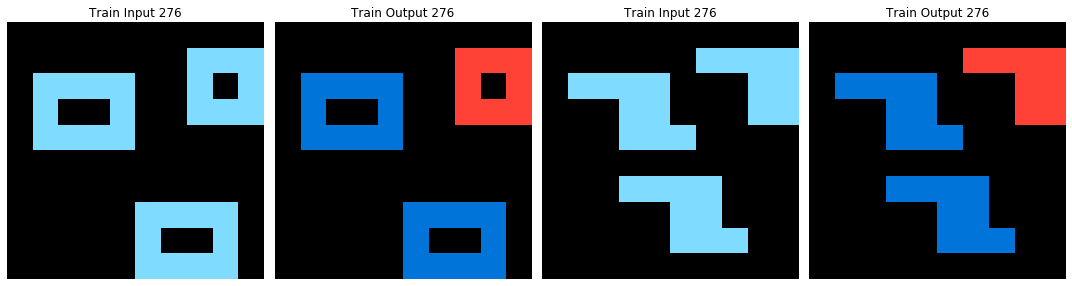

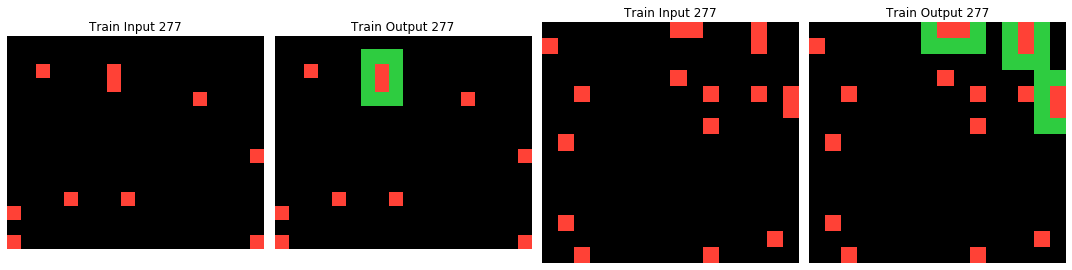

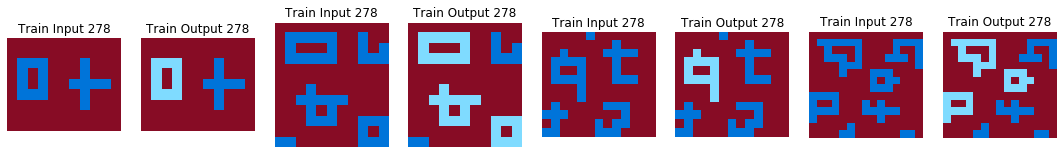

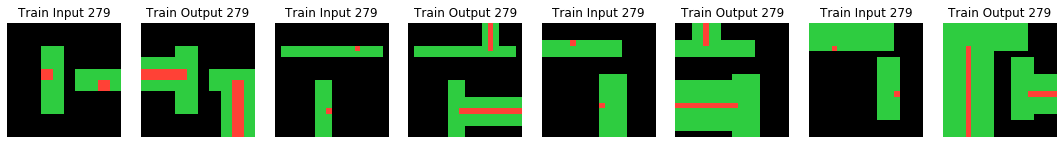

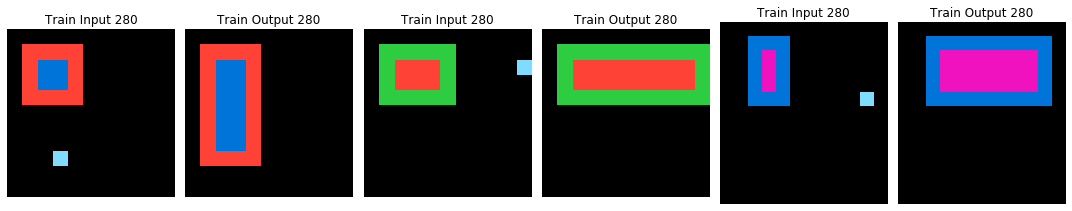

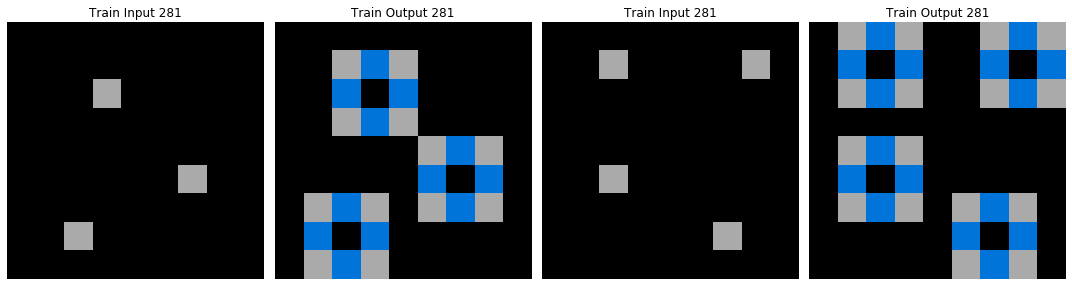

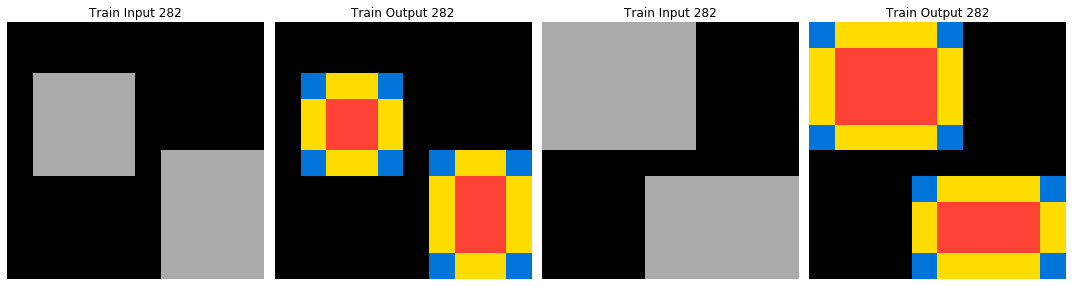

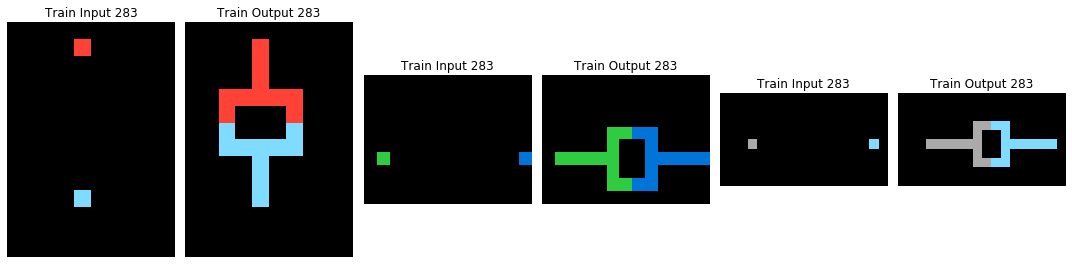

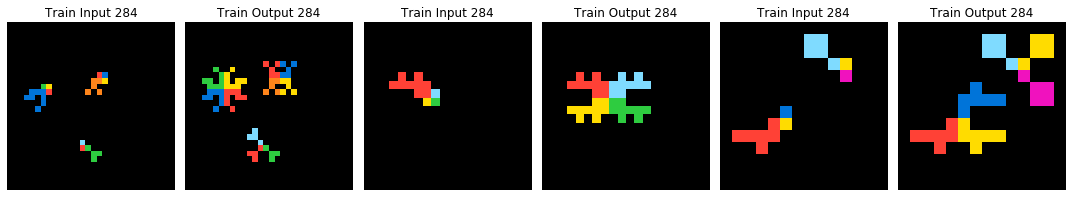

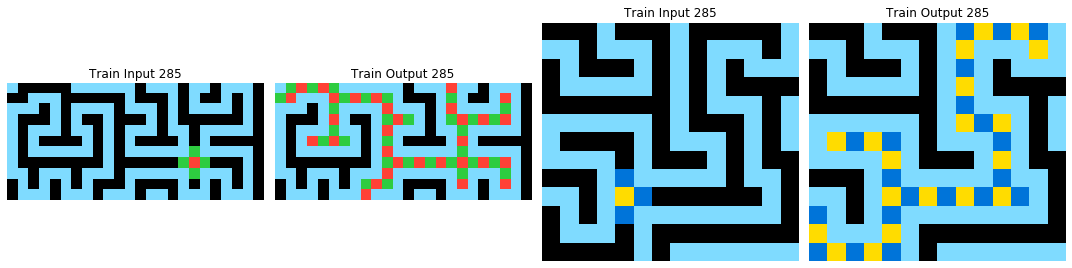

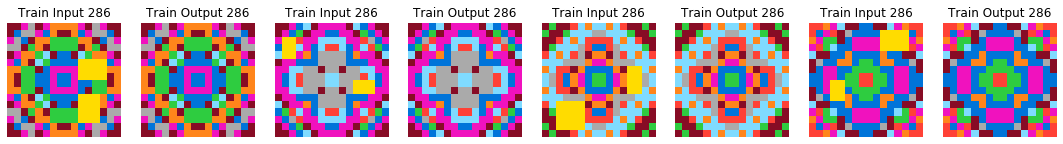

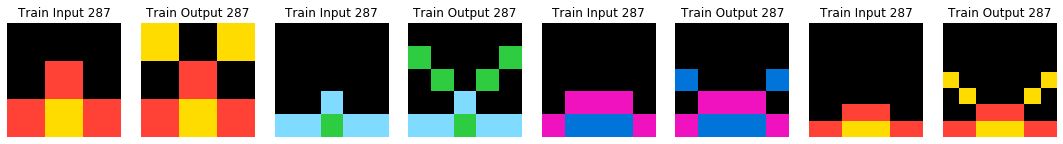

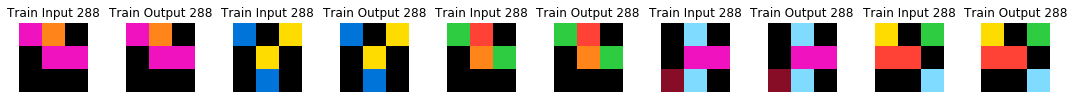

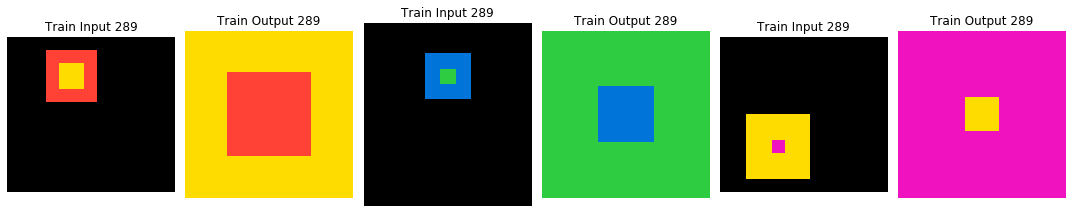

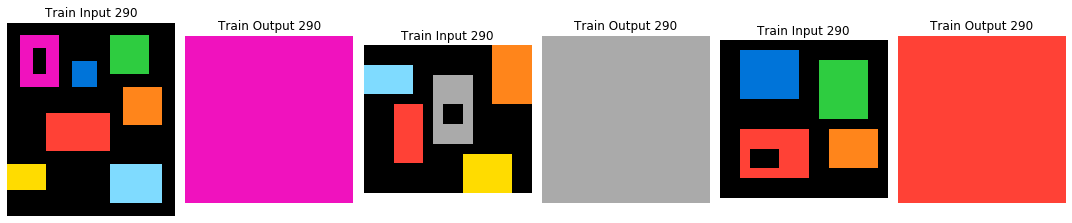

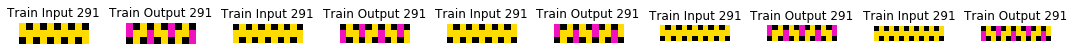

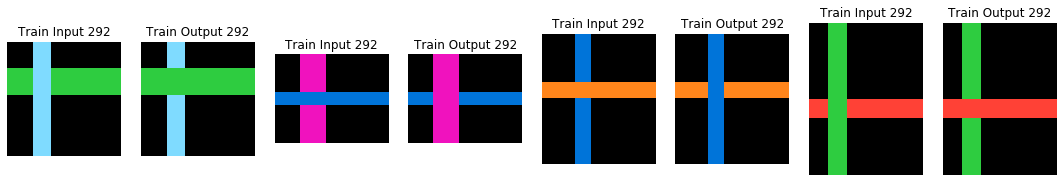

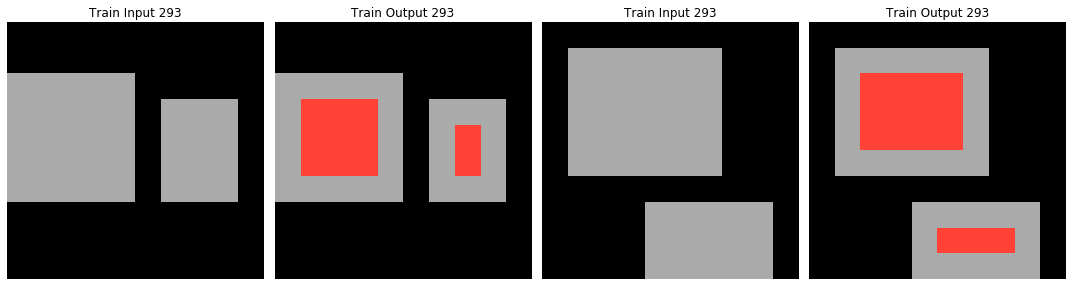

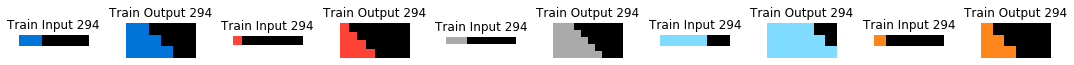

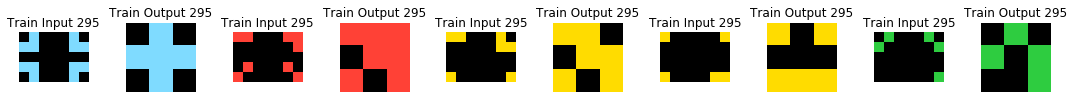

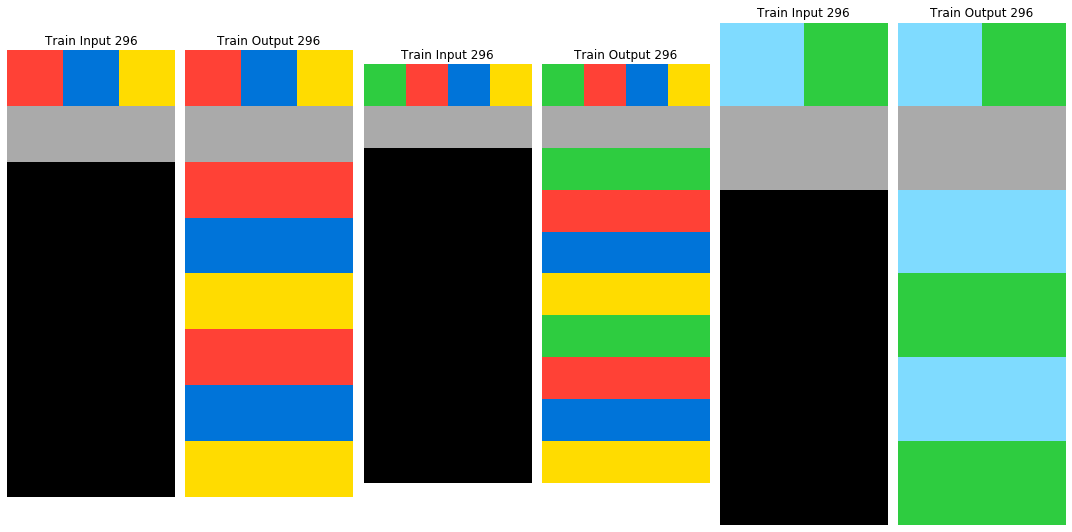

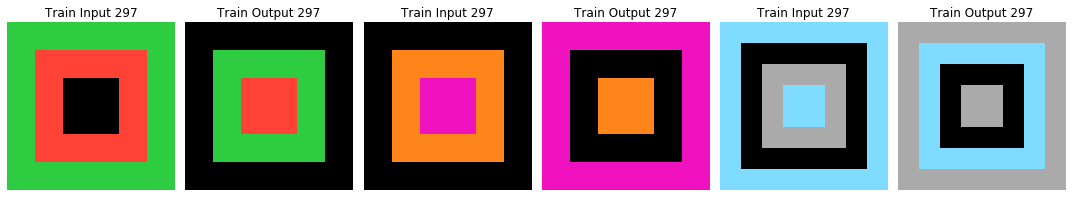

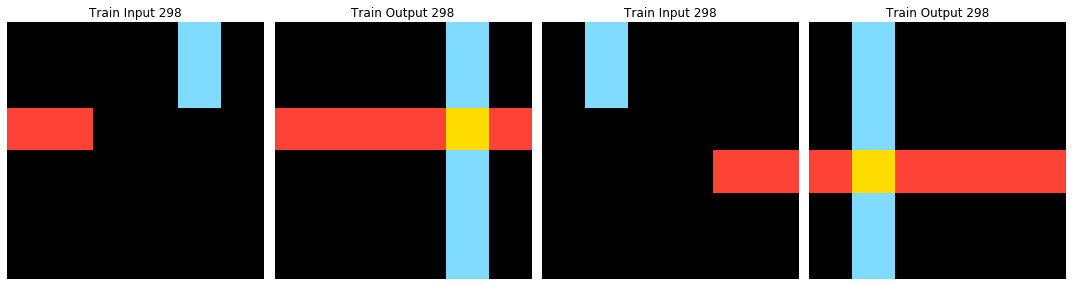

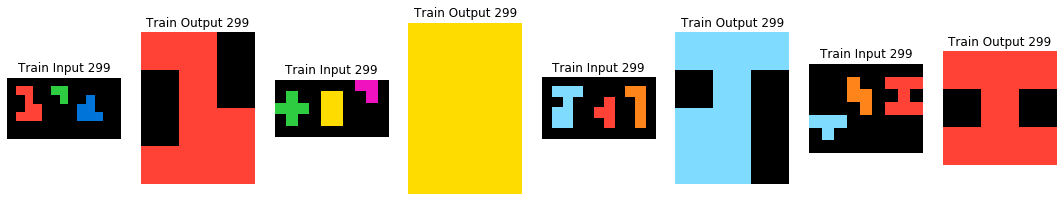

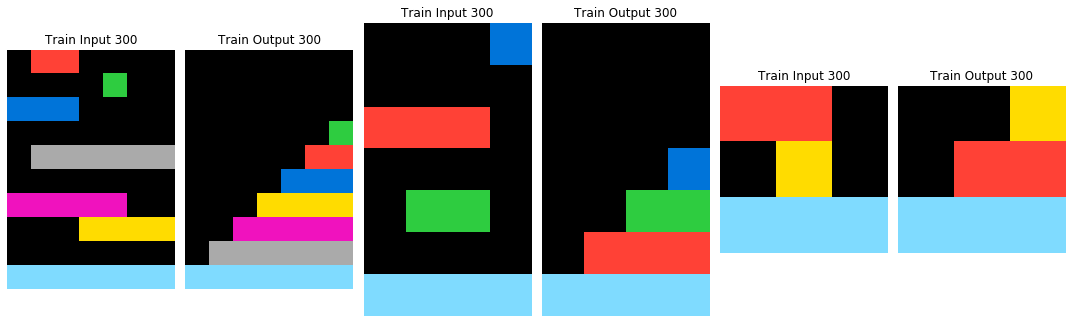

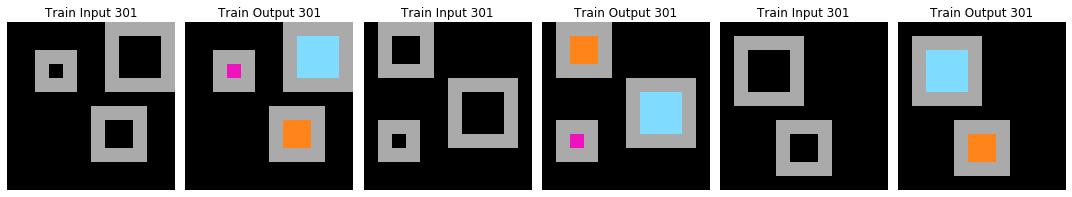

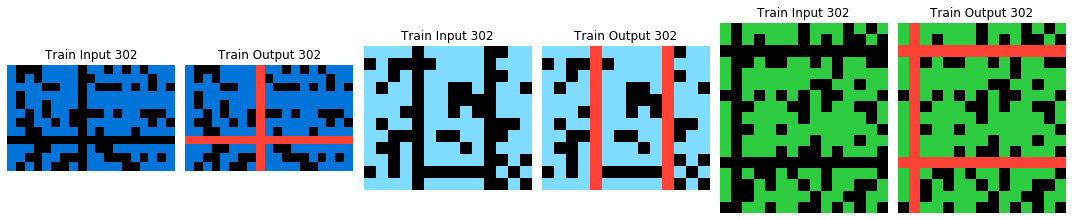

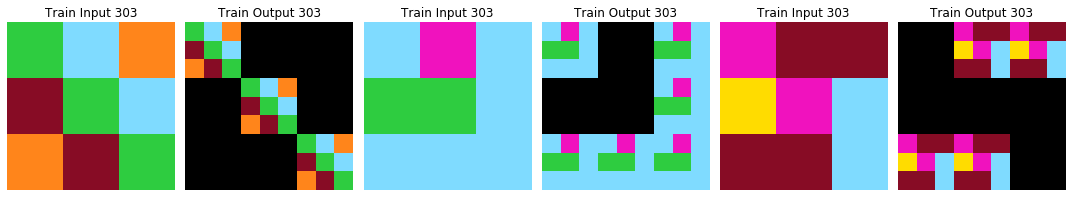

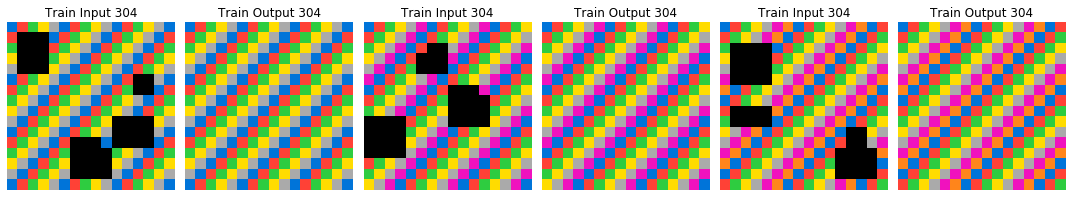

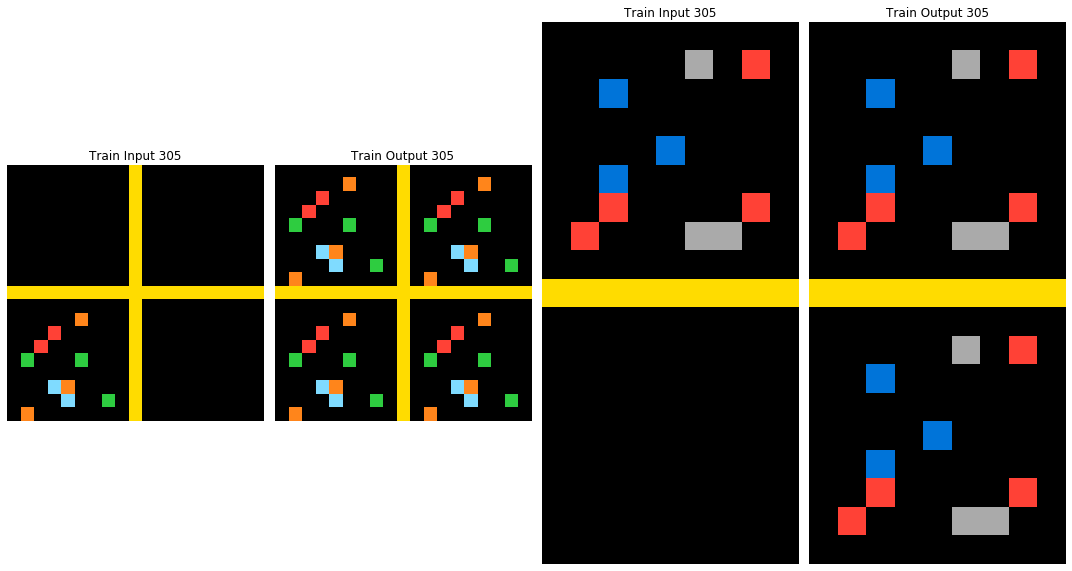

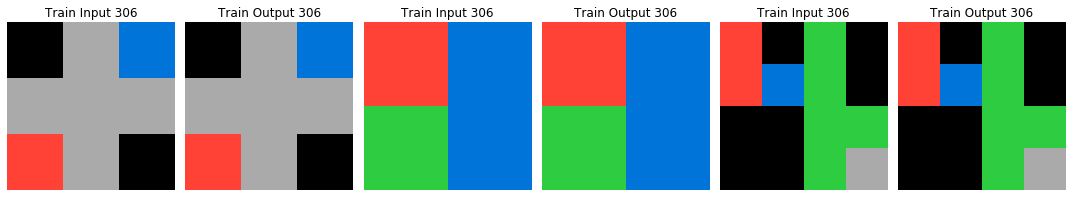

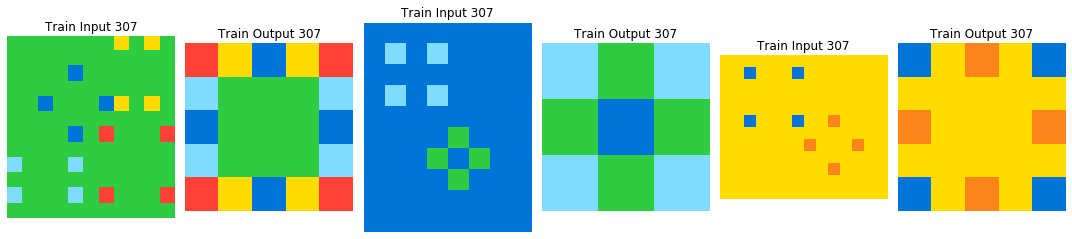

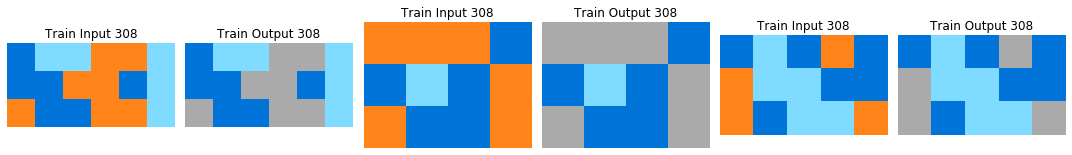

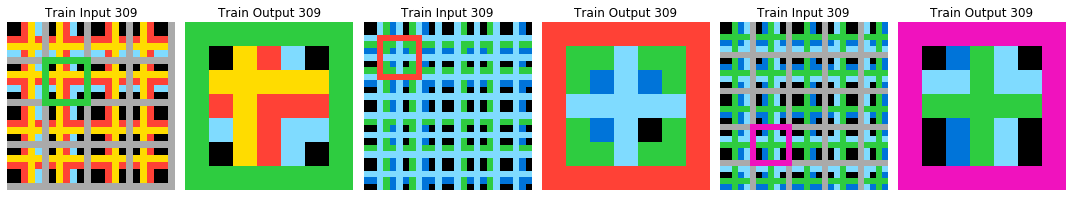

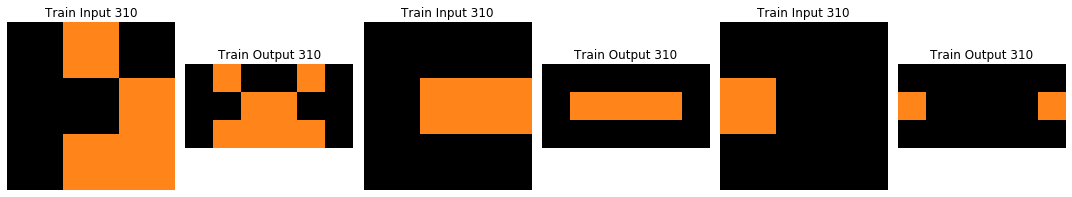

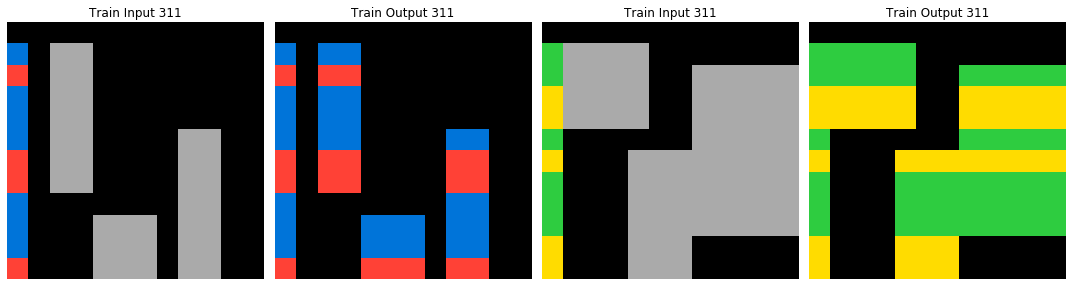

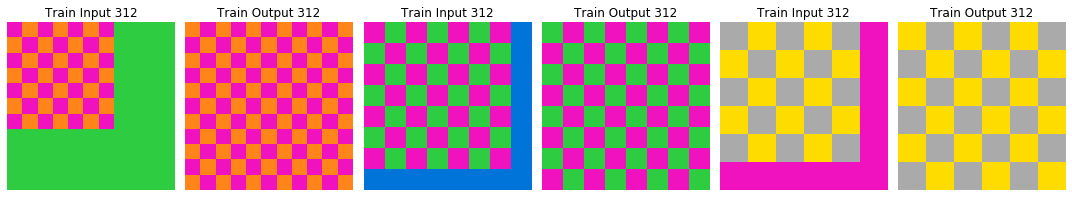

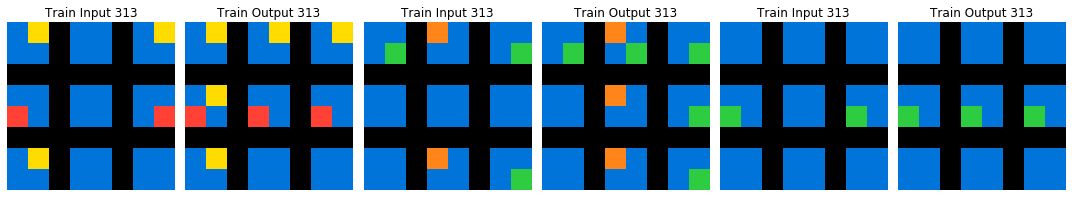

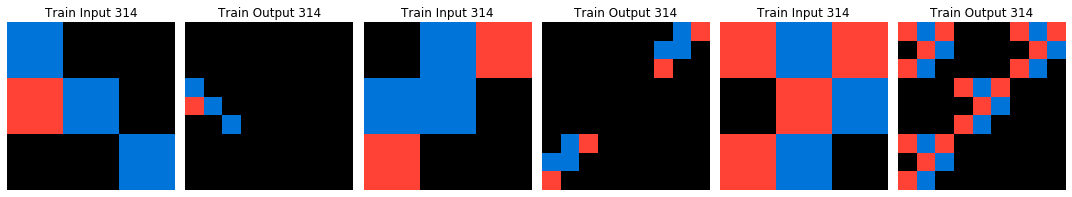

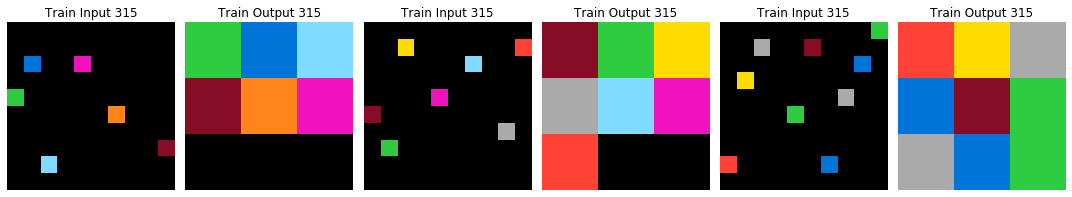

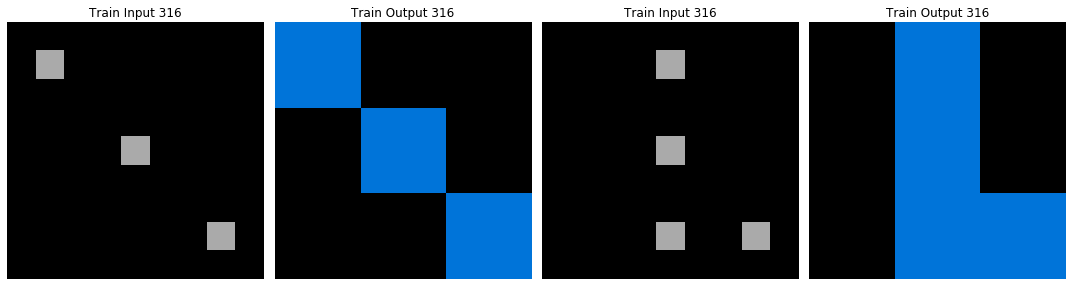

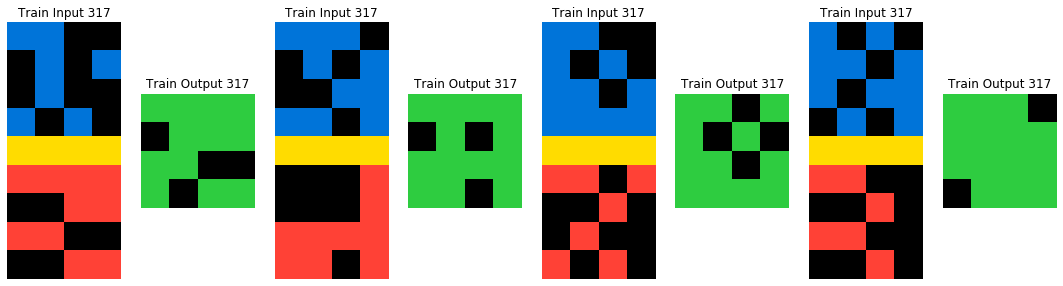

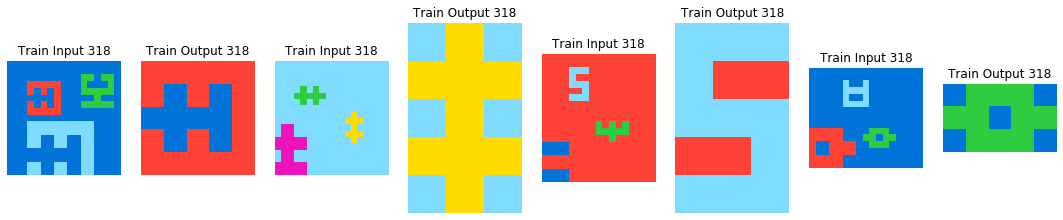

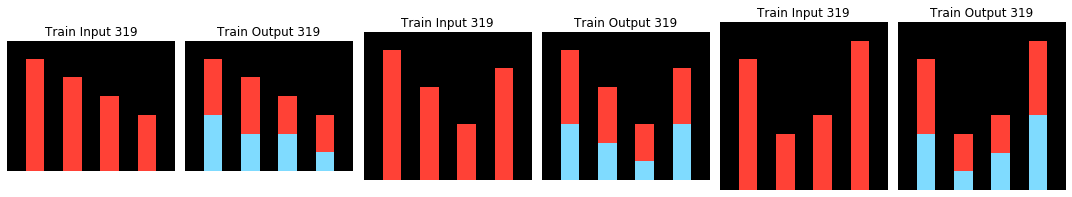

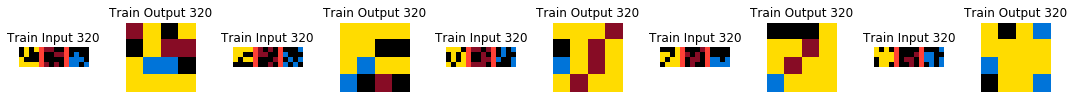

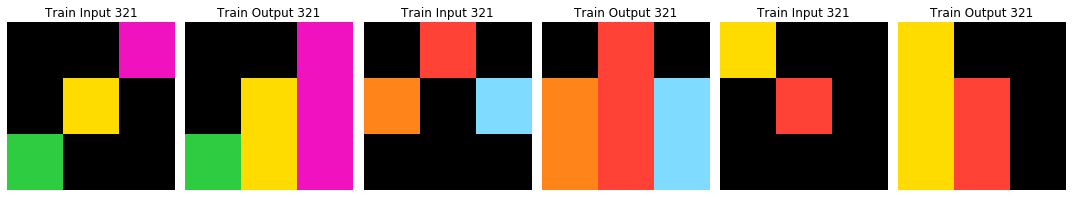

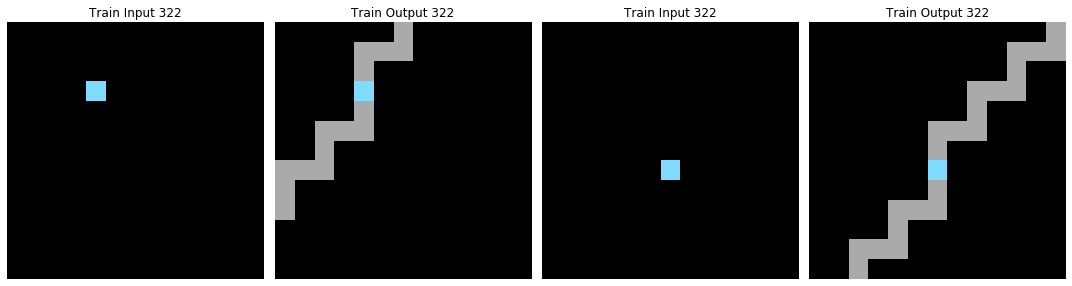

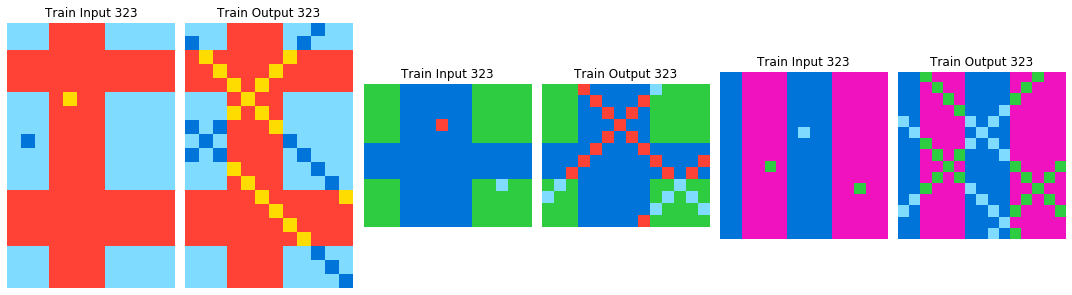

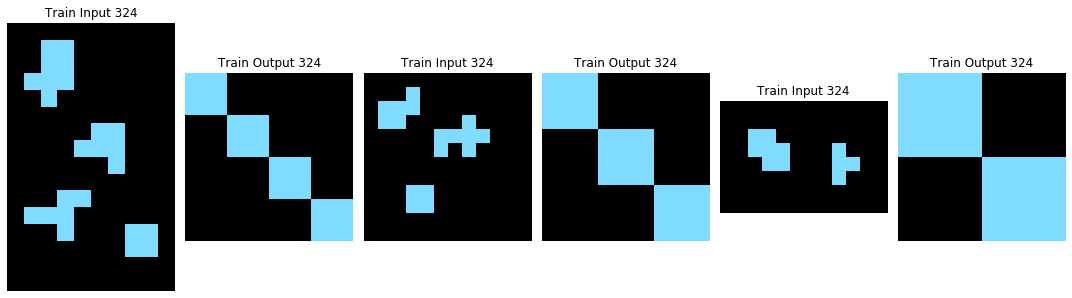

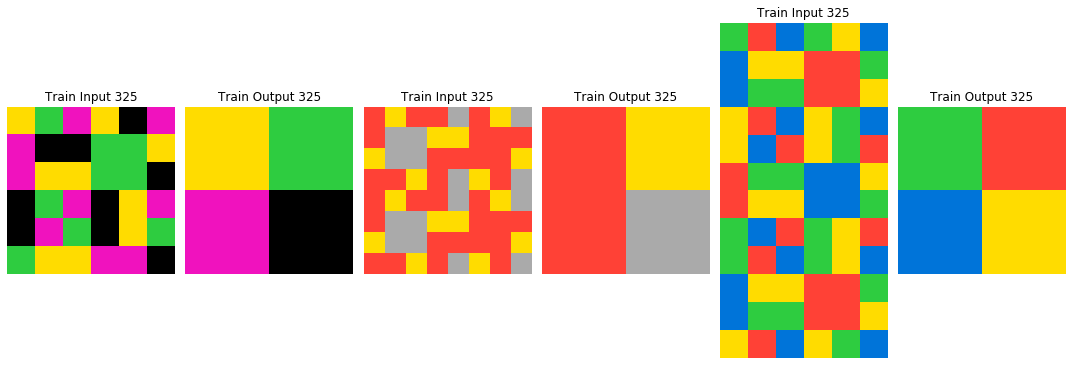

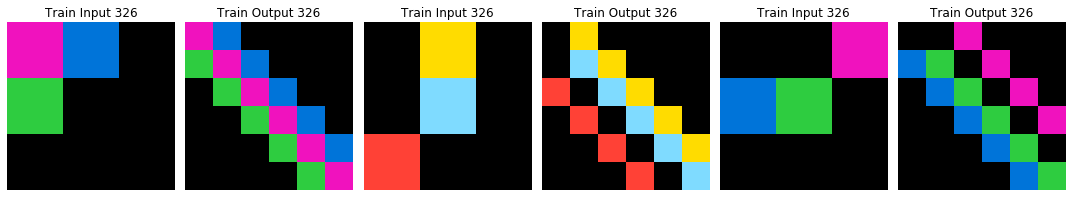

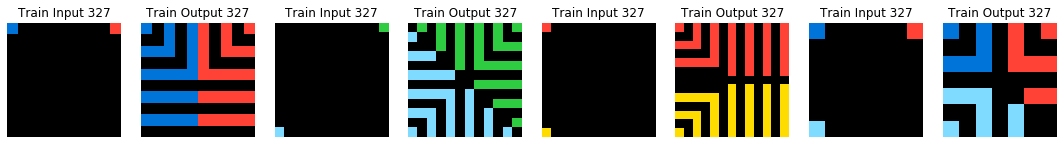

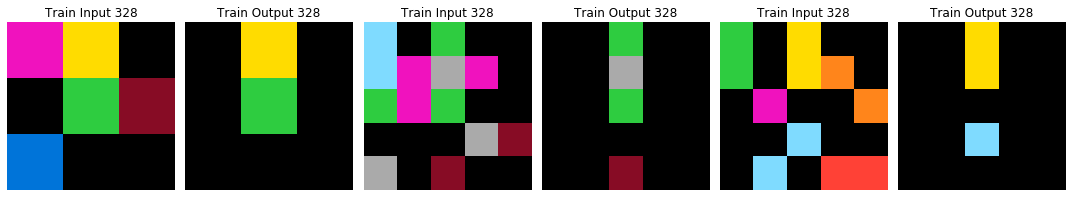

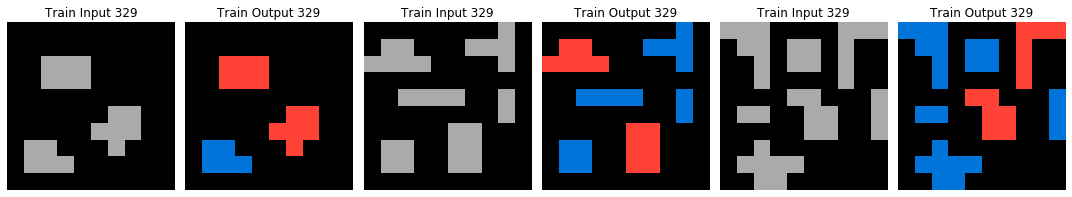

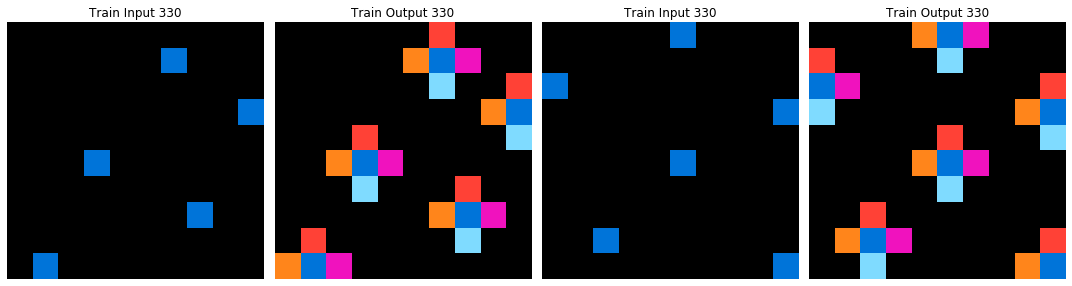

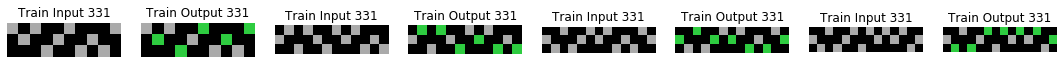

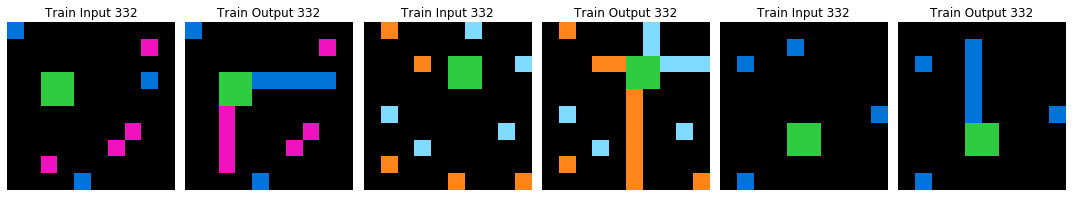

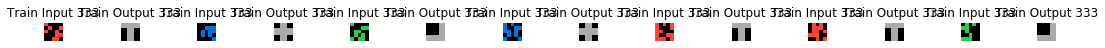

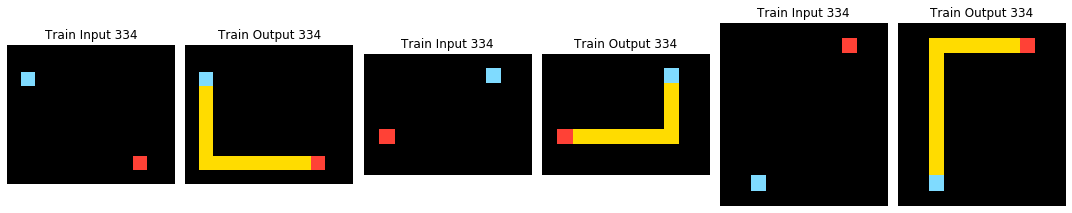

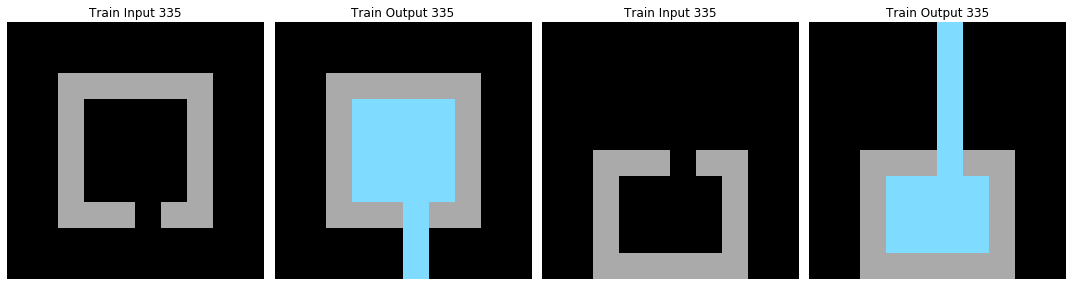

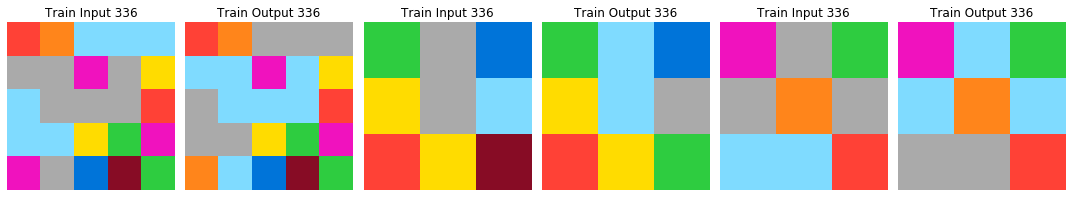

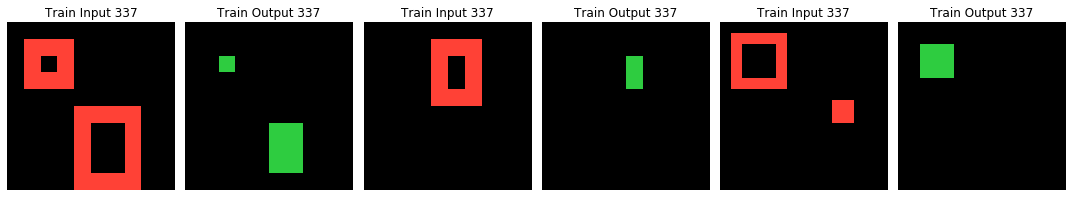

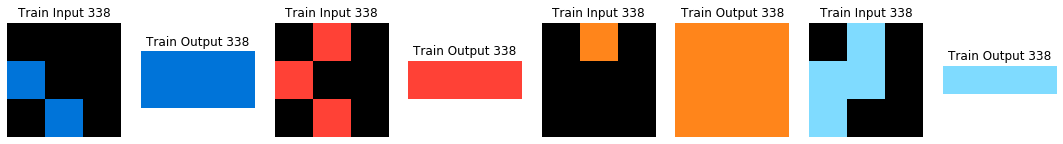

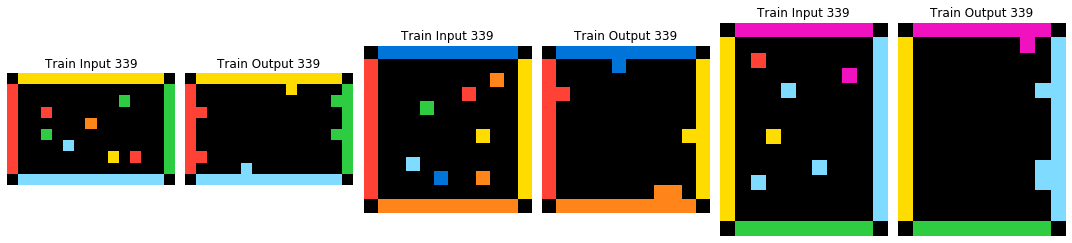

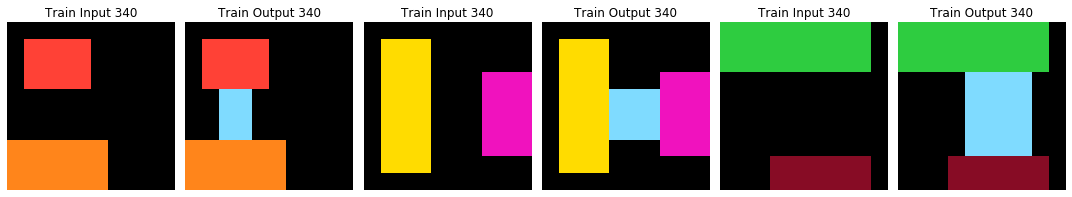

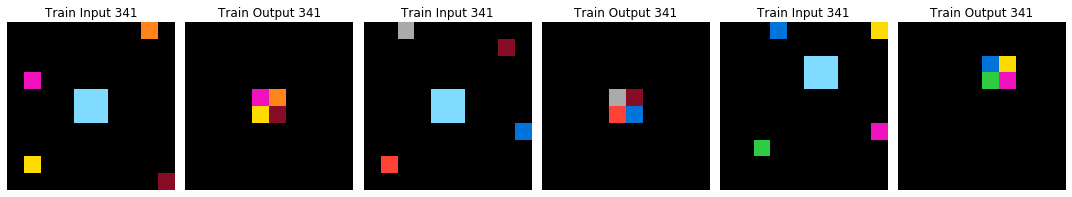

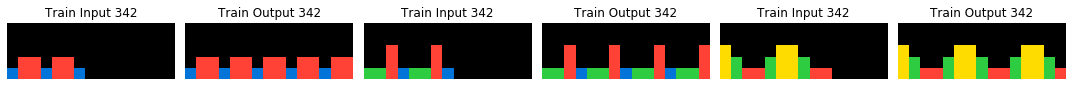

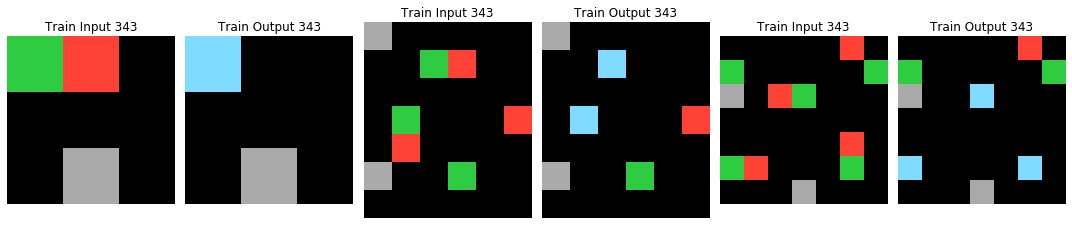

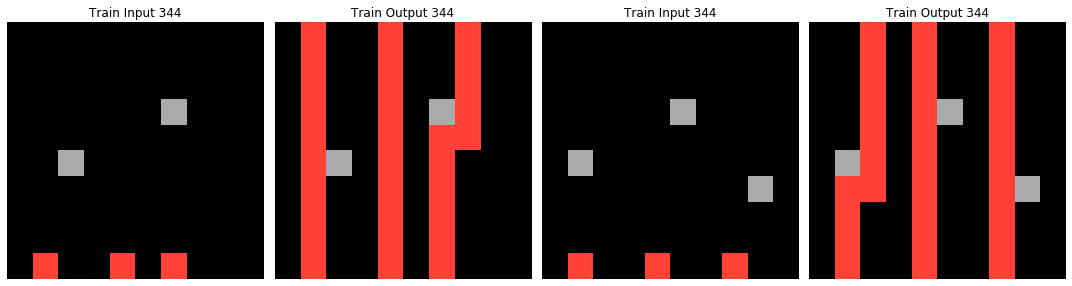

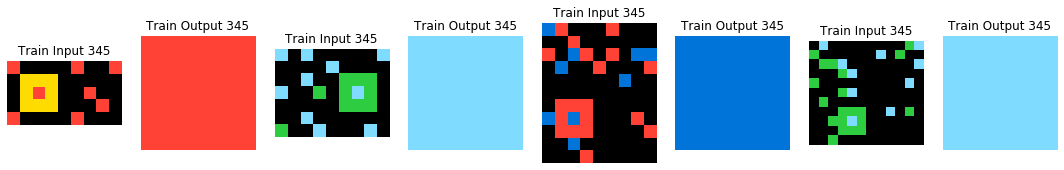

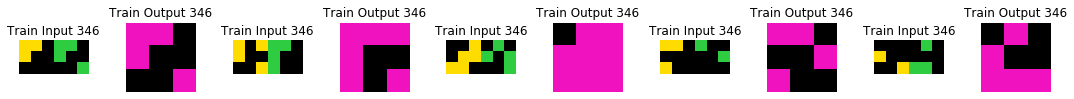

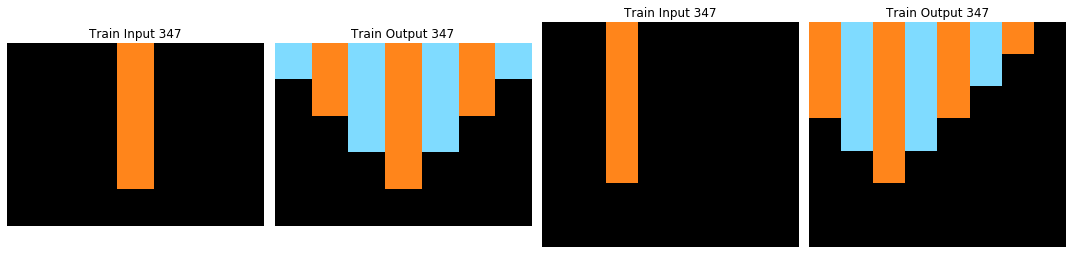

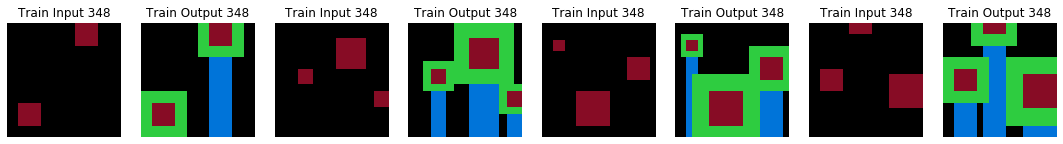

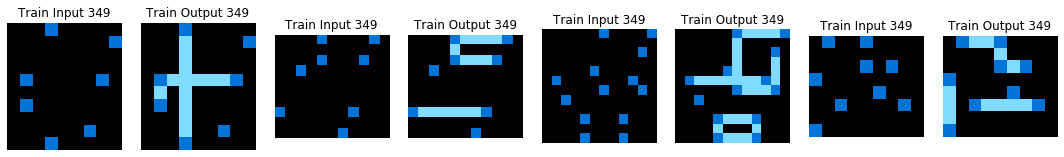

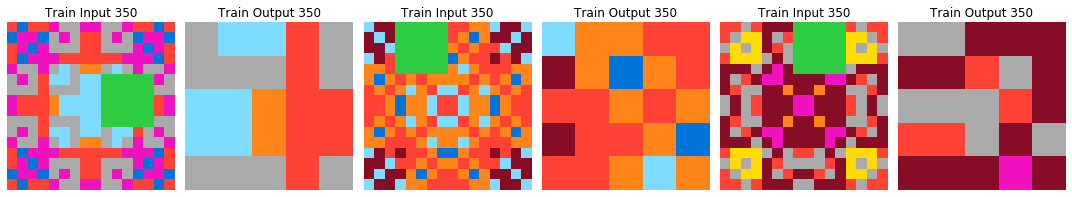

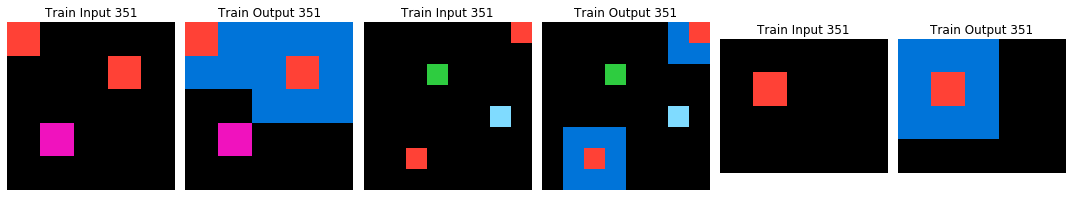

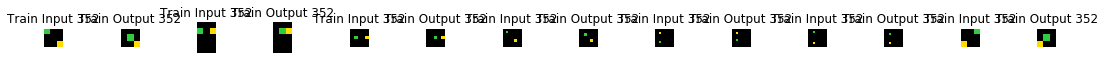

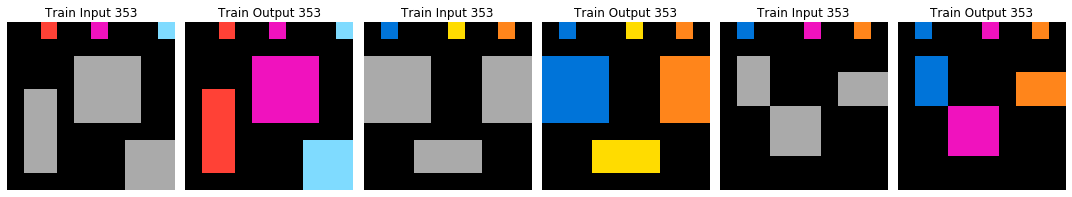

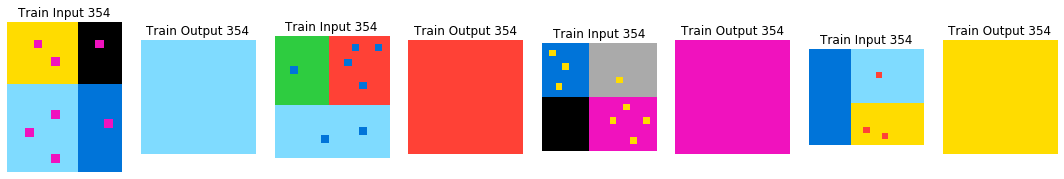

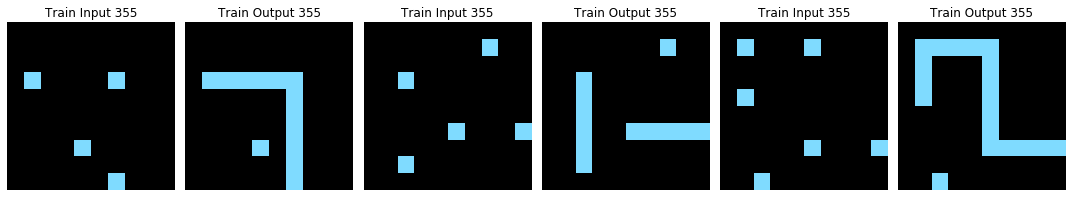

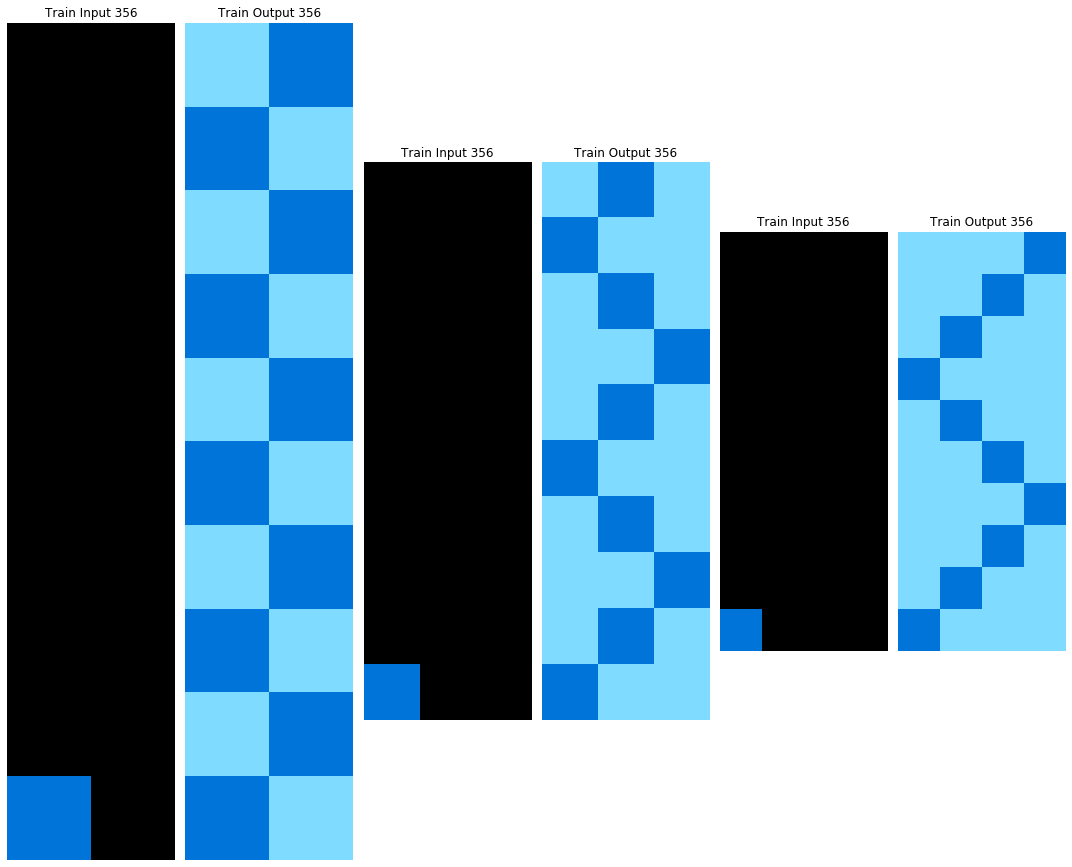

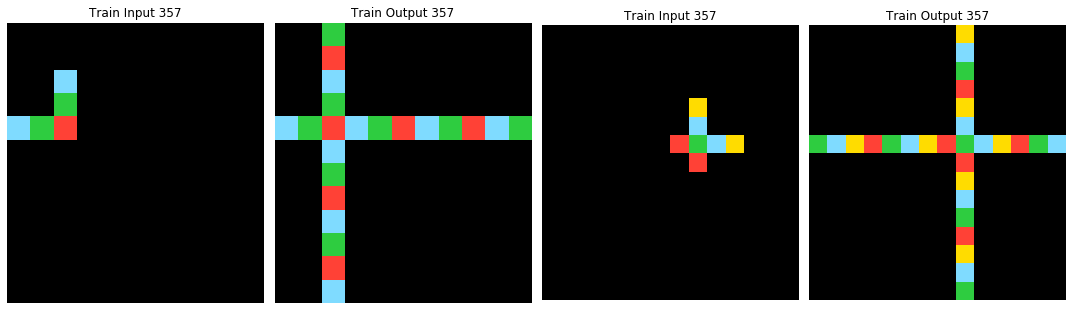

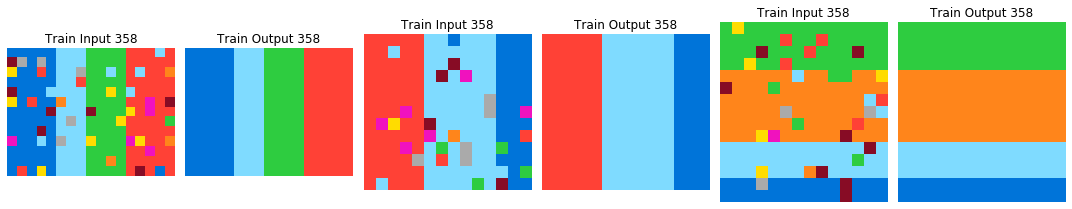

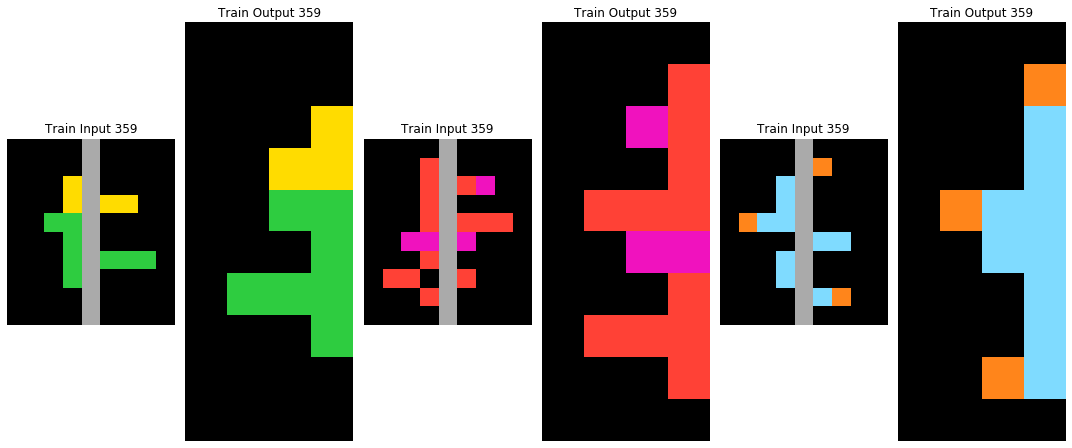

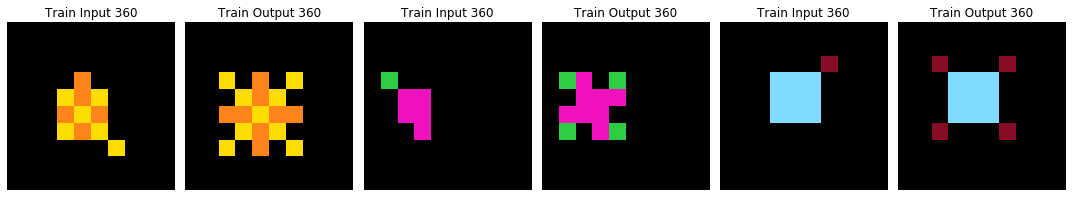

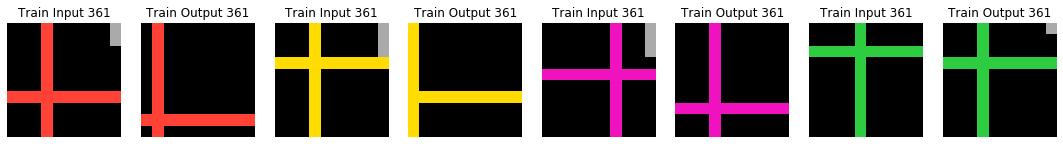

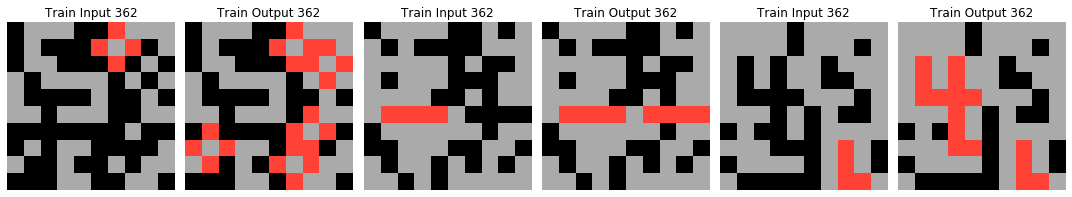

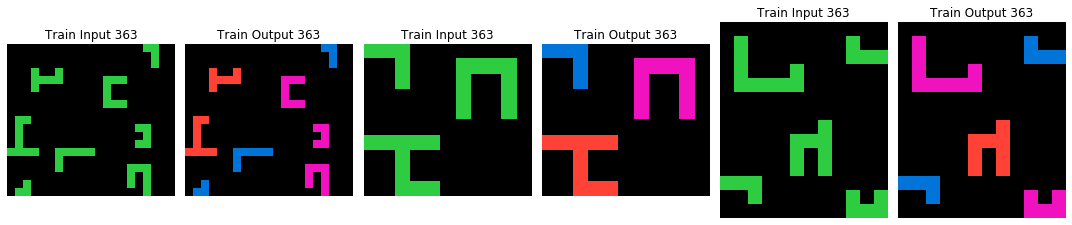

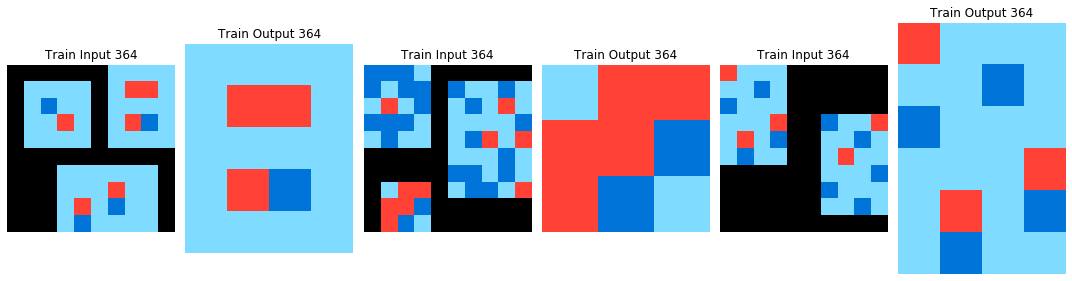

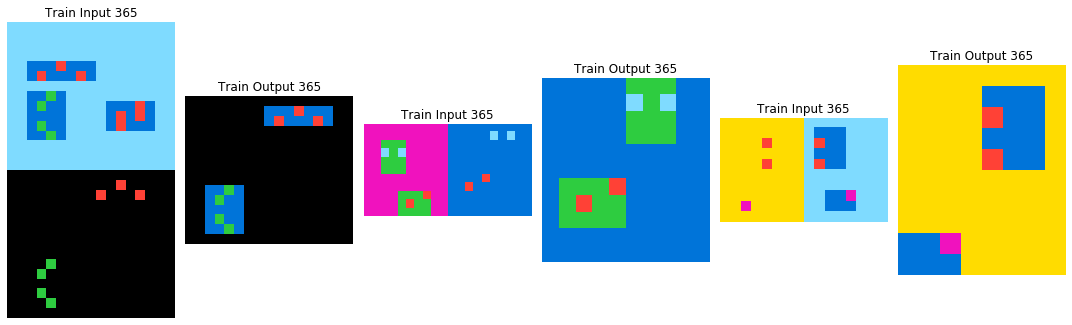

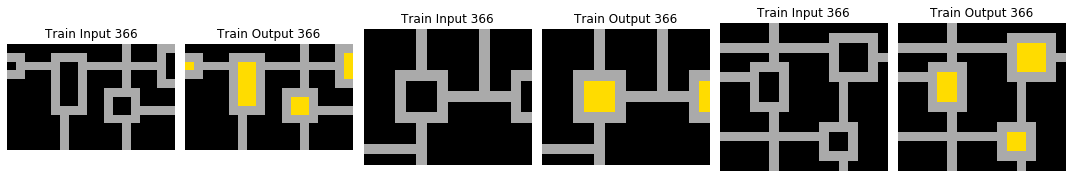

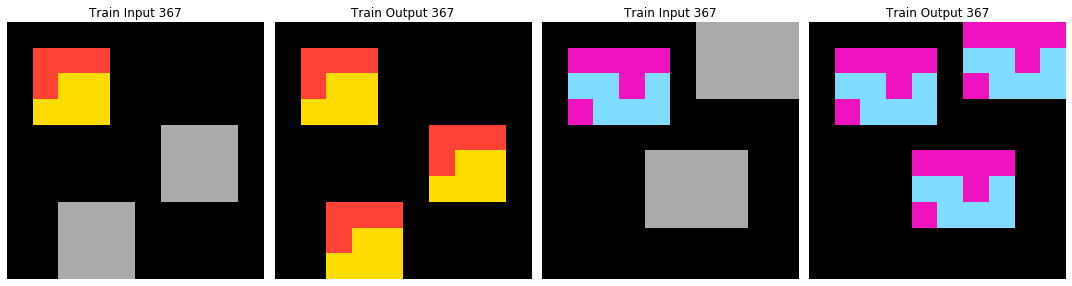

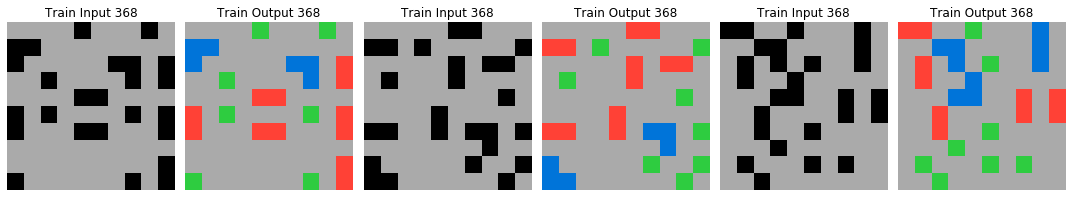

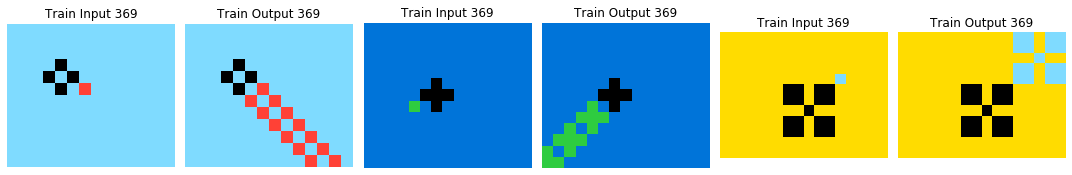

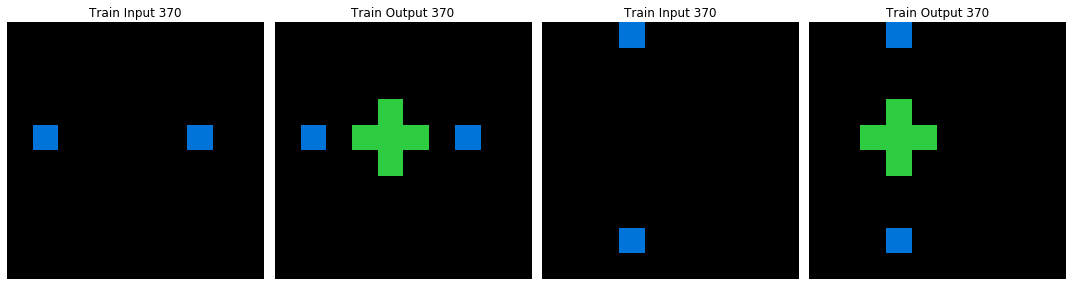

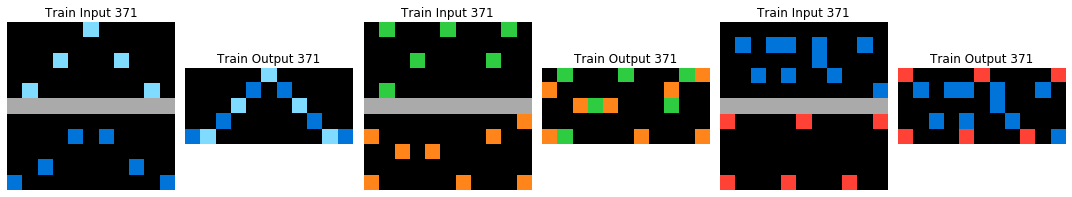

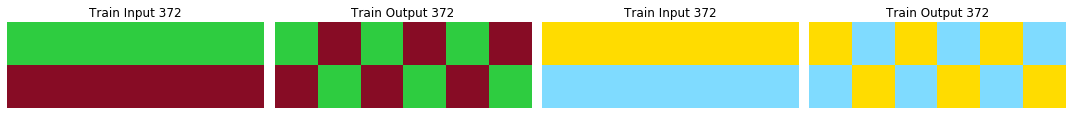

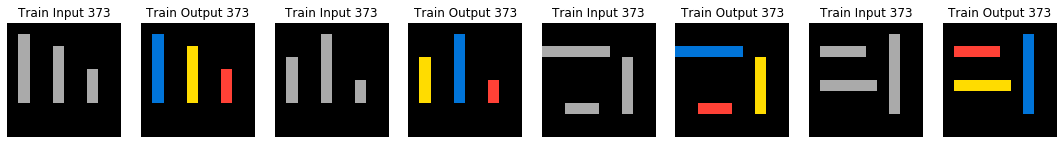

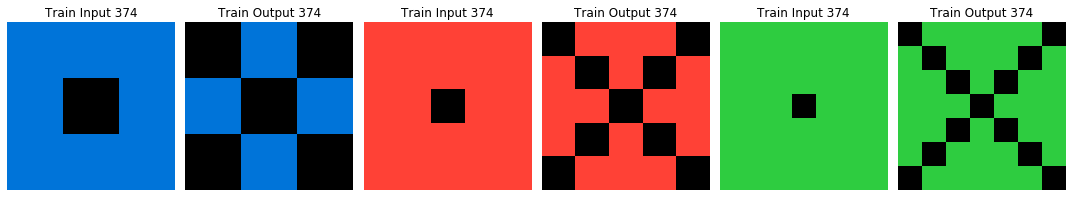

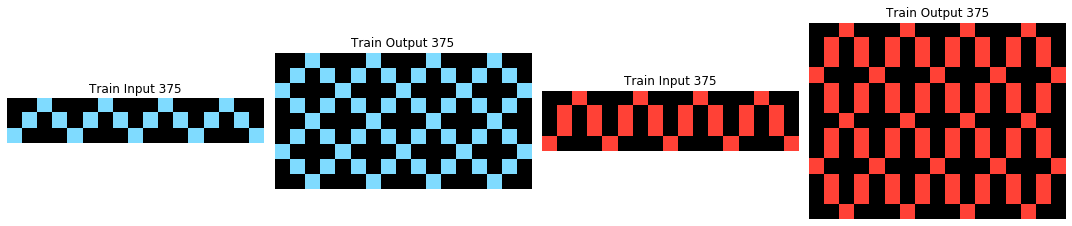

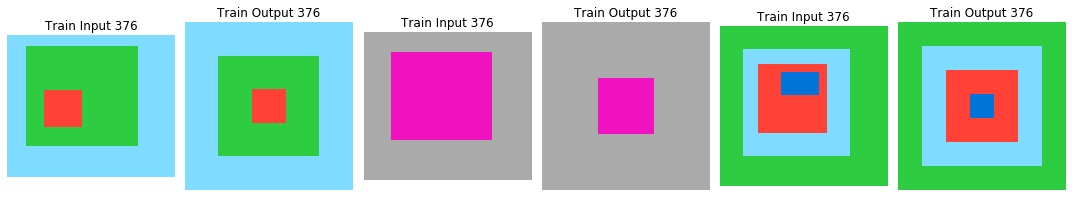

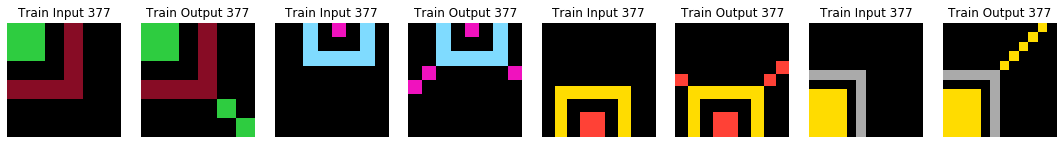

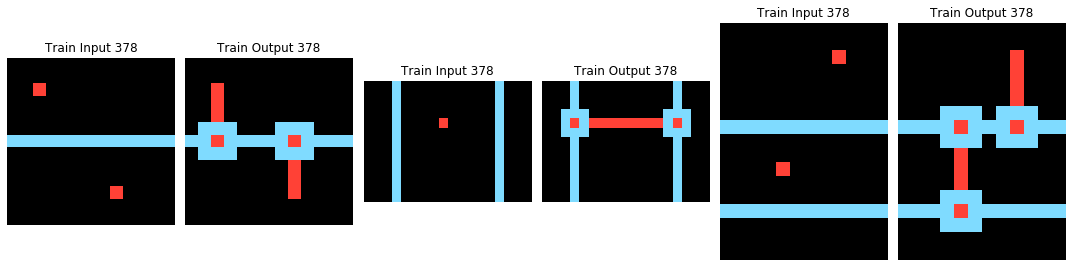

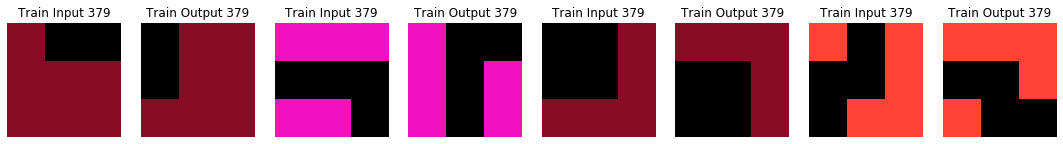

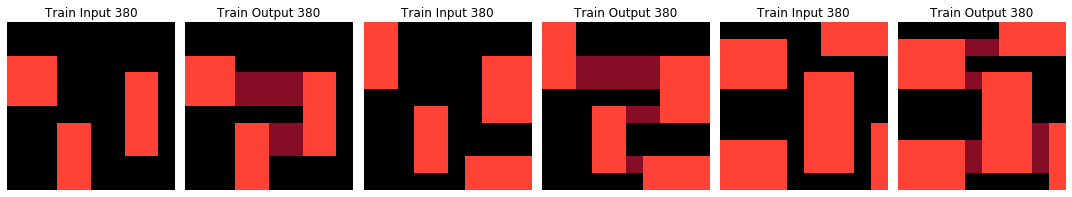

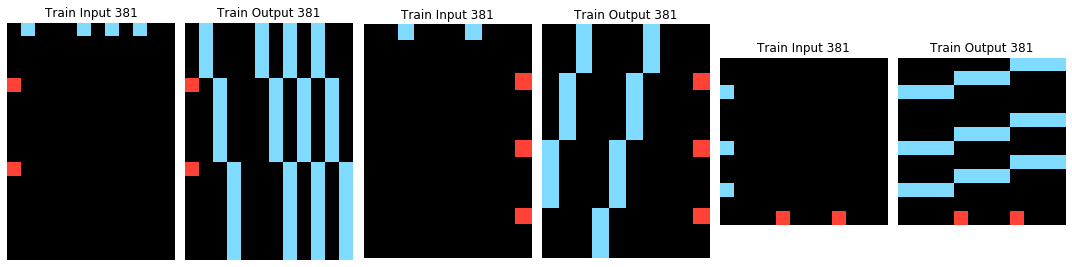

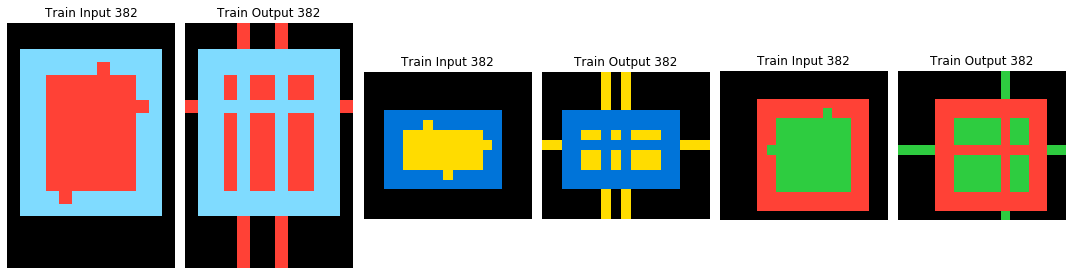

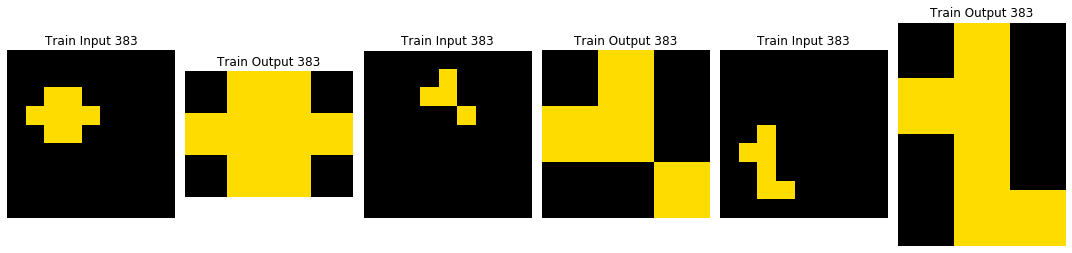

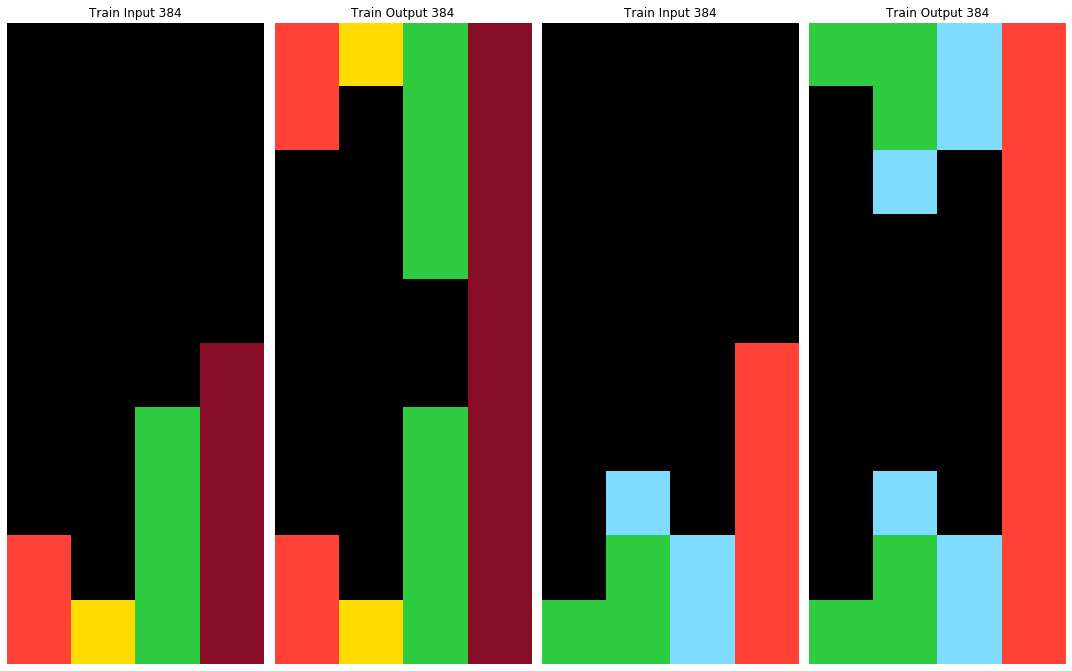

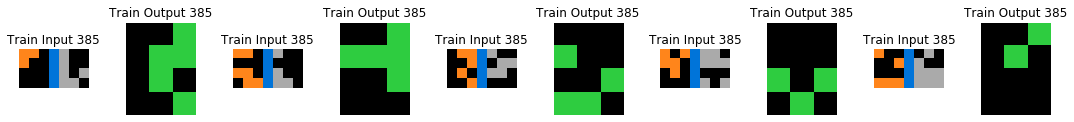

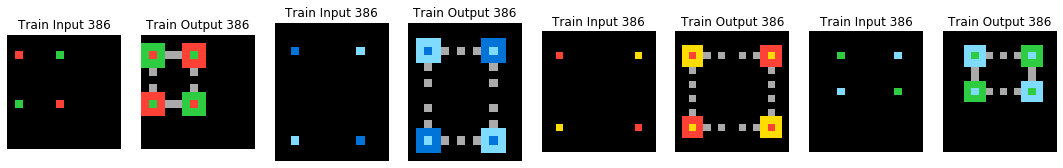

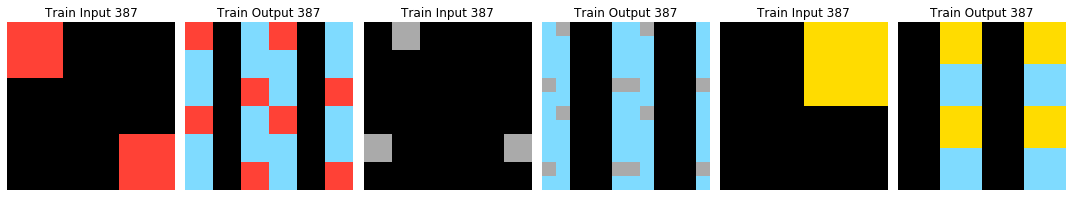

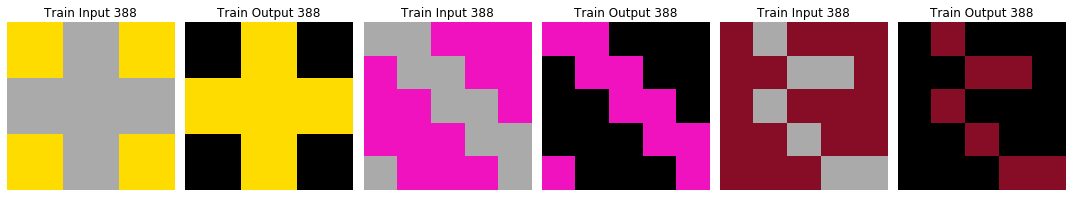

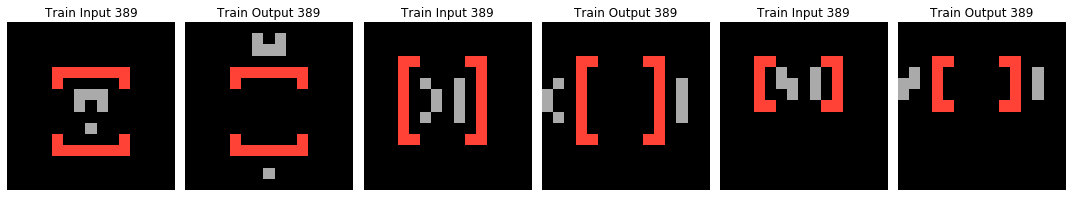

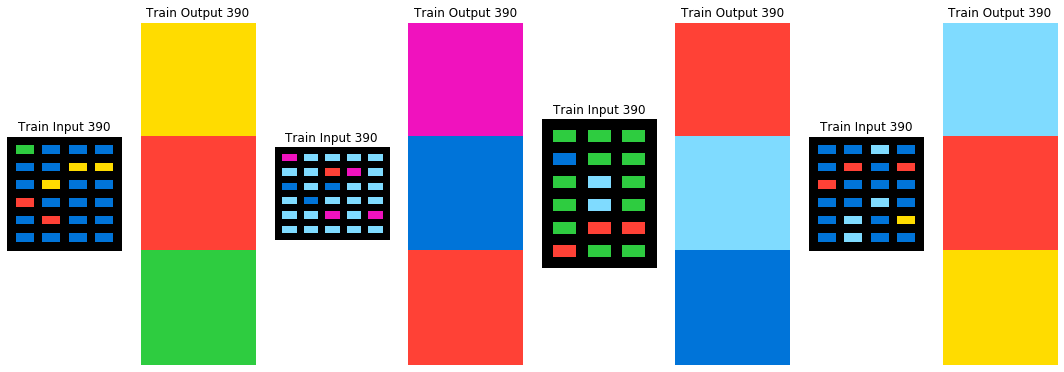

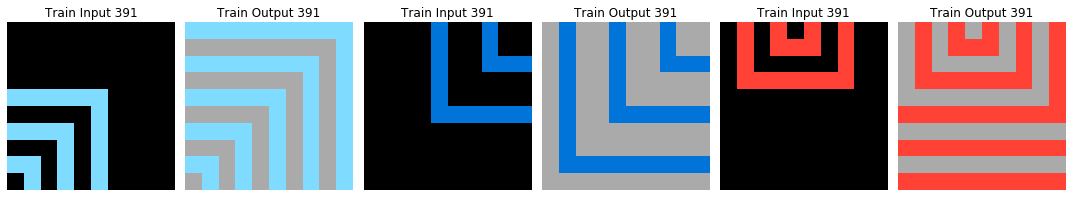

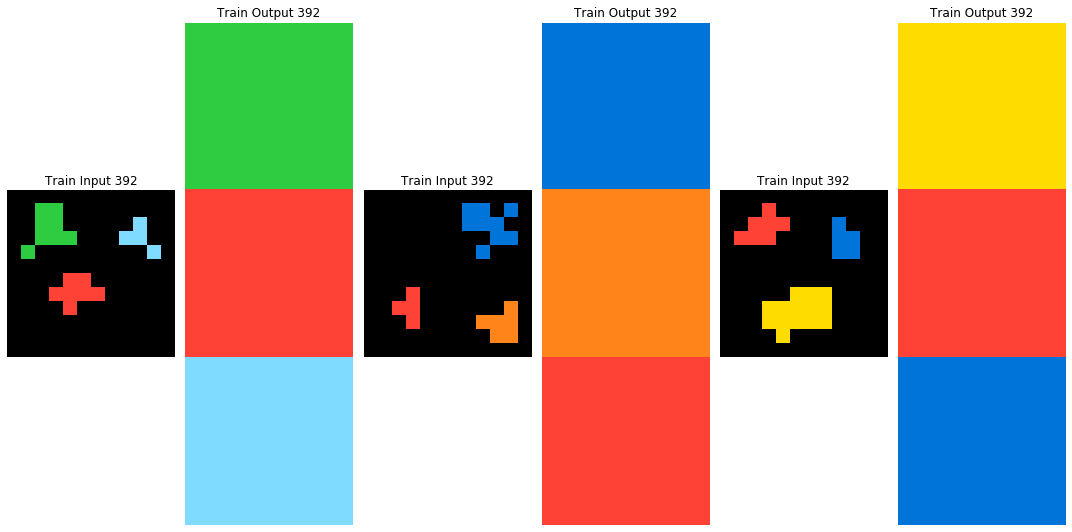

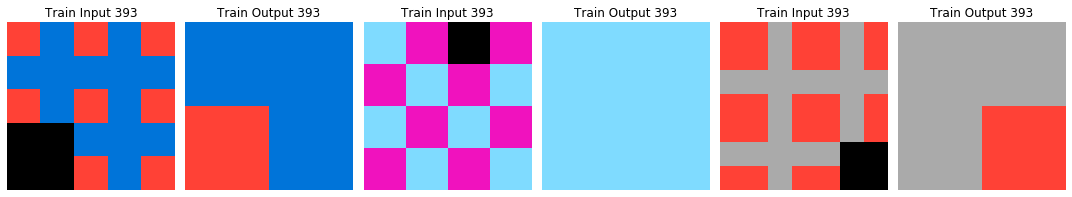

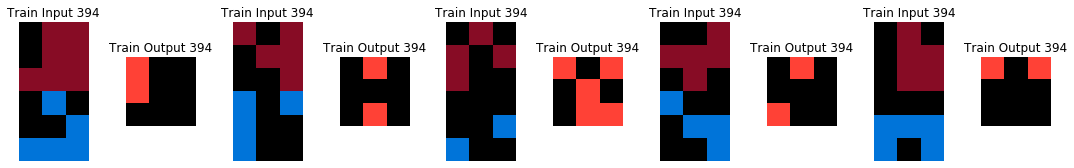

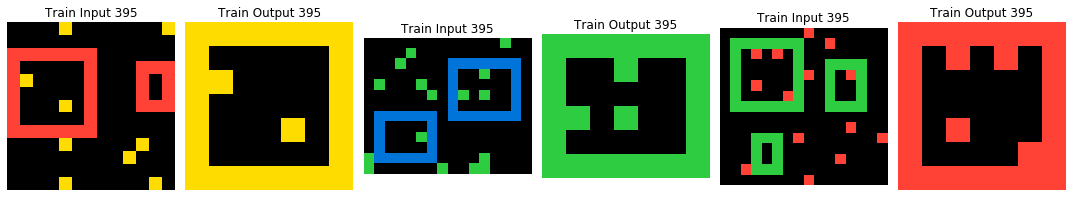

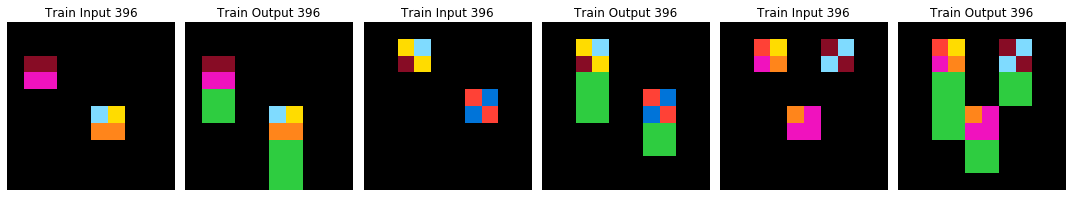

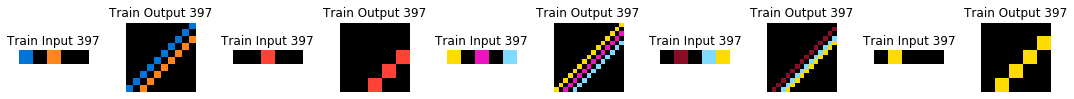

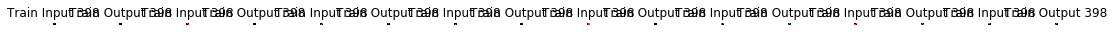

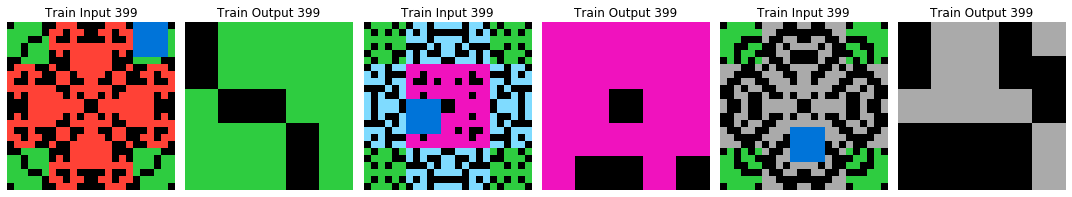

In [7]:
def plot_task(task, num=0):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25', '#ffffff'])
    norm = colors.Normalize(vmin=0, vmax=10)
    train_len = len(task['train'])
    fig, axs = plt.subplots(1, 2*train_len, figsize=(15,15))
    # print(len(task['train']))
    for i in range(train_len):
        axs[0+2*i].imshow(task['train'][i]['input'], cmap=cmap, norm=norm)
        axs[0+2*i].axis('off')
        axs[0+2*i].set_title(f'Train Input {num}')
        axs[1+2*i].imshow(task['train'][i]['output'], cmap=cmap, norm=norm)
        axs[1+2*i].axis('off')
        axs[1+2*i].set_title(f'Train Output {num}')
    plt.tight_layout()
    plt.show()

for i, filename in enumerate(os.listdir('training/')):
    with open('training/' + filename) as f:
        task = json.load(f)
        plot_task(task, i)

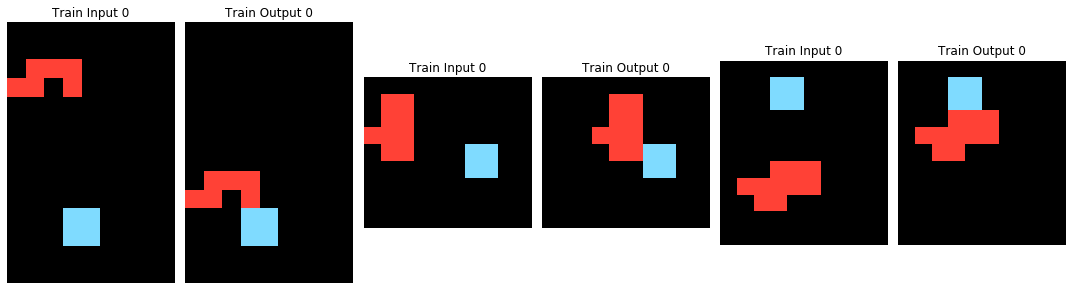

In [6]:
import numpy as np
import itertools
from collections import deque
import time

with open('training/' + os.listdir('training/')[7]) as f:
        case7 = json.load(f)
train1 = case7['train'][0]
inp = np.array(case7['train'][0]['input'])
out = np.array(case7['train'][0]['output'])
plot_task(case7)

In [122]:
grid = tuple((tuple(x) for x in case7['train'][0]['input']))
grid


((0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 2, 2, 2, 0, 0, 0, 0, 0),
 (2, 2, 0, 2, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 8, 8, 0, 0, 0, 0),
 (0, 0, 0, 8, 8, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0))

In [45]:
my_dict = {(0,1): 2, (1,2): 3}
set(my_dict.keys())

{(0, 1), (1, 2)}

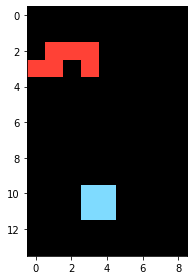

In [46]:
def display_case(grid):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25', '#ffffff'])
    norm = colors.Normalize(vmin=0, vmax=10)
    fig, axs = plt.subplots(1, figsize=(4, 4))
    axs.imshow(grid, cmap=cmap, norm=norm)
    plt.tight_layout()
    plt.show()

display_case(np.array(case7['train'][0]['input']))

In [101]:
class Entity:
    """
    Properties: 
        boundary = (\pm 1, \pm 1) or None
        colors = subset of range(10)
        group = D4, Z4, Z2, Z2xZ2
        representation = 
    """
    
    def __init__(self, positions, grid):
        self.positions = positions
        self.grid = grid
            
    def __repr__(self):
        return f'Entity({self.positions})'
    
    def copy(self):
        return self.__class__(self.positions)
    
    def colors(self):
        return frozenset(self.positions.values())
        
    def min_coord(self, axis = 0):
        return min([key[axis] for key in self.positions.keys()])
    
    def max_coord(self, axis = 0):
        return max([key[axis] for key in self.positions.keys()])
    
    def center(self, axis=0):
        return (self.min_coord(axis) + self.max_coord(axis)) / 2.
    
    def num_points(self):
        return len(self.positions)
    
    def symmetry_group(self):
        pass
    
    def display(self, grid):
        new_grid = grid.copy()
        for i, j in itertools.product(range(grid.shape[0]), range(grid.shape[1])):
            if (i,j) not in set(self.positions):
                new_grid[i,j] = 10
        display_case(new_grid)
    
# def move(entity, horiz, vert, change_grid=False):
#     new_entity = entity.copy()
#     new_entity['positions'] = {(i+horiz,j+vert): val  for (i, j), val in entity['positions'].items()}
#     return new_entity

    
# def generate_relations(entity1, entity2):
#     relations = set()
#     shifted1 = move(entity1, entity1.min_coord(0), entity1.min_coord(1))
#     shifted2 = move(entity1, entity2.min_coord(0), entity2.min_coord(1))
#     for axis in range(2):
#         if entity1.min_coord(axis=axis) == entity2.min_coord(axis=axis):
#             relations.add(f'same_min{axis}')
#         if entity1.max_coord(axis=axis) == entity2.max_coord(axis=axis):
#             relations.add(f'same_max{axis}')
#         if entity1.center(axis=axis) == entity2.center(axis=axis):
#             relations.add(f'same_center{axis}')
#         if not(entity1.max_coord(axis=axis) < entity2.min_coord(axis=axis) or entity1.min_coord(axis=axis) > entity2.max_coord(axis=axis)):
#             relations.add(f'overlap{axis}')
#     if entity1.colors == entity2.colors:
#         relations.add(f'same_colors')
#     if entity1.positions == entity2.positions:
#         relations.add(f'exact_match')
#     if shifted1 == shifted2:
#         relations.add(f'translations')
#     if set(shifted1.positions) == set(shifted1.positions):
#         relations.add(f'same_shape')
#     else:
#         if set(entity1.positions).issubset(set(entity2.positions)):
#             relations.add(f'is_subset')
#         for i, j in itertools.product(range(entity2.min_coord(0), entity2.max_coord(0)+1), range(entity2.min_coord(1), entity2.max_coord(1)+1)):
#             if set(shifted1.positions).issubset(set(entity1.positions)(move(entity2, i, j).positions)):
#                 relations.add(f'is_shifted_subset')
                
#     if entity1.num_points() == entity2.num_points():
#         relations.add(f'same_size')
#     elif entity1.num_points() < entity2.num_points():
#         relations.add(f'smaller')
    

        
"""
Relations:
1) A and B are the same color -> B is A different color from all others
2) A can be moved to the right/left/up/down and collides with B
3) A is higher/more-left than B -> B is the rightmost/highest entity
4) A and B have the same shape (A and B are in the same location) -> B is differently shaped from all others
5) B is an extension of A
6) A is smaller than B -> B is the biggest/smallest
7) B is a rotation/reflection of A

Properties:
1) A is on the left/right/top/bottom edge
2) Symmetry group

"""

        

'\nRelations:\n1) A and B are the same color -> B is A different color from all others\n2) A can be moved to the right/left/up/down and collides with B\n3) A is higher/more-left than B -> B is the rightmost/highest entity\n4) A and B have the same shape (A and B are in the same location) -> B is differently shaped from all others\n5) B is an extension of A\n6) A is smaller than B -> B is the biggest/smallest\n7) B is a rotation/reflection of A\n\nProperties:\n1) A is on the left/right/top/bottom edge\n2) Symmetry group\n\n'

In [102]:

# STRAIGHT_DIRECTIONS = (np.array((0, 1)), np.array((1, 0)), np.array((0, -1)), np.array((-1, 0)))
STRAIGHT_DIRECTIONS = ((0, 1), (1, 0), (0, -1), (-1, 0))
ALL_DIRECTIONS = tuple(itertools.product([1, 0, -1], [1, 0, -1]))

def same_color(point1, point2):
    return point1[0] == point2[0]

def find_components(grid, relation='same_color', directions=STRAIGHT_DIRECTIONS, cache={}):
    # Uses breadth first search to find all connected components and puts them in a list
    # print(str(grid))
    
    if (grid, relation, directions) in cache:
        return cache[(grid, relation, directions)]
    if relation == 'same_color':
        relation=same_color
    array_directions = [np.array(direction) for direction in directions]
    entities = []
    reached = np.full_like(grid, 0)
    for i, j in itertools.product(range(grid.shape[0]), range(grid.shape[1])):
        positions = {}
        if reached[i,j]:
            continue
        queue = deque([(i,j)])
        while queue:
            current = queue.pop()
            # print(grid)
            positions[current] = grid[current[0], current[1]]
            reached[current[0], current[1]] = 1
            for k, ell in array_directions:
                if (-1 < current[0] + k < grid.shape[0]) and (-1 < current[1] + ell < grid.shape[1]):
                    old_color = positions[current]
                    new_color = grid[current[0] + k, current[1] + ell]
                    if not reached[current[0] + k, current[1] + ell] and \
                                    relation((old_color, current[0], current[1]), 
                                    (new_color, current[0] + k, current[1] + ell)):
                        queue.appendleft((current[0] + k, current[1] + ell))
        entities.append(Entity(positions, grid))
        if len(entities)>30:
            return []
        cache[(grid, relation, directions)] = entities
    return entities

class EntityFinder:
    def __init__(self, find_entities, nll=0):
        self.find_entities = find_entities
        self.nll = nll
    
    def __call__(self, grid):
        return self.find_entities(grid)
    
    def compose(self, selector: callable):
        self.__class__(lambda grid: selector(self(grid)), self.nll + selector.nll)
        
        


# def move_until_collide(entity1, entity2, directions=STRAIGHT_DIRECTIONS, max_move=50):
#     for direction in directions:
#         for i in range(max_move):
#             if set(move(entity1, *(direction*i))['positions']) & set(entity2['positions']):
#                 return move(entity1, *(direction*(i-1)))
#     else:
#         return None
        
entities = find_components(inp)

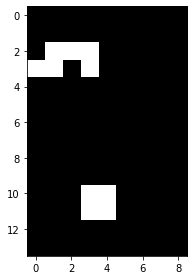

In [103]:
entities[0].display(inp)

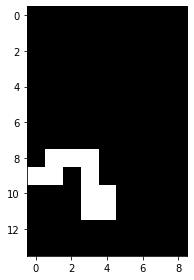

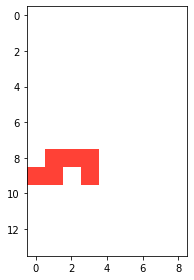

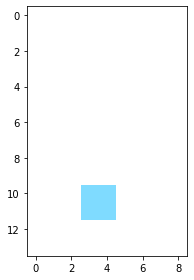

In [104]:
for entity in find_components(out):
    entity.display(out)

In [109]:
"""
(RESTRICT entities.color == 1 RANK size < 2) TRANSFORM move PARAM DIRECTION=(TOWARDS (RESTRICT entity2.color == entity1.color RANK size < 2).color), distance_associated_with_pair REPEAT 1
"""
from dataclasses import dataclass
from copy import deepcopy
import numpy as np
import heapq
from typing import Optional

# selector_functions = []

# def property_selector(entity: Entity, grid: np.array, entity_property: callable, target_property: callable):
#     return entity_property(entity, grid) == target_property(entity, grid)

@dataclass
class PropertyInput:
    """
    A dataclass to help with standardization and readability
    """
    entity: Optional[Entity]
    entities: Optional[list]
    grid: Optional[np.array]
        
class Property:
    count = 0
    
    def __init__(self, prop: callable, nll: float = 0, entity_finder: callable = EntityFinder(find_components), count=None):
        """
        
        :param prop: (entity, entities, grid) -> value
        :param nll: 
        :param entity_finder:
        :param count: 
        """
        self.prop = prop
        self.nll = nll
        self.entity_finder = entity_finder
        self.count = count if count is not None else self.__class__.count
        self.__class__.count += 1
    
    def __call__(self, entity, grid):
        return self.prop(PropertyInput(entity, self.entity_finder(grid), grid))
    
    def __lt__(self, other):
        if self.nll != other.nll:
            return self.nll < other.nll
        else:
            return self.count < other.count
        
    def __repr__(self):
        return f'Property({self.prop}, {self.nll}, {self.count}}})'
    
    def __eq__(self, other):
        return self.count == other.count
    
    def __str__(self):
        return f'(Property {self.count} with NLL = {self.nll})'
    
    def add_selector(self, selector):
        return self.__class__(prop=self.prop, 
                              nll=self.nll+selector.nll, 
                              entity_finder=EntityFinder.compose(self.entity_finder, selector))


class Selector:
    count=0
    
    def __init__(self, restriction: callable, nll=np.log(2), count=None):
        self.restriction = restriction
        self.nll = nll
        self.count = count if count is not None else self.__class__.count
        self.__class__.count += 1
        
    def __call__(self, entity, entities):
        return self.restriction(entity, entities)
        
    def select(self, entities: list):
        return [entity for entity in entities if self(entity, entities)] 

    def __str__(self):
        return f'(Selector, restriction = {self.restriction}, NLL={self.nll})'
    
    def __lt__(self, other):
        if self.nll != other.nll:
            return self.nll < other.nll
        else:
            return self.count < other.count
    
    @classmethod
    def make_property_selector(cls, entity_property, target_property):
        base_selector = lambda entity, entities: (entity_property(entity, entity.grid) == 
                                            target_property(entity, entity.grid))
        # print(base_selector)
        prop_selector = cls(base_selector, nll=entity_property.nll + target_property.nll)
        # print(prop_selector.restriction)
        # prop_selector.__repr__ = lambda : f'(Property Selector properties = {entity_property.count} and {target_property.count})' 
        return prop_selector

class Transformer:
    def __init__(self, base_transform: callable, nll=np.log(2), **kwargs):
        self.base_transform = base_transform
        self.nll = nll
        self.kwargs = kwargs

    def transform(self, entities: list, grid: np.array):
        entities = deepcopy(entities)
        grid = grid.copy()
        for entity in entities:
            self.base_transform(entity, grid, inplace=True, **self.kwargs)
        return entities, grid


In [110]:
"""
Entity properties:
    1) Directions
    2) Distances 
    3) Coordinates
    4) Colors
    5) Shape
    
Relation properties:
    1) Distances
    
Global properties:
    1) Grid Size
    2) Unique selections

syntax:
properties = (callable or int or float, nll)
            (entity, entities, grid) -> Bool

Selectors:
    SELECT all entities s.t. entity_property == grid_property or entity_property
    
Transforms:
    MOVE entities BY entity or grid property
    COPY entities BY entity or grid property
    RECOLOR entities BY sending each color1 (grid or entity property) to color2 (grid or entity property)
    DRAW_ENTITY for each entity DRAW from entity_property to grid or entity_property
"""
import itertools
import random

def move(inp):
    pass

def copy(inp):
    pass

def recolor(inp):
    pass

def draw(inp):
    pass

base_transforms = [(np.log(4), move), (np.log(4), copy), (np.log(4), recolor), (np.log(4), draw)]
    
def add_one(properties):
    for prop in properties:
        prop.nll += 1

def normalize(properties):
    tot = sum([nll for nll, property in properties])
    return [(nll - tot/len(property), property) for nll, property in properties]

def generate_base_properties():
    entity_properties = [Property(lambda x: x.entity.num_points()),
                         Property(lambda x: x.entity.colors()),
                         Property(lambda x: x.entity.center(axis=0), np.log(2)),
                         Property(lambda x: x.entity.center(axis=1), np.log(2)),
                         Property(lambda x: x.entity.min_coord(axis=0), np.log(4)), 
                         Property(lambda x: x.entity.min_coord(axis=1), np.log(4)),
                         Property(lambda x: x.entity.max_coord(axis=0), np.log(4)),
                         Property(lambda x: x.entity.max_coord(axis=1), np.log(4))
                         ]
    
    grid_properties  = [Property(lambda x: len(x.entities)),
                        Property(lambda x: x.grid.shape[0], np.log(2)),
                        Property(lambda x: x.grid.shape[1], np.log(2))
                        ]
    
    grid_properties.extend([Property(lambda x: i, np.log(i)) for i in range(1, 3)])
    add_one(grid_properties), add_one(entity_properties)
    return grid_properties, entity_properties



# def generate_entity_properties(entity):
#     return {entity.num_points(), entity.colors, entity.center(axis=0), }

# def generate_all_properties(grid, entity_finder, max_nll=20):
#     entities = entity_finder(grid)
#     grid_properties, entity_properties = generate_base_properties()
#     queue = grid_properties + entity_properties
#     heapq.heapify(queue)
#     prop = heapq.heappop(queue)
#     yield prop
#     temp_selector = Selector(lambda x: prop(x, entities, grid), prop.nll)
#         for entity in entities:
#             common_properties = common_properties & {(entity_property, entity_property(PropertyInput(entity, entities, grid))) 
#                                   for entity_property in entity_properties}
#     return queue                                   

In [113]:
def filter_unlikelies(properties, max_nll):
    return [prop for prop in properties if prop.nll<=max_nll]

class Predictor:
    def __init__(self, entity_finder: EntityFinder, transformer: Transformer):
        self.entity_finder = entity_finder
        self.transformer = transformer
        self.nll = entity_finder.nll + transformer.nll
        
    def predict(self, grid):
        selected_entities = self.entity_finder(grid)
        out = grid.copy()
        selected_entities, out = self.transformer.transform(selected_entities, out)
        return out
    
    @classmethod
    def selector_iterator(cls, grid, entity_finder, max_nll=20.):
        entities = entity_finder(grid)
        grid_properties, entity_properties = generate_base_properties()
        filter_unlikelies(grid_properties, max_nll), filter_unlikelies(entity_properties, max_nll)
        all_properties = grid_properties + entity_properties
        # print(grid_properties, entity_properties)
        queue = [Selector.make_property_selector(entity_property, target_property) 
                 for entity_property in entity_properties
                 for target_property in all_properties 
                 if (entity_property.count != target_property.count) 
                 and (entity_property.nll + target_property.nll <= max_nll)]
        heapq.heapify(queue)
        print(len(queue))
        while queue:
            my_selector = heapq.heappop(queue)
            selected_entities = my_selector.select(entities)
            if not selected_entities:
                continue
            yield my_selector
            common_properties = {(i, prop(selected_entities[0], grid)) for i, prop in enumerate(entity_properties)}
            for entity in selected_entities:
                common_properties &= {(prop.count, prop(entity, grid)) for prop in entity_properties}
            # print(common_properties)
             

In [116]:
cache = {5: 'pie', 3: 'moo'}
'pie' in cache

False

In [3]:
int(not 0), not 1

(True, False)

In [2]:
count = 5
count += 1

In [3]:
set.intersection({1, 2}, {1,3}, {3})

set()

In [2]:
frozenset({1,2}) == {1,2}

True

True